In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import weibull_min
from scipy.stats import shapiro

# All Causes

In [4]:
df = pd.read_excel("data/all causes.xlsx")
df = df[(df['Year'] > 1959) & (df['Year'] < 2020)]
df = df.sort_values(by="Year", ascending=True)
unique_years = df['Year'].unique()
print(f'number of years is {len(unique_years)}')

number of years is 60


In [5]:
df.head(10)

,Region Code,Region Name,Country Code,Country Name,Year,Sex,Age group code,Age group,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population
27,EU,Europe,CHE,Switzerland,1960,All,Age_all,[All],52094.0,100.0,867.761832,977.758592
28,EU,Europe,CHE,Switzerland,1960,Male,Age_all,[All],27032.0,100.0,1041.313250,1047.264838
29,EU,Europe,CHE,Switzerland,1960,Female,Age_all,[All],25062.0,100.0,728.028206,912.440383
30,EU,Europe,CHE,Switzerland,1961,All,Age_all,[All],51004.0,100.0,826.391201,938.539673
31,EU,Europe,CHE,Switzerland,1961,Male,Age_all,[All],26923.0,100.0,1008.705185,1021.784508
32,EU,Europe,CHE,Switzerland,1961,Female,Age_all,[All],24081.0,100.0,681.150226,860.189320
33,EU,Europe,CHE,Switzerland,1962,All,Age_all,[All],55125.0,100.0,873.451319,989.002117
34,EU,Europe,CHE,Switzerland,1962,Male,Age_all,[All],28811.0,100.0,1061.199115,1064.590031
35,EU,Europe,CHE,Switzerland,1962,Female,Age_all,[All],26314.0,100.0,724.248930,917.663470
38,EU,Europe,CHE,Switzerland,1963,Female,Age_all,[All],26964.0,100.0,723.879464,921.625594


In [6]:
#to see if there are any missing values and see what data types we have
print(df.info())
#no NAs we good

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 27 to 196
Data columns (total 12 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Region Code                                                  180 non-null    object 
 1   Region Name                                                  180 non-null    object 
 2   Country Code                                                 180 non-null    object 
 3   Country Name                                                 180 non-null    object 
 4   Year                                                         180 non-null    int64  
 5   Sex                                                          180 non-null    object 
 6   Age group code                                               180 non-null    object 
 7   Age group                                                    180 non-null    ob

In [7]:
#to get rid of uneccessary stuff
columns_to_remove = ['Region Code', 'Region Name','Country Code','Age group code','Age group', ]
df = df.drop(columns=columns_to_remove)

In [8]:
columns_to_remove1 = ['Year','Percentage of cause-specific deaths out of total deaths']
dfstat = df.drop(columns=columns_to_remove1)
grouped_stats = dfstat.groupby('Sex').describe()
grouped_stats.to_excel('grouped_stats.xlsx', sheet_name='Statistics')

Distributional analysis and tests to see if there are significant differences between of numeric variables for genders.

This function tests the normality of a numeric variable, plots a histogram if it's non-normal, and performs statistical tests to compare the variable between different groups. If the variable is normally distributed, it conducts a t-test between groups, and if it's not normally distributed, it performs a Mann-Whitney U-test on the original or log-transformed data, as appropriate. Wilcoxon-Mann-Whitney Criterion is used when variable is not distributed normally and the t test is not suitable.

In [9]:
def test_distribution_and_compare_sexes(data, value_column, group_column, alpha=0.05):

    # Extract the specific column for testing
    data_to_test = data[value_column]
    
    # Perform the Shapiro-Wilk test on the original data
    stat, p = stats.shapiro(data_to_test)
    
    print(f'Shapiro-Wilk test p-value for {value_column}: {p}')

    if p > alpha:
        print(f'{value_column} is normally distributed.')
        
        # Perform a t-test for the difference between sexes
        group_male = data[data[group_column] == 'Male'][value_column]
        group_female = data[data[group_column] == 'Female'][value_column]
        
        t_stat, t_p_value = stats.ttest_ind(group_male, group_female)
        print("T-test for Men and Women:")
        print("T-statistic:", t_stat)
        print("p-value:", t_p_value)
        
        if t_p_value < alpha:
            print("Conclusion: There is a significant difference between Men and Women.")
        else:
            print("Conclusion: There is no significant difference between Men and Women.")
            
    else:
        # Transform the data using the natural logarithm
        log_data = np.log(data_to_test)
        
        # Perform the Shapiro-Wilk test on the log-transformed data
        log_stat, log_p = stats.shapiro(log_data)
        print(f'Shapiro-Wilk test p-value for log-transformed {value_column}: {log_p}')

        if log_p > alpha:
            print(f'Log-transformed {value_column} is approximately normally distributed.')
            
            # Plot a histogram of the initial variable when distribution is log-normal
            plt.figure(dpi = 480)
            plt.hist(data_to_test, bins=20, color='blue', alpha=0.7)
            plt.title(f'Histogram of {value_column}')
            plt.xlabel('Value')
            plt.ylabel('Frequency')
            plt.show()
            
            # Perform a t-test for the difference between sexes on the log-transformed data
            group_male_log = log_data[data[group_column] == 'Male']
            group_female_log = log_data[data[group_column] == 'Female']
        
            t_stat_log, t_p_value_log = stats.ttest_ind(group_male_log, group_female_log)
            print("T-test for Men and Women on log-transformed data:")
            print("T-statistic:", t_stat_log)
            print("p-value:", t_p_value_log)
        
            if t_p_value_log < alpha:
                print("Conclusion: There is a significant difference between Men and Women on log-transformed data.")
            else:
                print("Conclusion: There is no significant difference between Men and Women on log-transformed data.")
        else:
            print(f'Log-transformed {value_column} is also not normally distributed.')
            
            # Plot a histogram of the initial variable when non-normal
            plt.figure(dpi = 480)
            plt.hist(data_to_test, bins=20, color='blue', alpha=0.7)
            plt.title(f'Histogram of {value_column}')
            plt.xlabel('Value')
            plt.ylabel('Frequency')
            plt.show()
            
            # Perform a Mann-Whitney U-test for the difference between sexes on the initial data
            group_male = data[data[group_column] == 'Male'][value_column]
            group_female = data[data[group_column] == 'Female'][value_column]
        
            mw_stat, mw_p_value = stats.mannwhitneyu(group_male, group_female, alternative='two-sided')
        
            print(f"Mann-Whitney U-test for Men and Women on {value_column}:")
            print("Statistic:", mw_stat)
            print("p-value:", mw_p_value)
        
            if mw_p_value < alpha:
                print("Conclusion: There is a significant difference between Men and Women.")
            else:
                print("Conclusion: There is no significant difference between Men and Women.")


Shapiro-Wilk test p-value for Number: 3.428483115135416e-16
Shapiro-Wilk test p-value for log-transformed Number: 3.500656727928146e-15
Log-transformed Number is also not normally distributed.


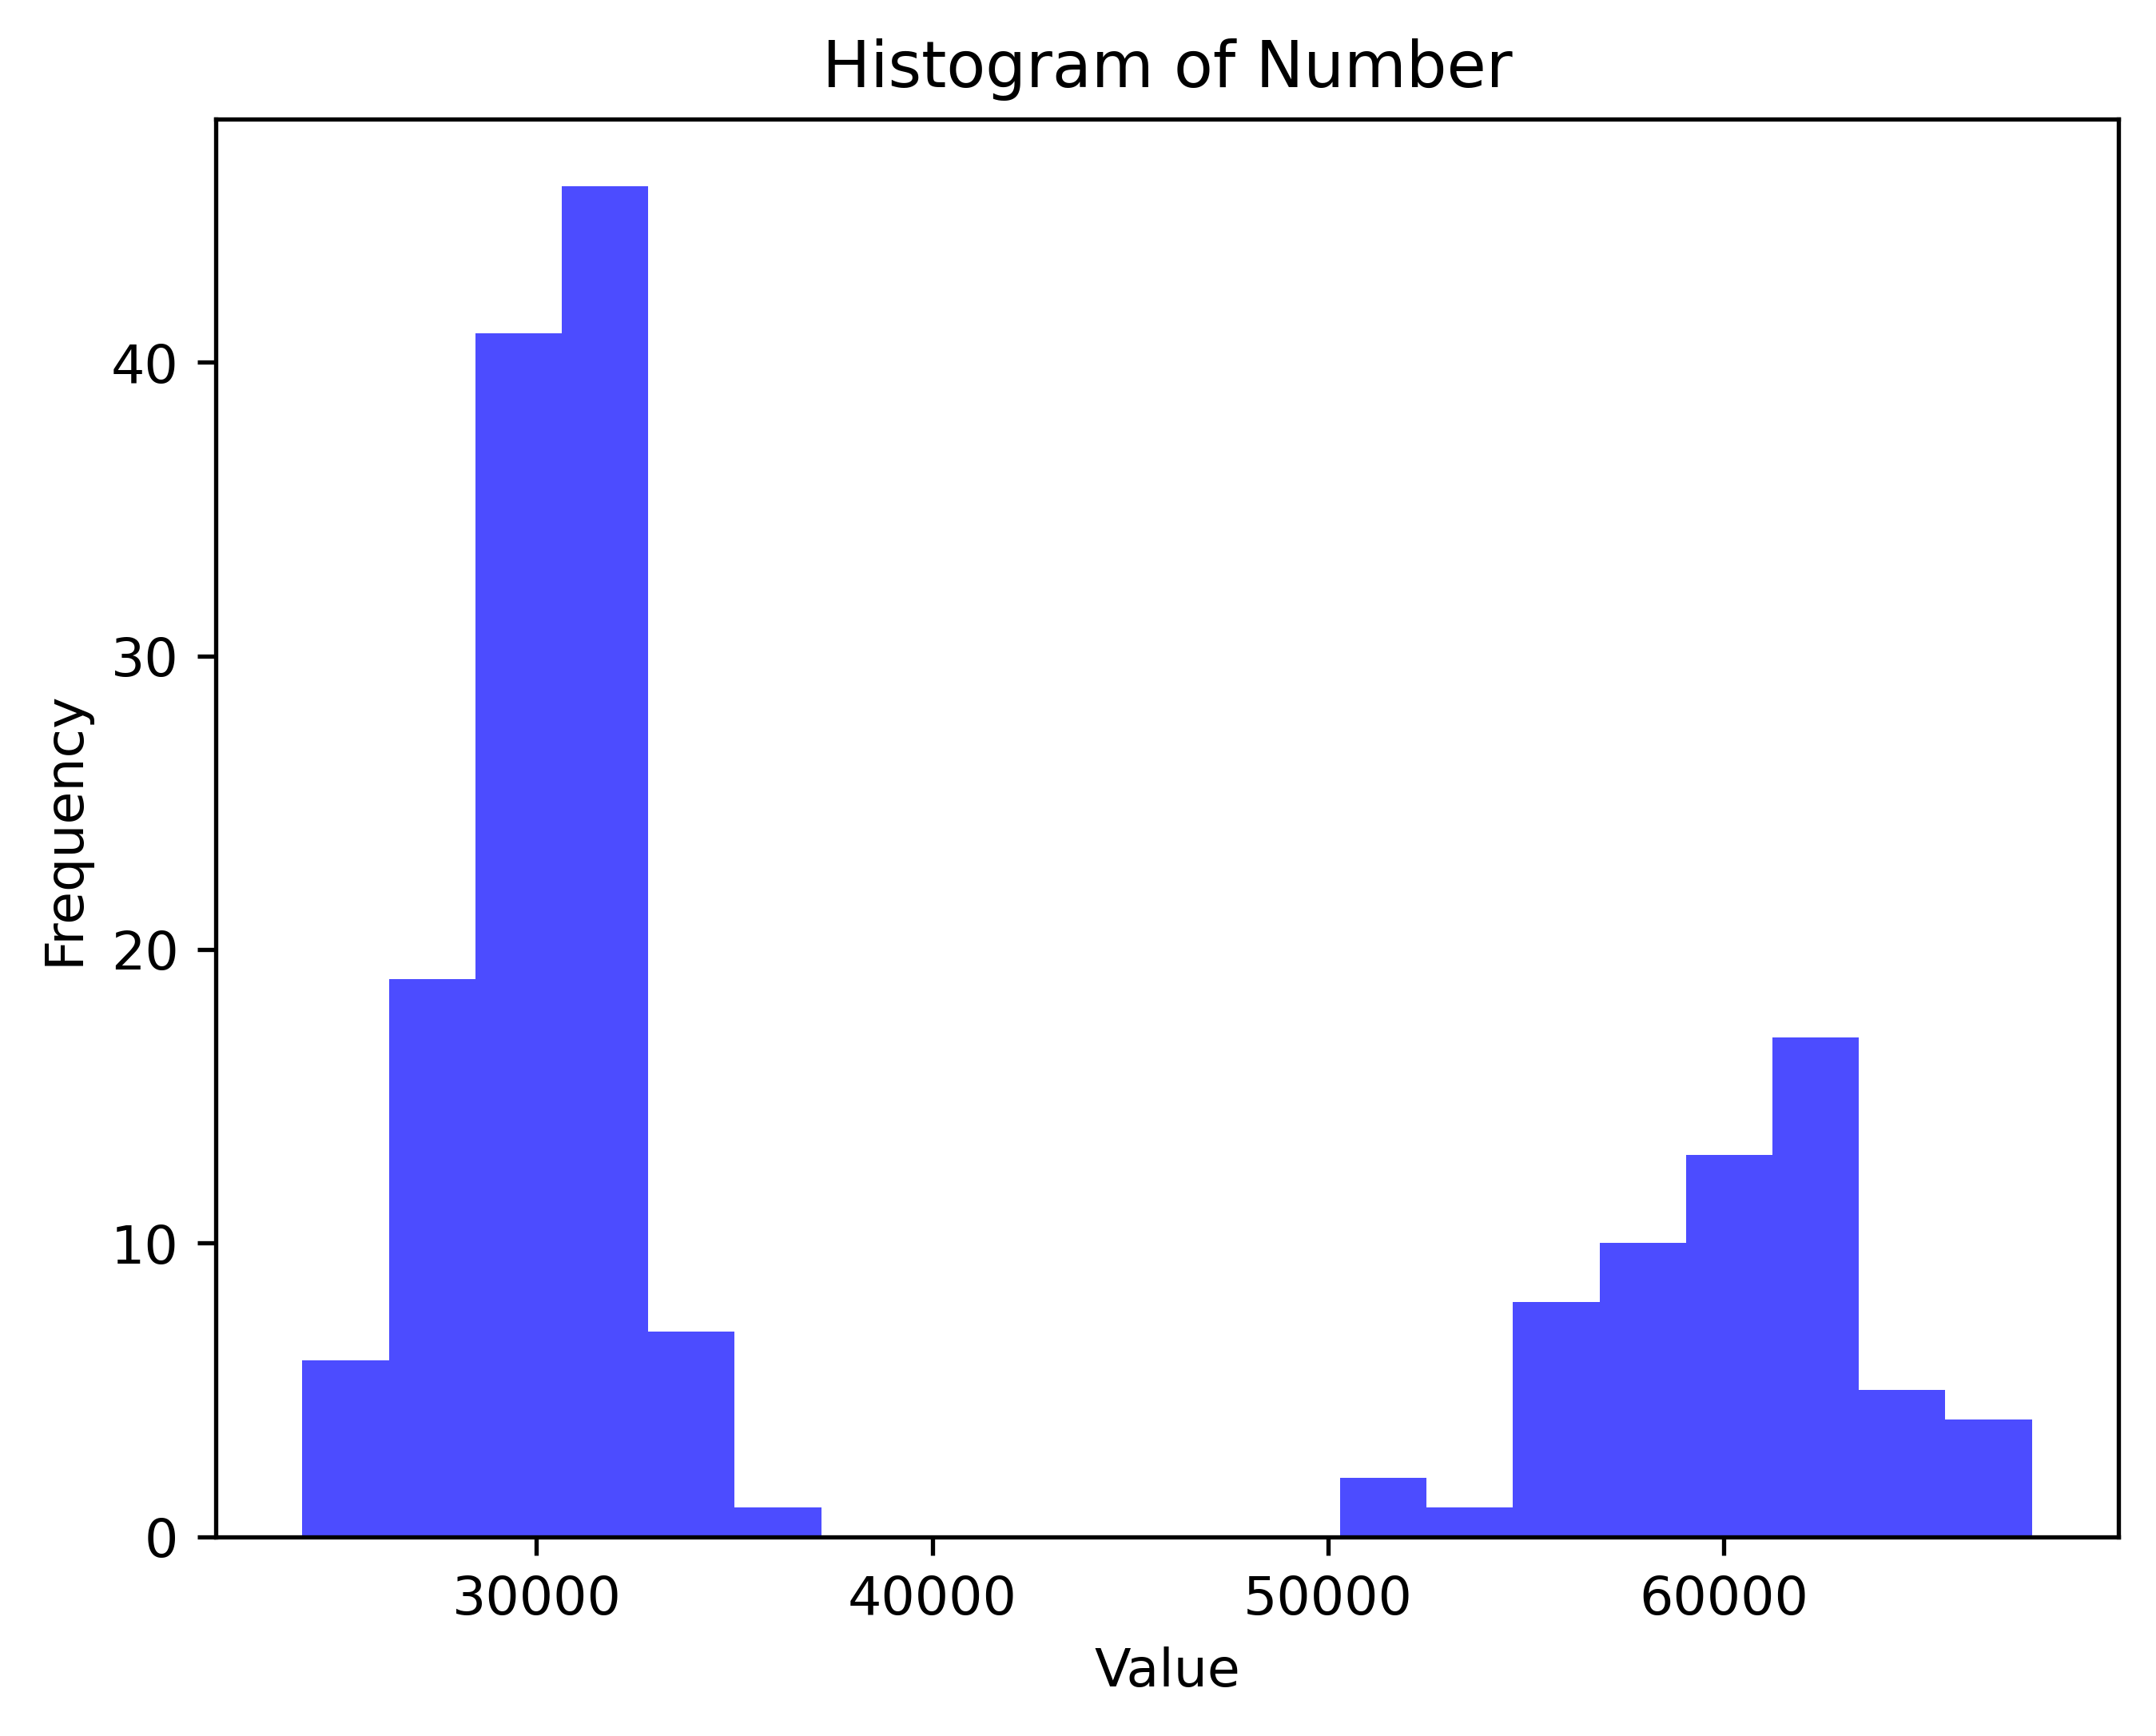

Mann-Whitney U-test for Men and Women on Number:
Statistic: 1962.0
p-value: 0.3966292209512383
Conclusion: There is no significant difference between Men and Women.


In [10]:
# from utils import test_distribution_and_compare_sexes
test_distribution_and_compare_sexes(df, 'Number', 'Sex', alpha=0.05)

Visually we can say that it is bimodal distribution (non normal)

Shapiro-Wilk test p-value for Age-standardized death rate per 100 000 standard population: 4.559634817269398e-06
Shapiro-Wilk test p-value for log-transformed Age-standardized death rate per 100 000 standard population: 0.0012488984502851963
Log-transformed Age-standardized death rate per 100 000 standard population is also not normally distributed.


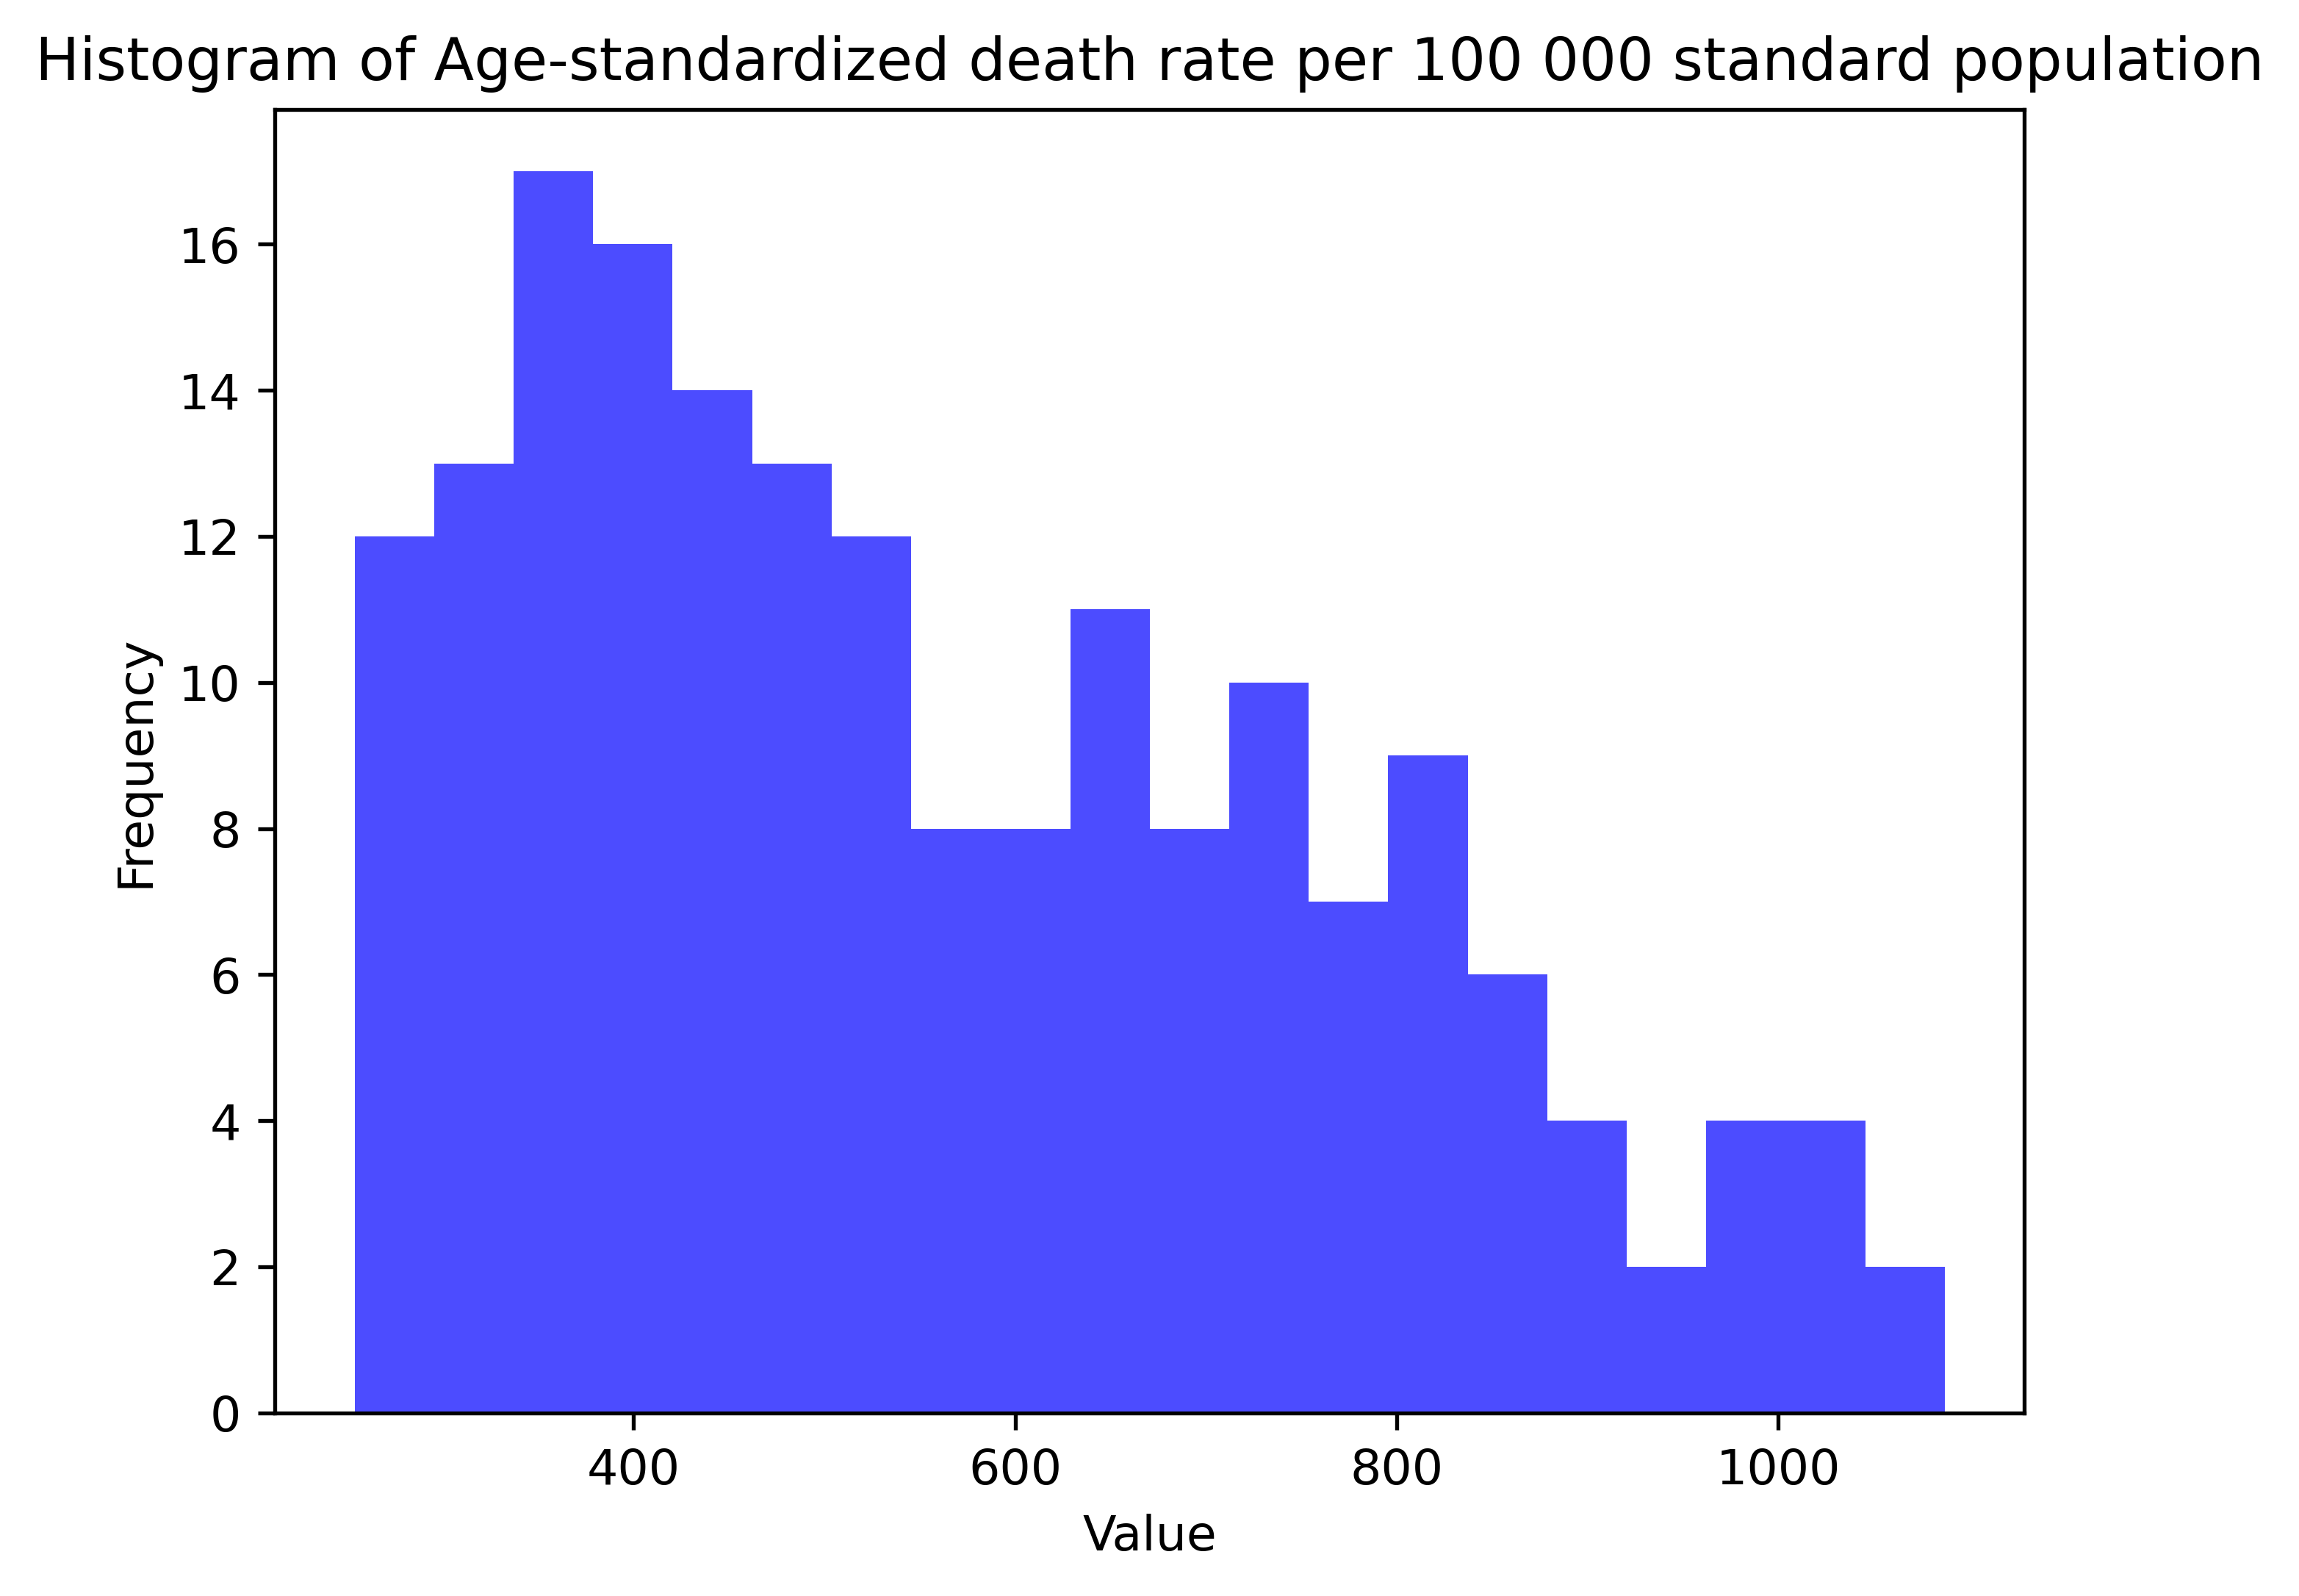

Mann-Whitney U-test for Men and Women on Age-standardized death rate per 100 000 standard population:
Statistic: 3049.0
p-value: 5.6420647458921067e-11
Conclusion: There is a significant difference between Men and Women.


In [11]:
test_distribution_and_compare_sexes(df, 'Age-standardized death rate per 100 000 standard population', 'Sex', alpha=0.05) 

Assumingly it can be Weibullian dist

In [12]:
c, loc, scale = weibull_min.fit(df['Age-standardized death rate per 100 000 standard population'])
# Conducting the Kolmogorov-Smirnov test
stats.kstest(df['Age-standardized death rate per 100 000 standard population'], 'weibull_min', args=(c, loc, scale))

KstestResult(statistic=0.058797630951757385, pvalue=0.5426281401981145, statistic_location=603.23421658, statistic_sign=-1)

The value is much greater than 0.05, which means that the null hypothesis that the distribution is Weibullian cannot be rejected. See later how it can be used maybe.

Shapiro-Wilk test p-value for Death rate per 100 000 population: 0.0014765597879886627
Shapiro-Wilk test p-value for log-transformed Death rate per 100 000 population: 0.007202851120382547
Log-transformed Death rate per 100 000 population is also not normally distributed.


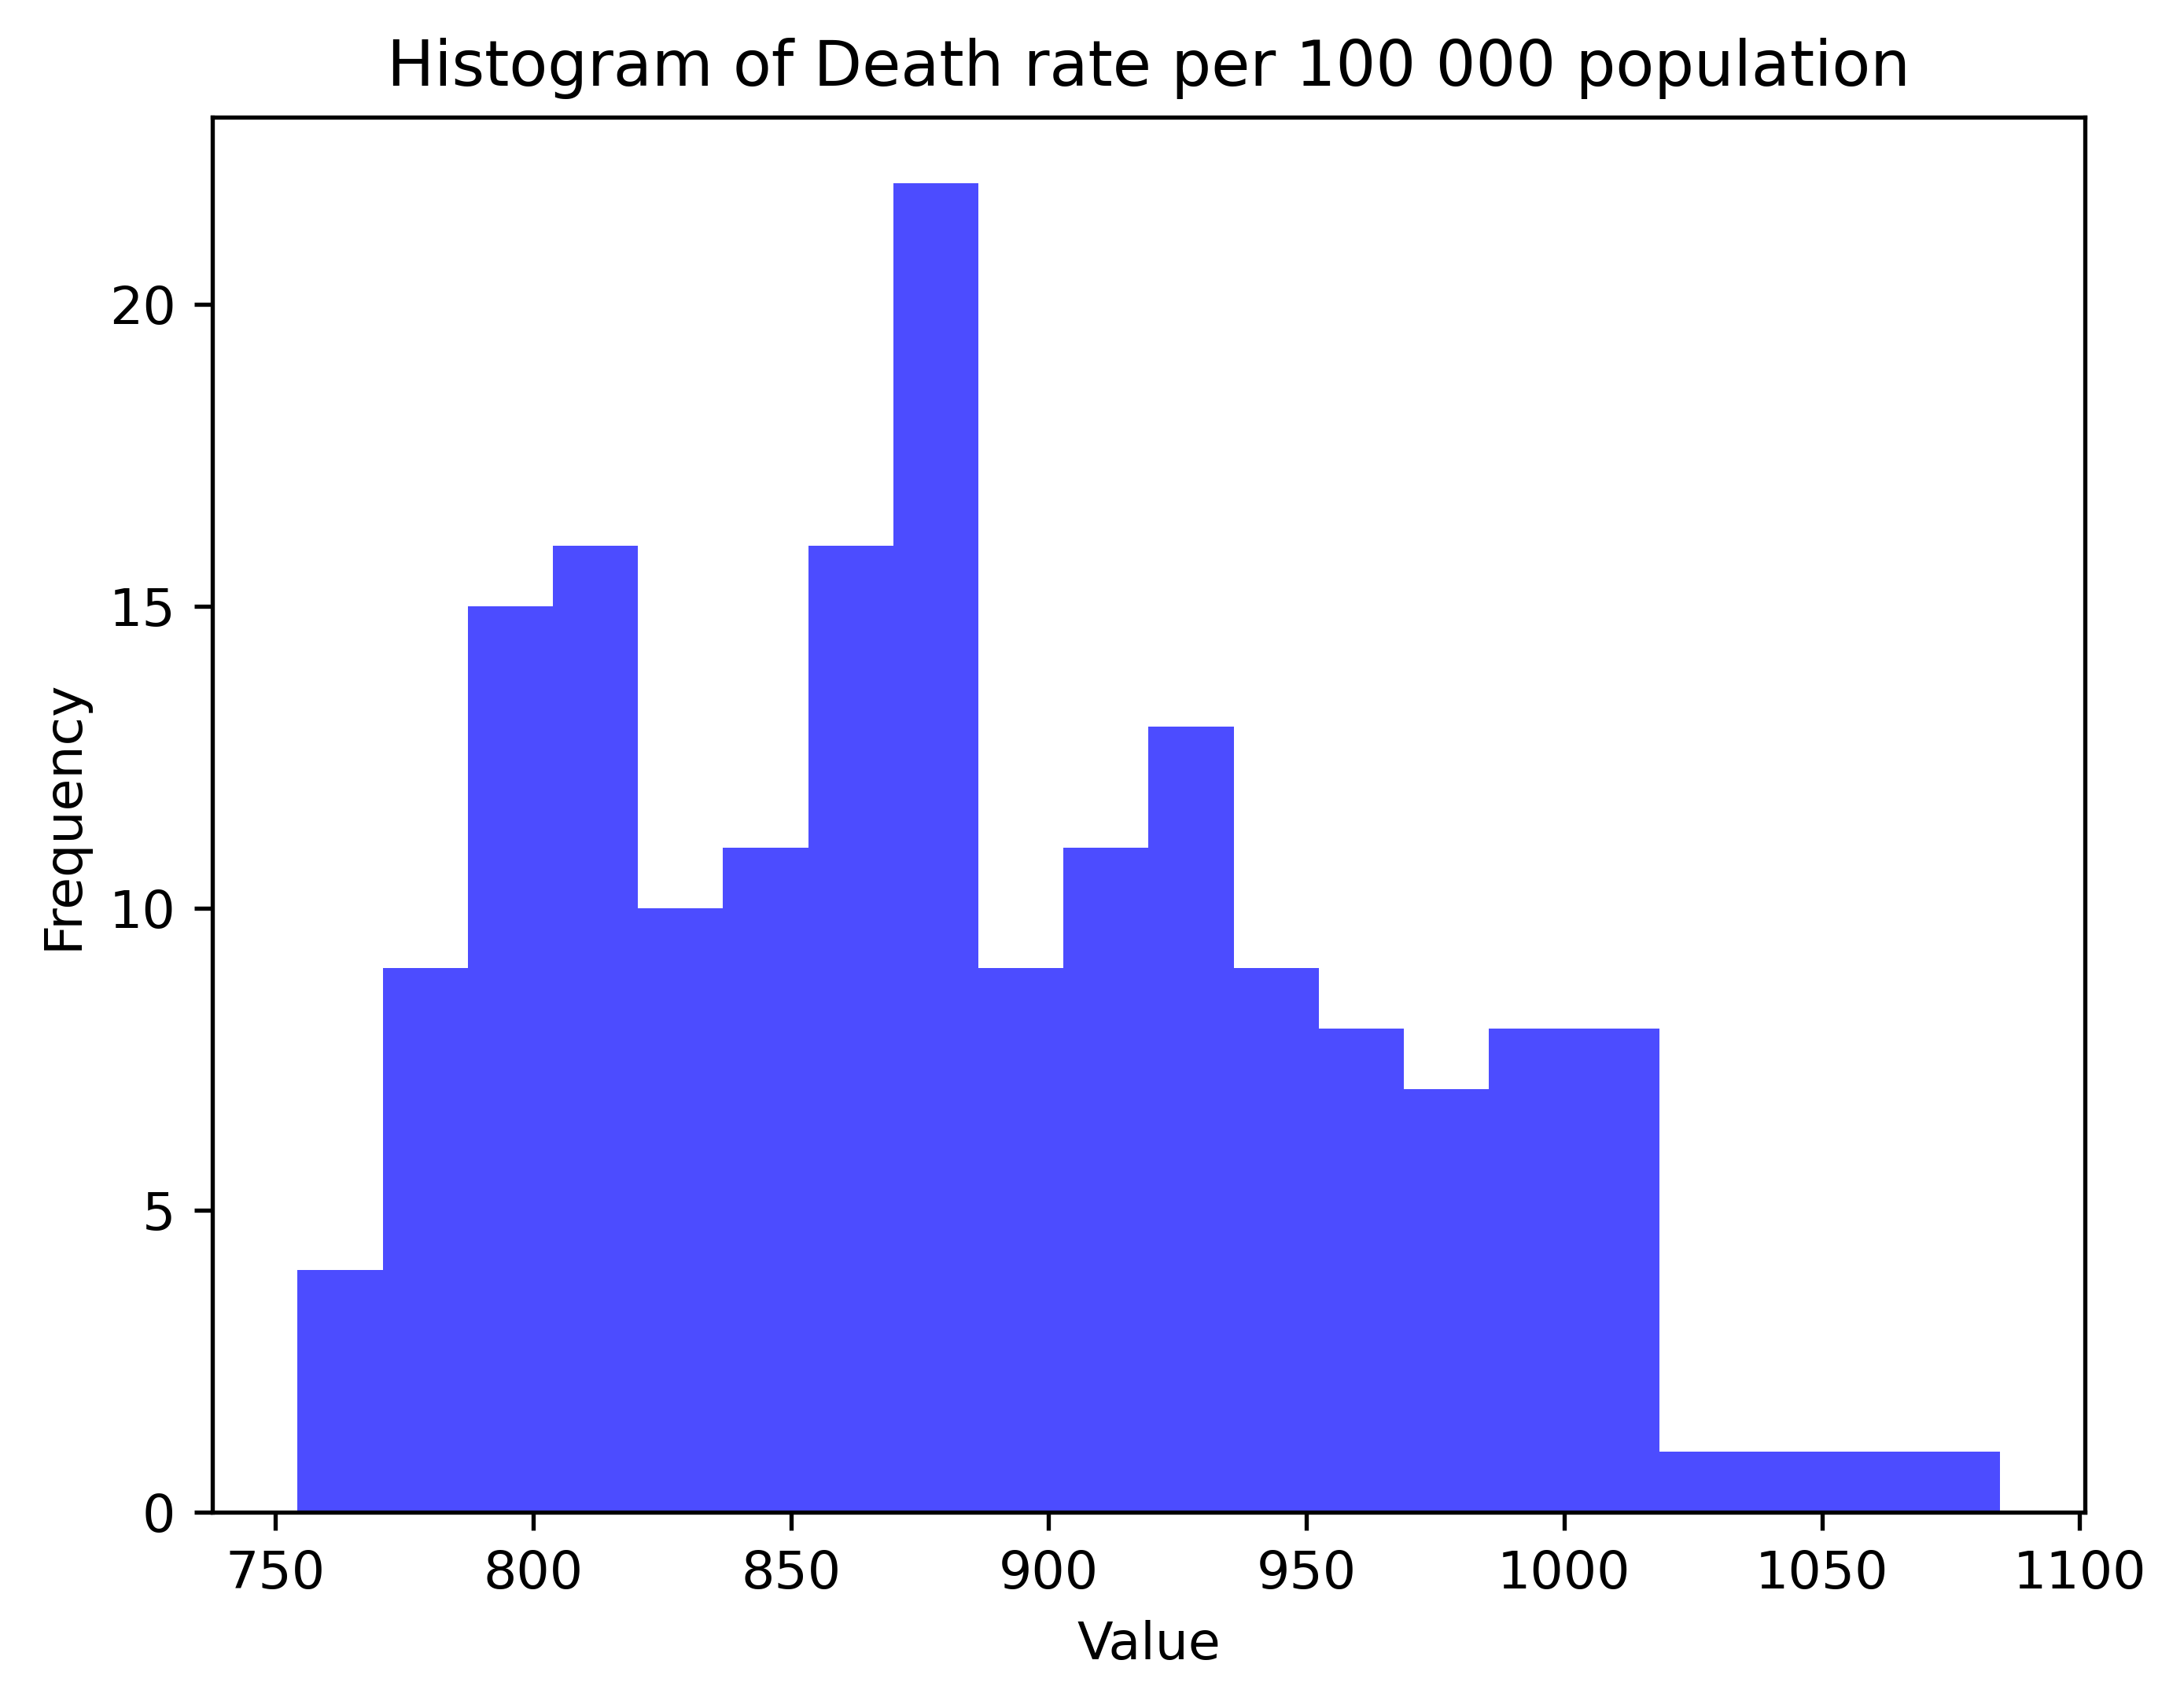

Mann-Whitney U-test for Men and Women on Death rate per 100 000 population:
Statistic: 2475.0
p-value: 0.00039981349215198757
Conclusion: There is a significant difference between Men and Women.


In [13]:
test_distribution_and_compare_sexes(df, 'Death rate per 100 000 population', 'Sex', alpha=0.05) 

Unclear distribution, neither by tests, nor by pictures. Most of all it looks like the lognormal.

# Communicable, maternal, perinatal and nutritional

In [14]:
df1 = pd.read_excel('data/Communicable, maternal, perinatal and nutritional.xlsx')
df1 = df1[(df1['Year'] > 1959) & (df1['Year'] < 2020)]
df1 = df1.sort_values(by="Year", ascending=True)
df1.head(10)

,Region Code,Region Name,Country Code,Country Name,Year,Sex,Age group code,Age group,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population
27,EU,Europe,CHE,Switzerland,1960,All,Age_all,[All],5403.0,10.371636,96.064637,101.409561
28,EU,Europe,CHE,Switzerland,1960,Male,Age_all,[All],2885.0,10.672536,113.677761,111.769720
29,EU,Europe,CHE,Switzerland,1960,Female,Age_all,[All],2518.0,10.047083,81.160217,91.673645
30,EU,Europe,CHE,Switzerland,1961,All,Age_all,[All],4057.0,7.954278,71.069828,74.654056
31,EU,Europe,CHE,Switzerland,1961,Male,Age_all,[All],2197.0,8.160309,83.599150,83.380773
32,EU,Europe,CHE,Switzerland,1961,Female,Age_all,[All],1860.0,7.723932,60.608205,66.440436
33,EU,Europe,CHE,Switzerland,1962,All,Age_all,[All],4938.0,8.957823,83.824070,88.593060
34,EU,Europe,CHE,Switzerland,1962,Male,Age_all,[All],2662.0,9.239527,99.813857,98.363079
35,EU,Europe,CHE,Switzerland,1962,Female,Age_all,[All],2276.0,8.649388,70.581191,79.372276
38,EU,Europe,CHE,Switzerland,1963,Female,Age_all,[All],2590.0,9.605400,76.392719,88.525823


In [15]:
#to see if there are any missing values and see what data types we have
print(df1.info())
#no NAs we good

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 27 to 196
Data columns (total 12 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Region Code                                                  180 non-null    object 
 1   Region Name                                                  180 non-null    object 
 2   Country Code                                                 180 non-null    object 
 3   Country Name                                                 180 non-null    object 
 4   Year                                                         180 non-null    int64  
 5   Sex                                                          180 non-null    object 
 6   Age group code                                               180 non-null    object 
 7   Age group                                                    180 non-null    ob

In [16]:
#to get rid of uneccessary stuff
columns_to_remove = ['Region Code', 'Region Name','Country Code','Age group code','Age group', ]
df1 = df1.drop(columns=columns_to_remove)
columns_to_remove1 = ['Year']
df1stat = df1.drop(columns=columns_to_remove1)
grouped_stats1 = df1stat.groupby('Sex').describe()
grouped_stats1.to_excel('grouped_stats comm.xlsx', sheet_name='Statistics')

Distributional analysis and tests to see if there are significant differences between of numeric variables for genders.

Shapiro-Wilk test p-value for Number: 1.8295187587114015e-10
Shapiro-Wilk test p-value for log-transformed Number: 0.0005049937171861529
Log-transformed Number is also not normally distributed.


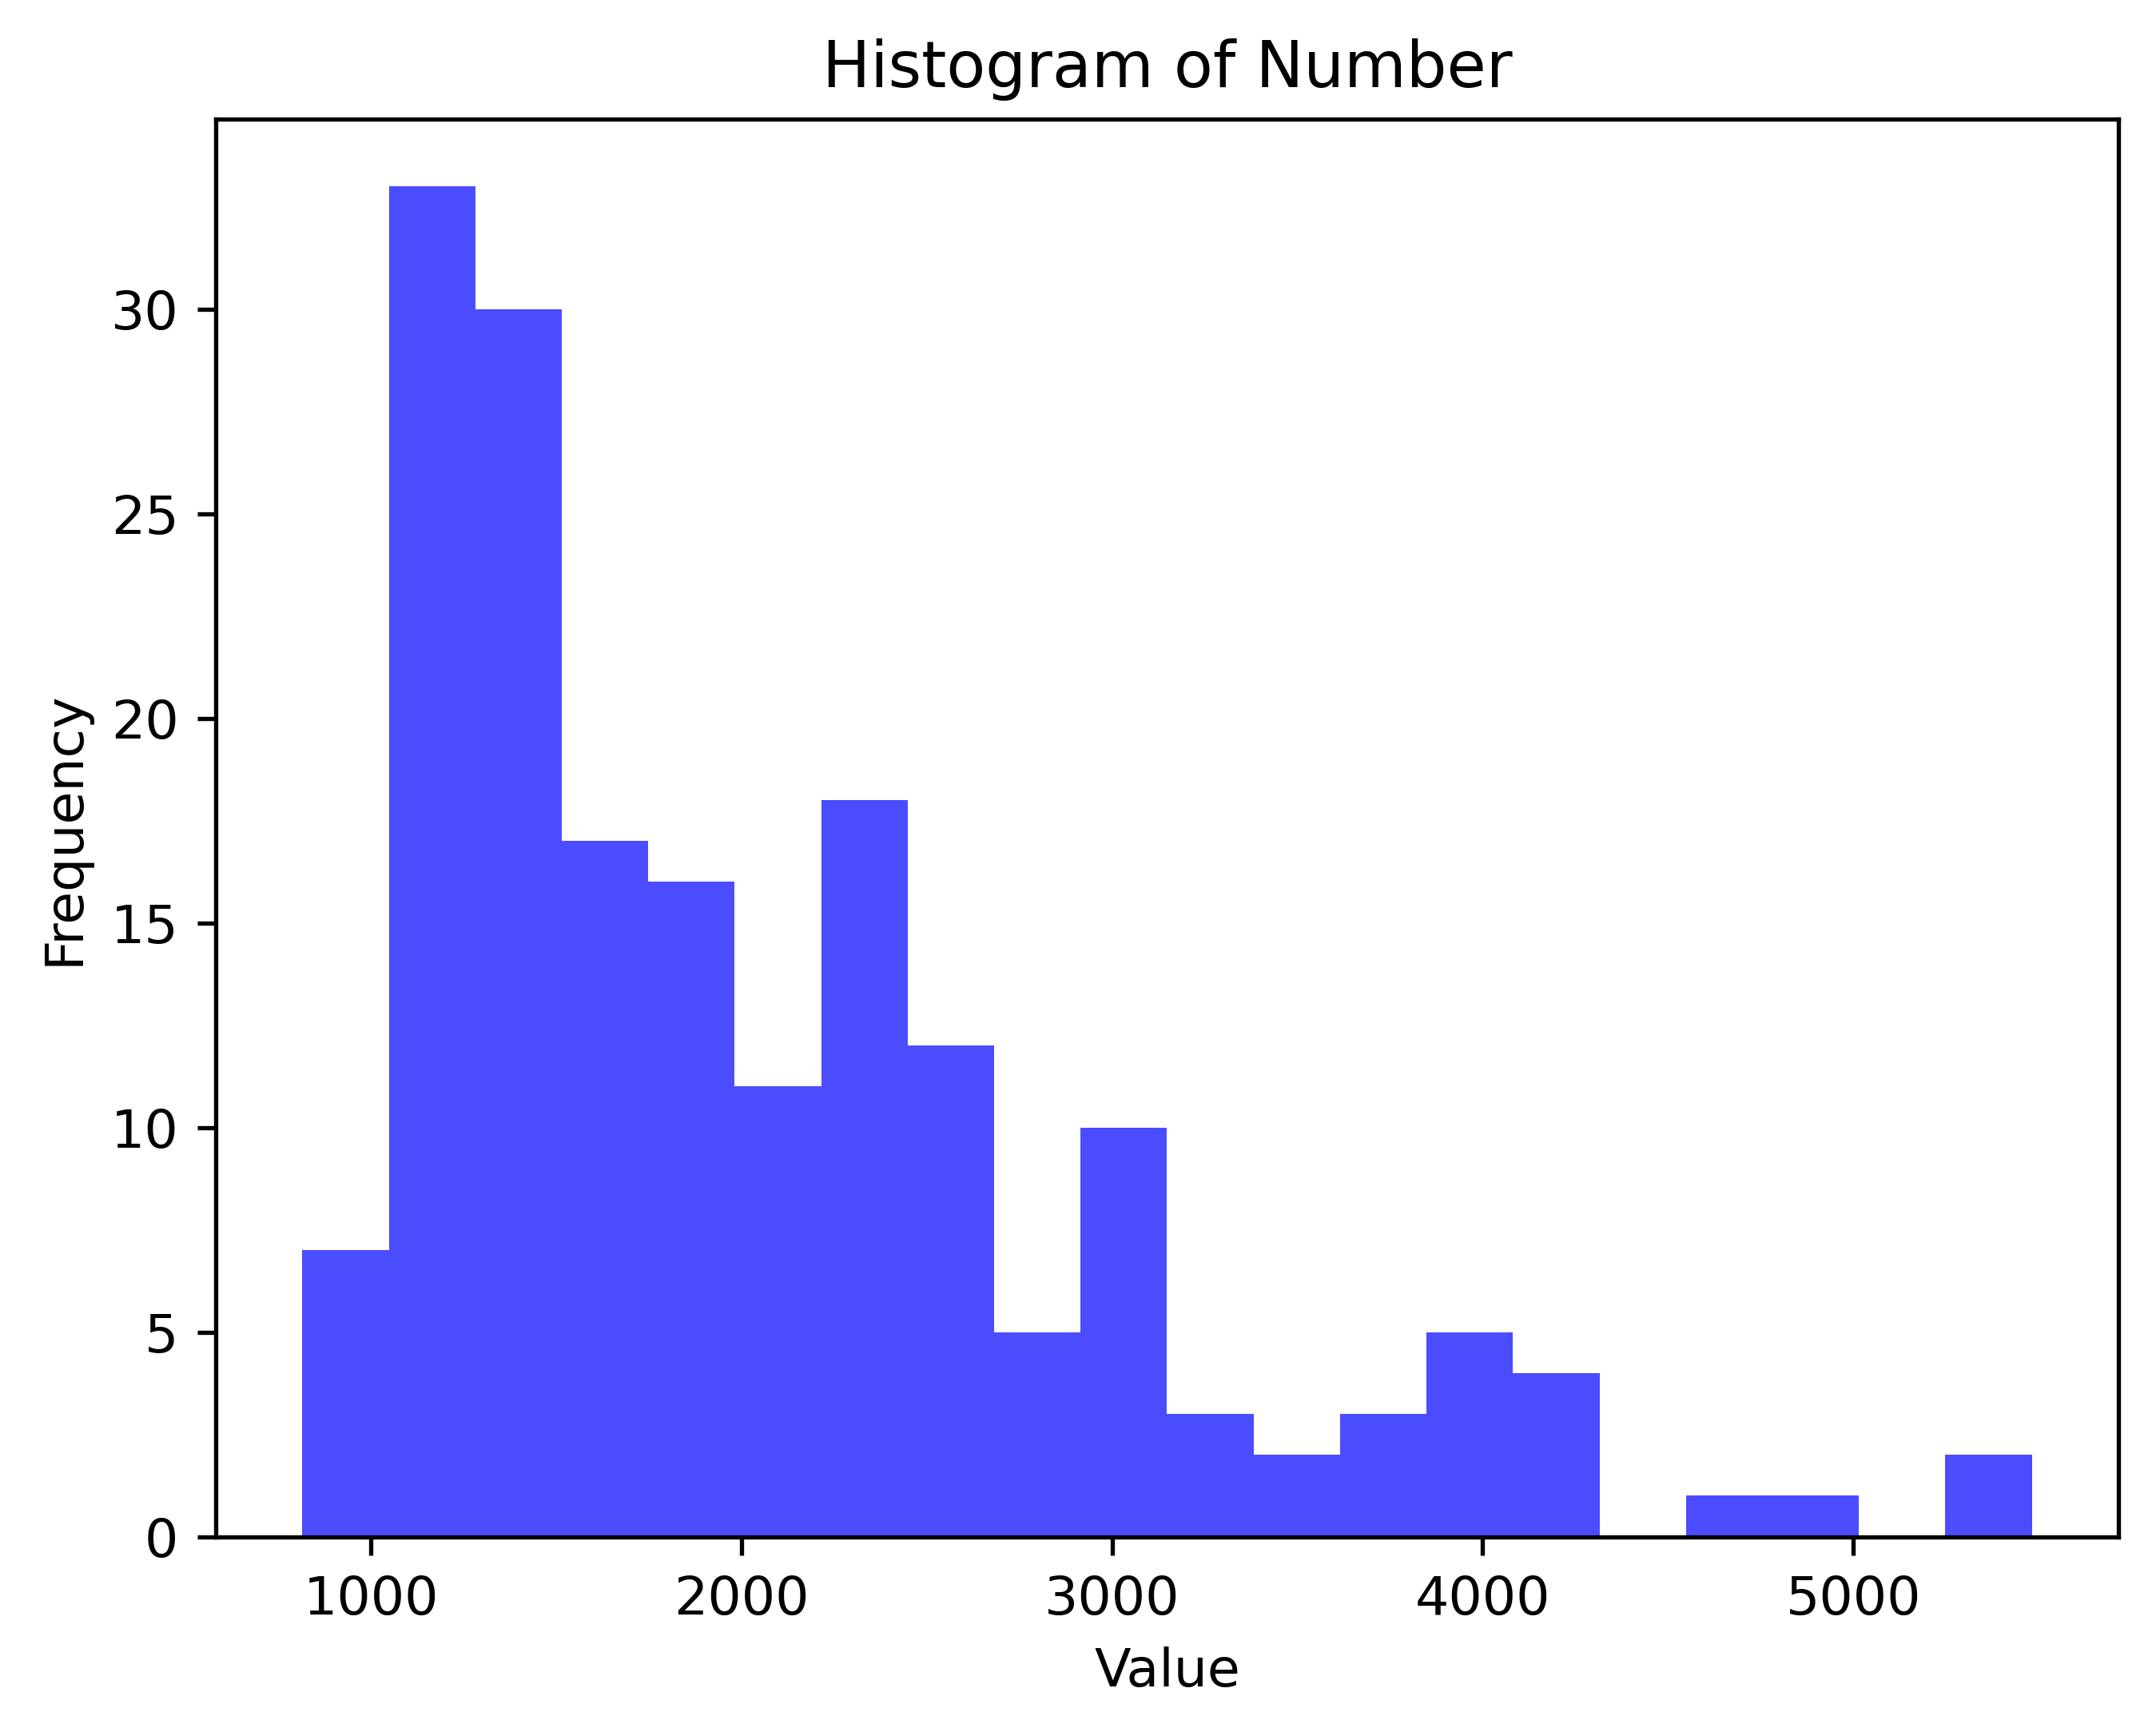

Mann-Whitney U-test for Men and Women on Number:
Statistic: 1503.5
p-value: 0.12027669141818766
Conclusion: There is no significant difference between Men and Women.


In [17]:
test_distribution_and_compare_sexes(df1, 'Number', 'Sex', alpha=0.05)

Shapiro-Wilk test p-value for Percentage of cause-specific deaths out of total deaths: 1.9656407057588865e-10
Shapiro-Wilk test p-value for log-transformed Percentage of cause-specific deaths out of total deaths: 7.1491390372102614e-06
Log-transformed Percentage of cause-specific deaths out of total deaths is also not normally distributed.


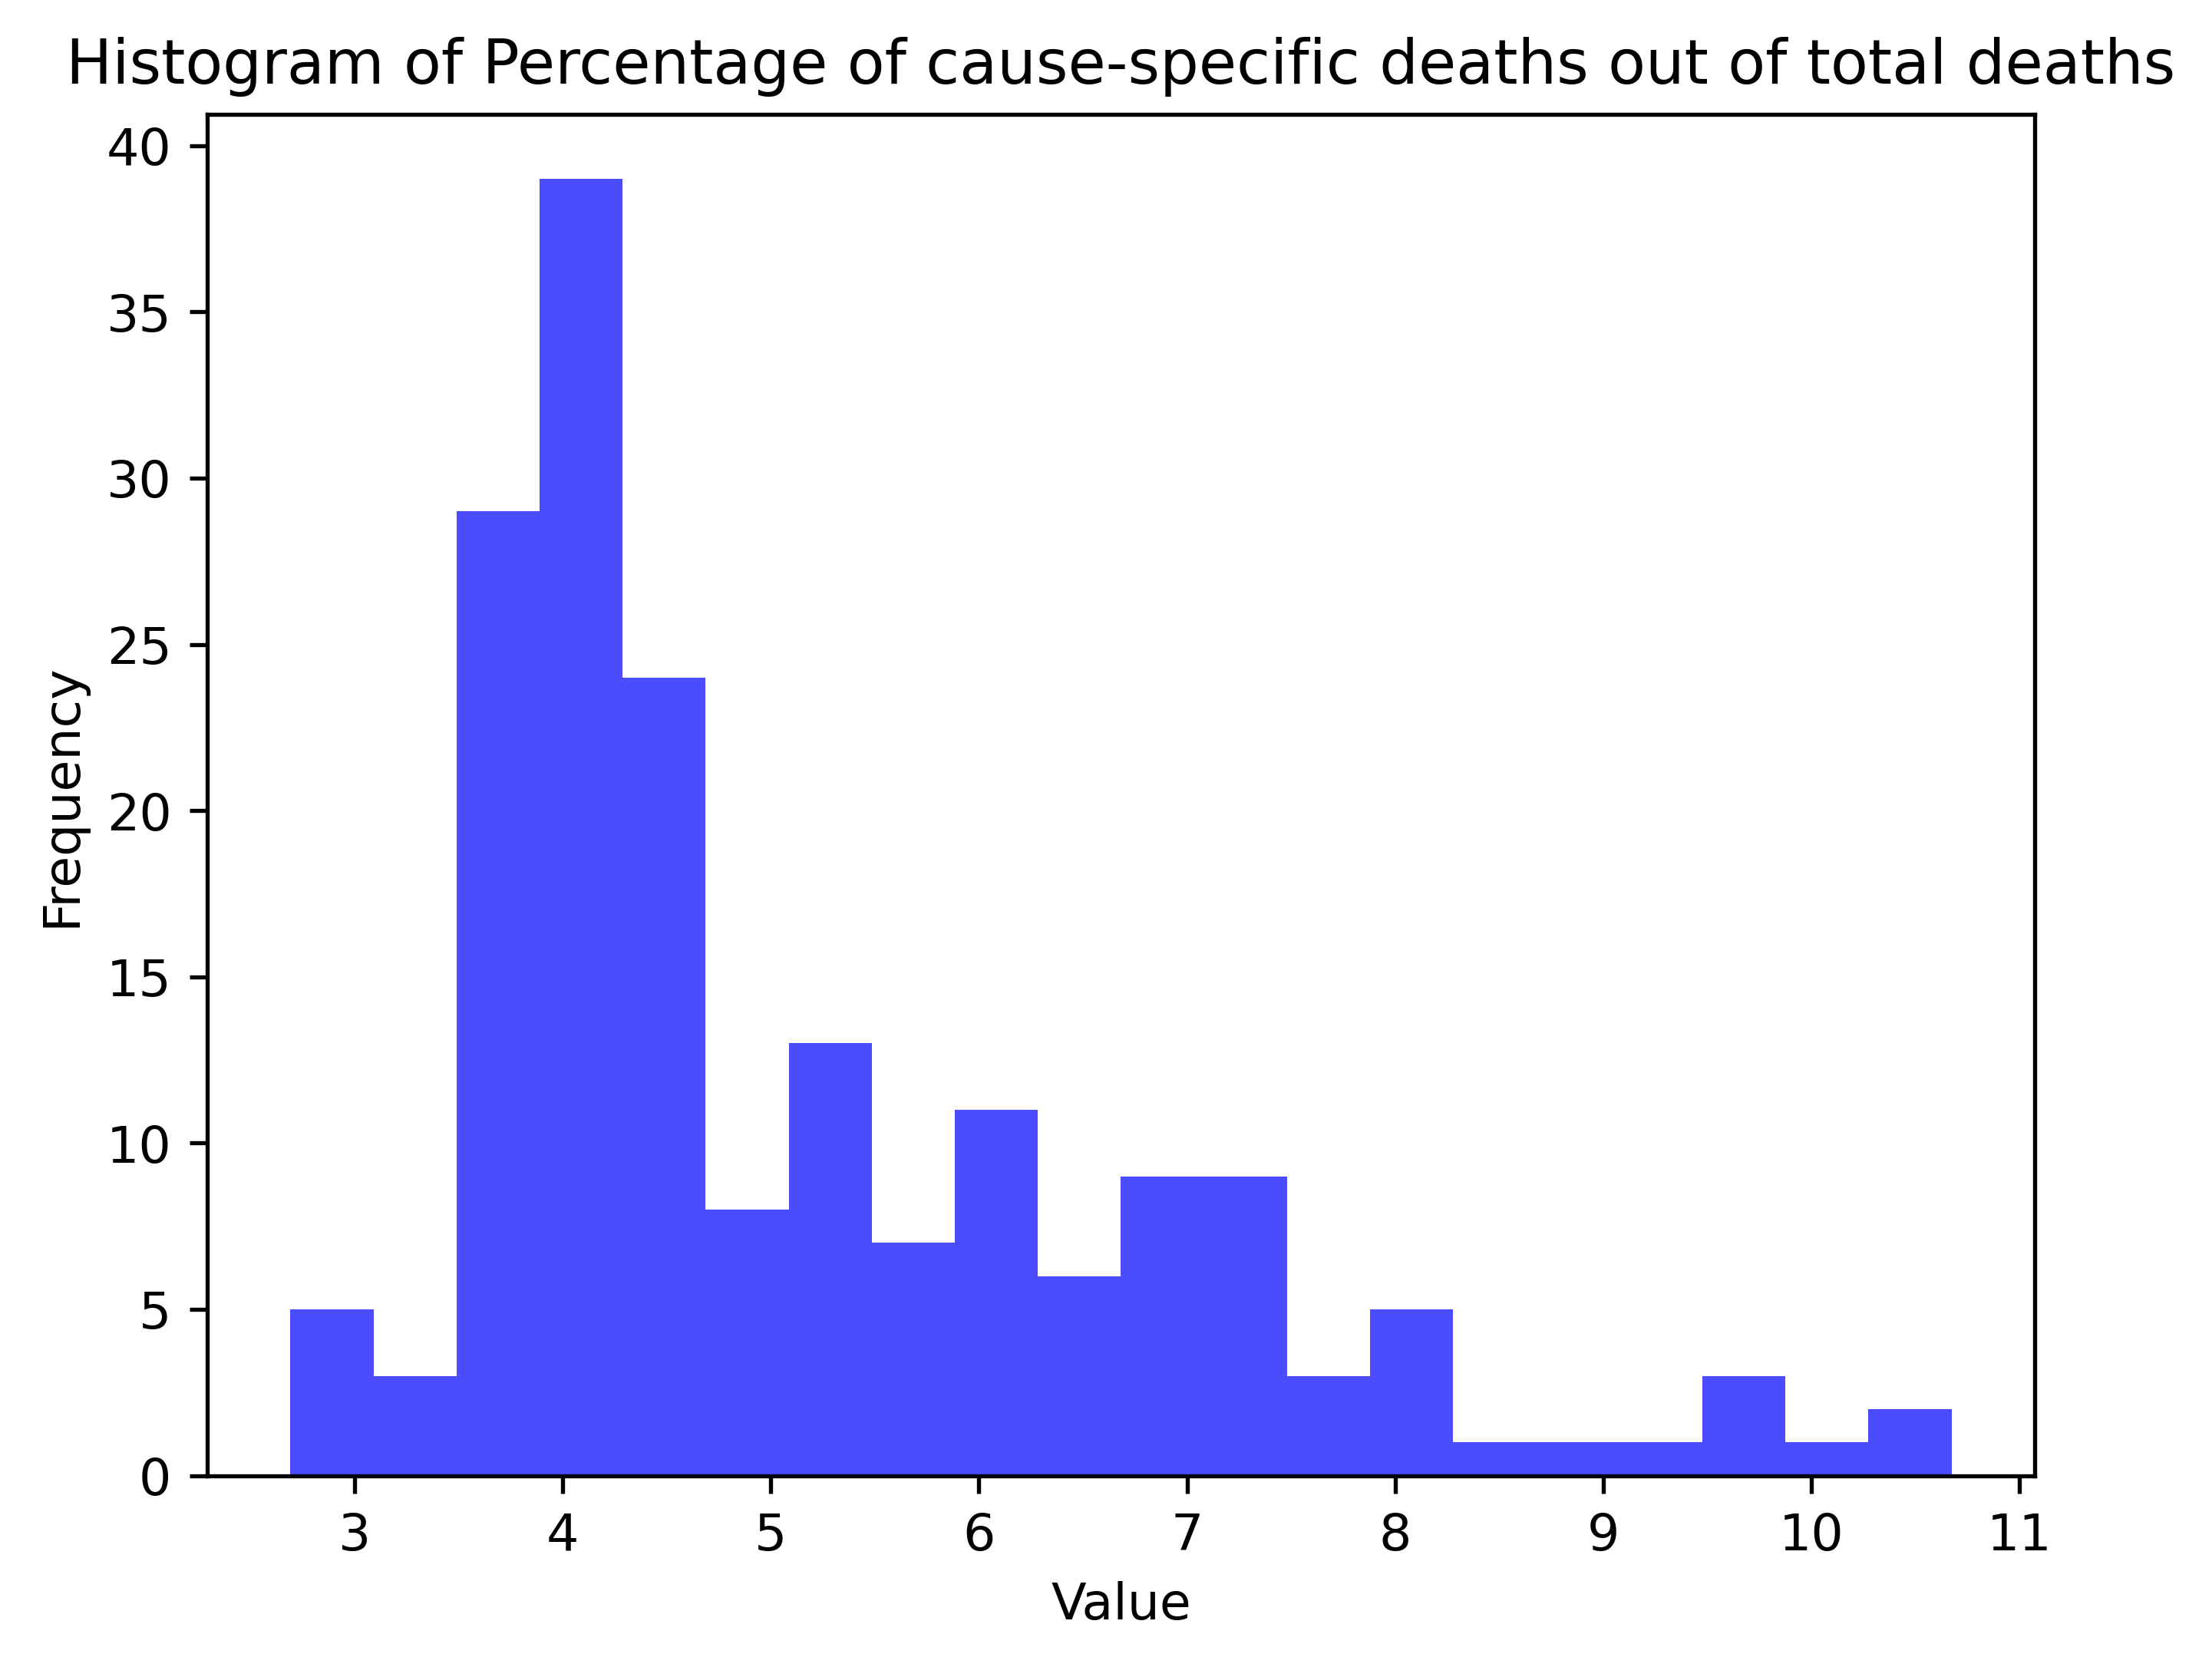

Mann-Whitney U-test for Men and Women on Percentage of cause-specific deaths out of total deaths:
Statistic: 1443.0
p-value: 0.061325715138465325
Conclusion: There is no significant difference between Men and Women.


In [18]:
test_distribution_and_compare_sexes(df1, 'Percentage of cause-specific deaths out of total deaths', 'Sex', alpha=0.05)

Shapiro-Wilk test p-value for Age-standardized death rate per 100 000 standard population: 1.5440151327622553e-12
Shapiro-Wilk test p-value for log-transformed Age-standardized death rate per 100 000 standard population: 1.2300984053581487e-05
Log-transformed Age-standardized death rate per 100 000 standard population is also not normally distributed.


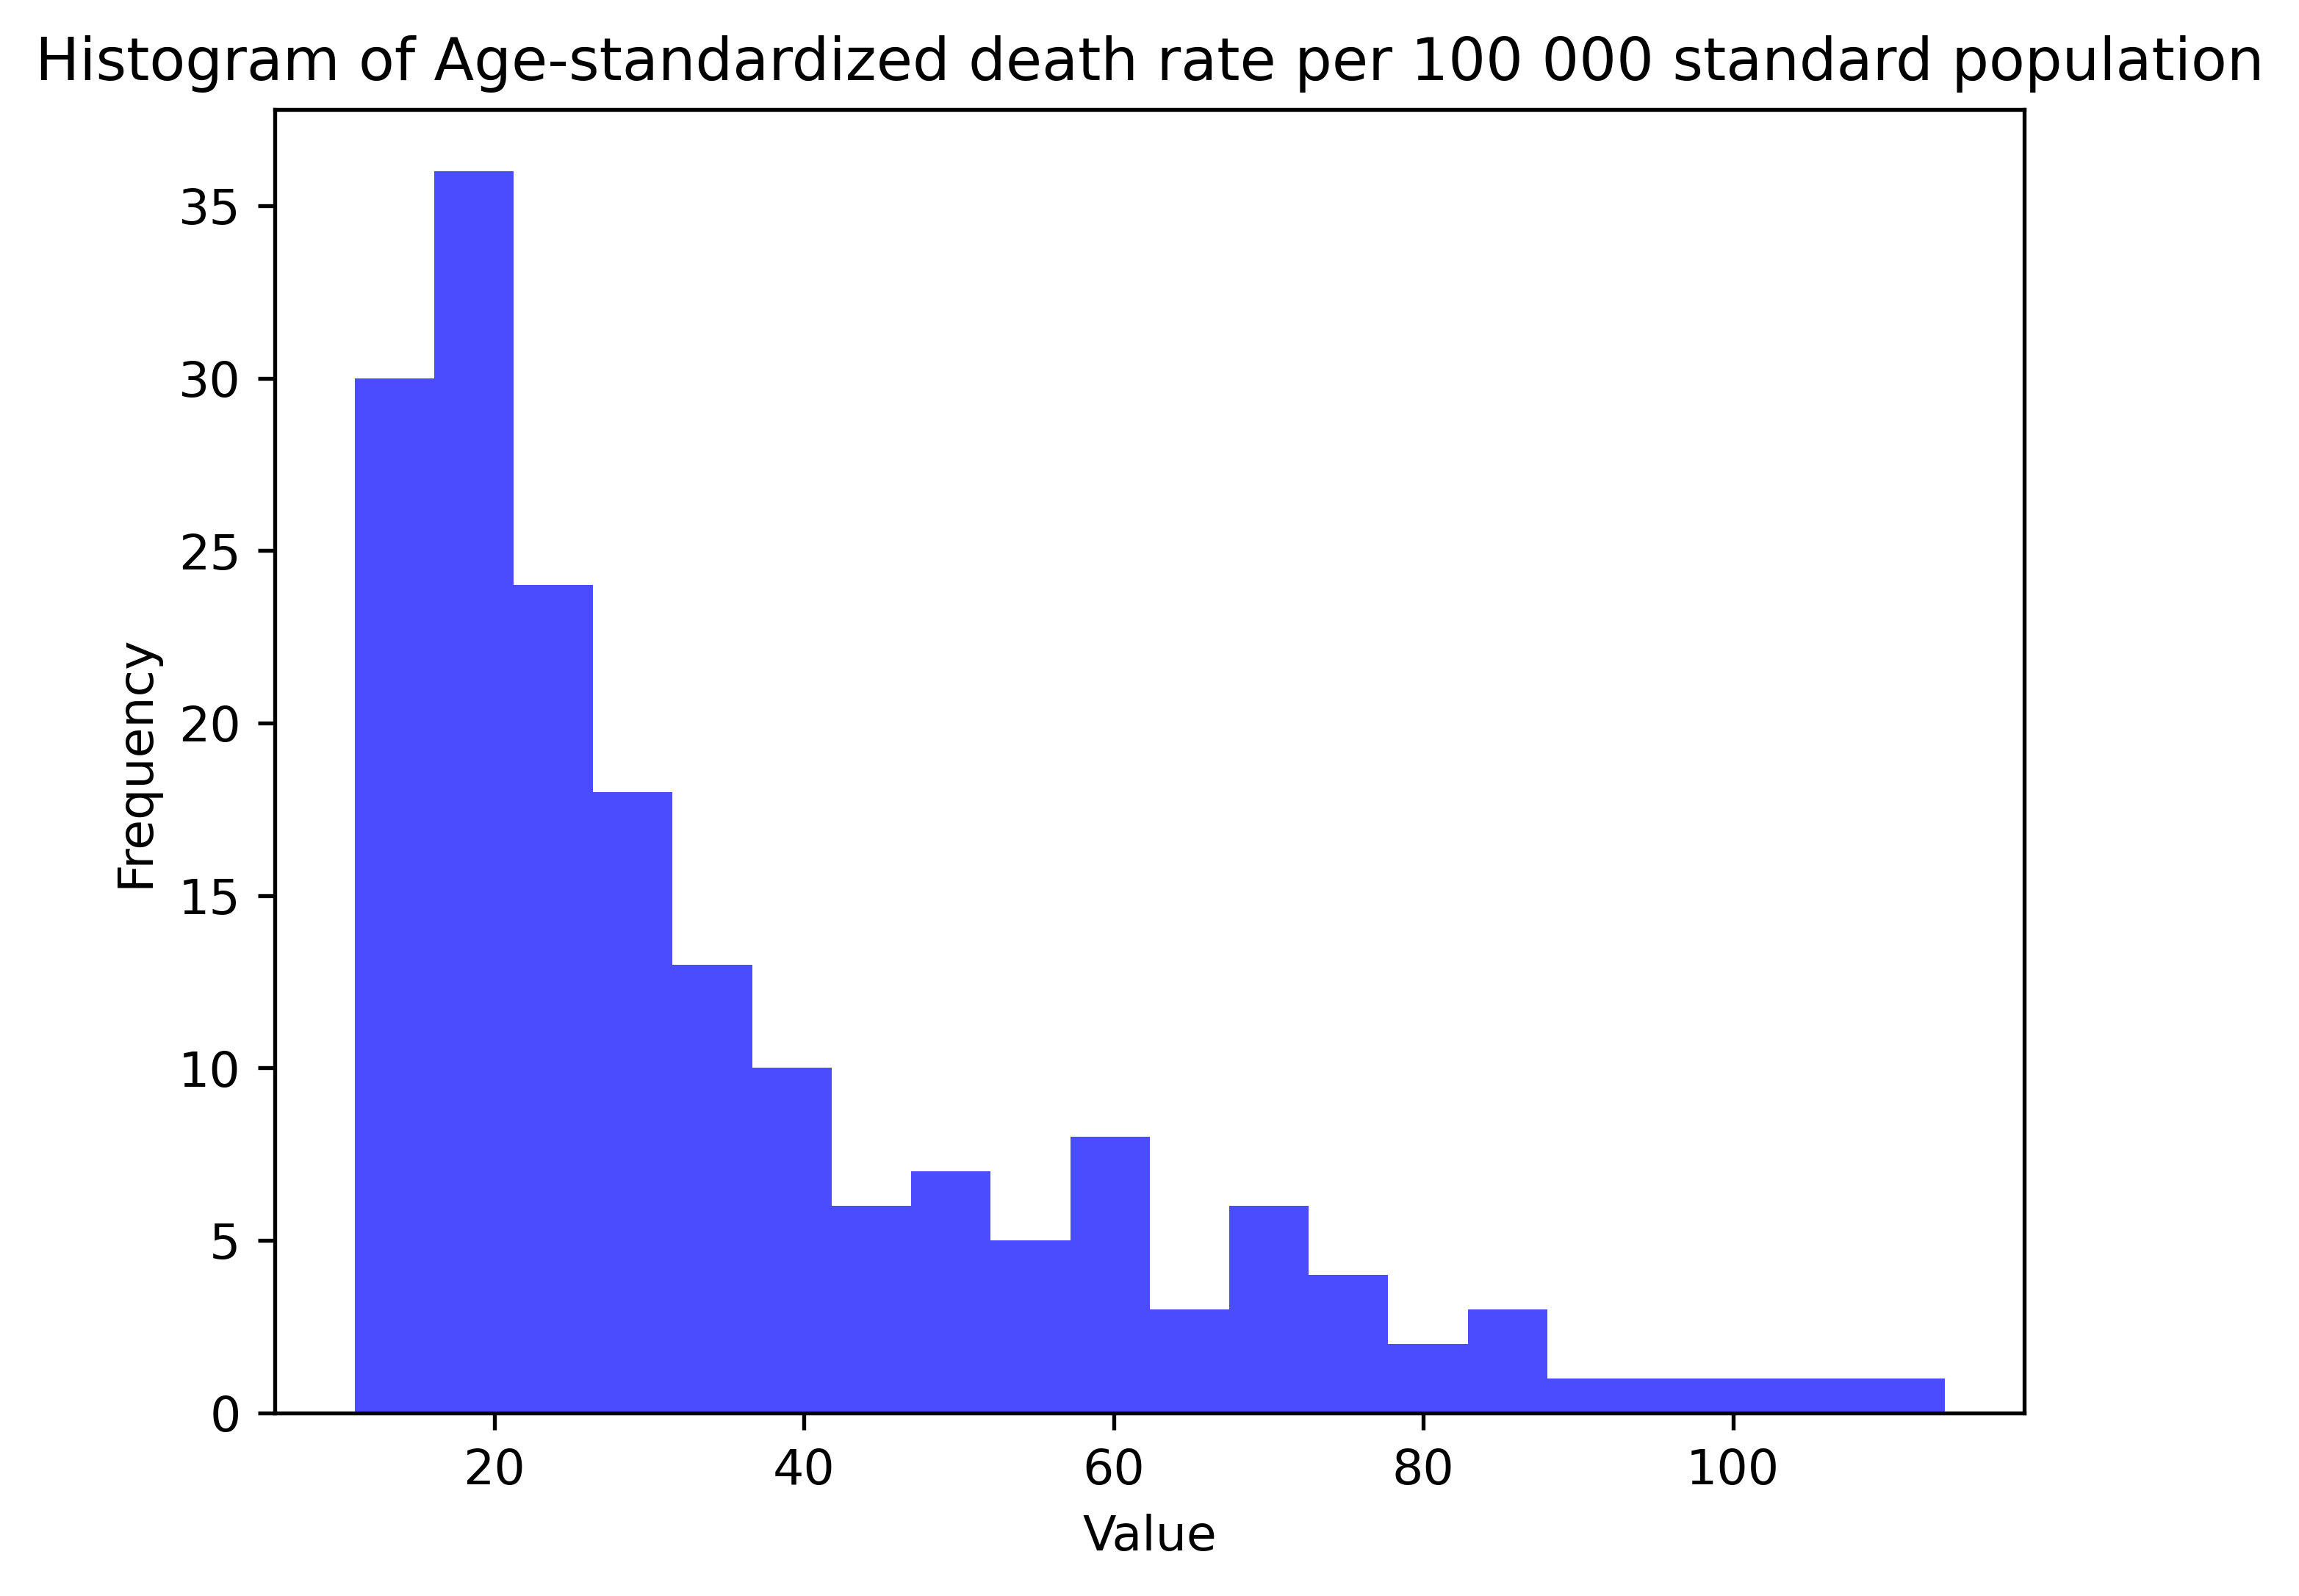

Mann-Whitney U-test for Men and Women on Age-standardized death rate per 100 000 standard population:
Statistic: 2507.0
p-value: 0.0002087679981429178
Conclusion: There is a significant difference between Men and Women.


In [19]:
test_distribution_and_compare_sexes(df1, 'Age-standardized death rate per 100 000 standard population', 'Sex', alpha=0.05)


Shapiro-Wilk test p-value for Death rate per 100 000 population: 2.628274160809685e-11
Shapiro-Wilk test p-value for log-transformed Death rate per 100 000 population: 7.737612577329855e-06
Log-transformed Death rate per 100 000 population is also not normally distributed.


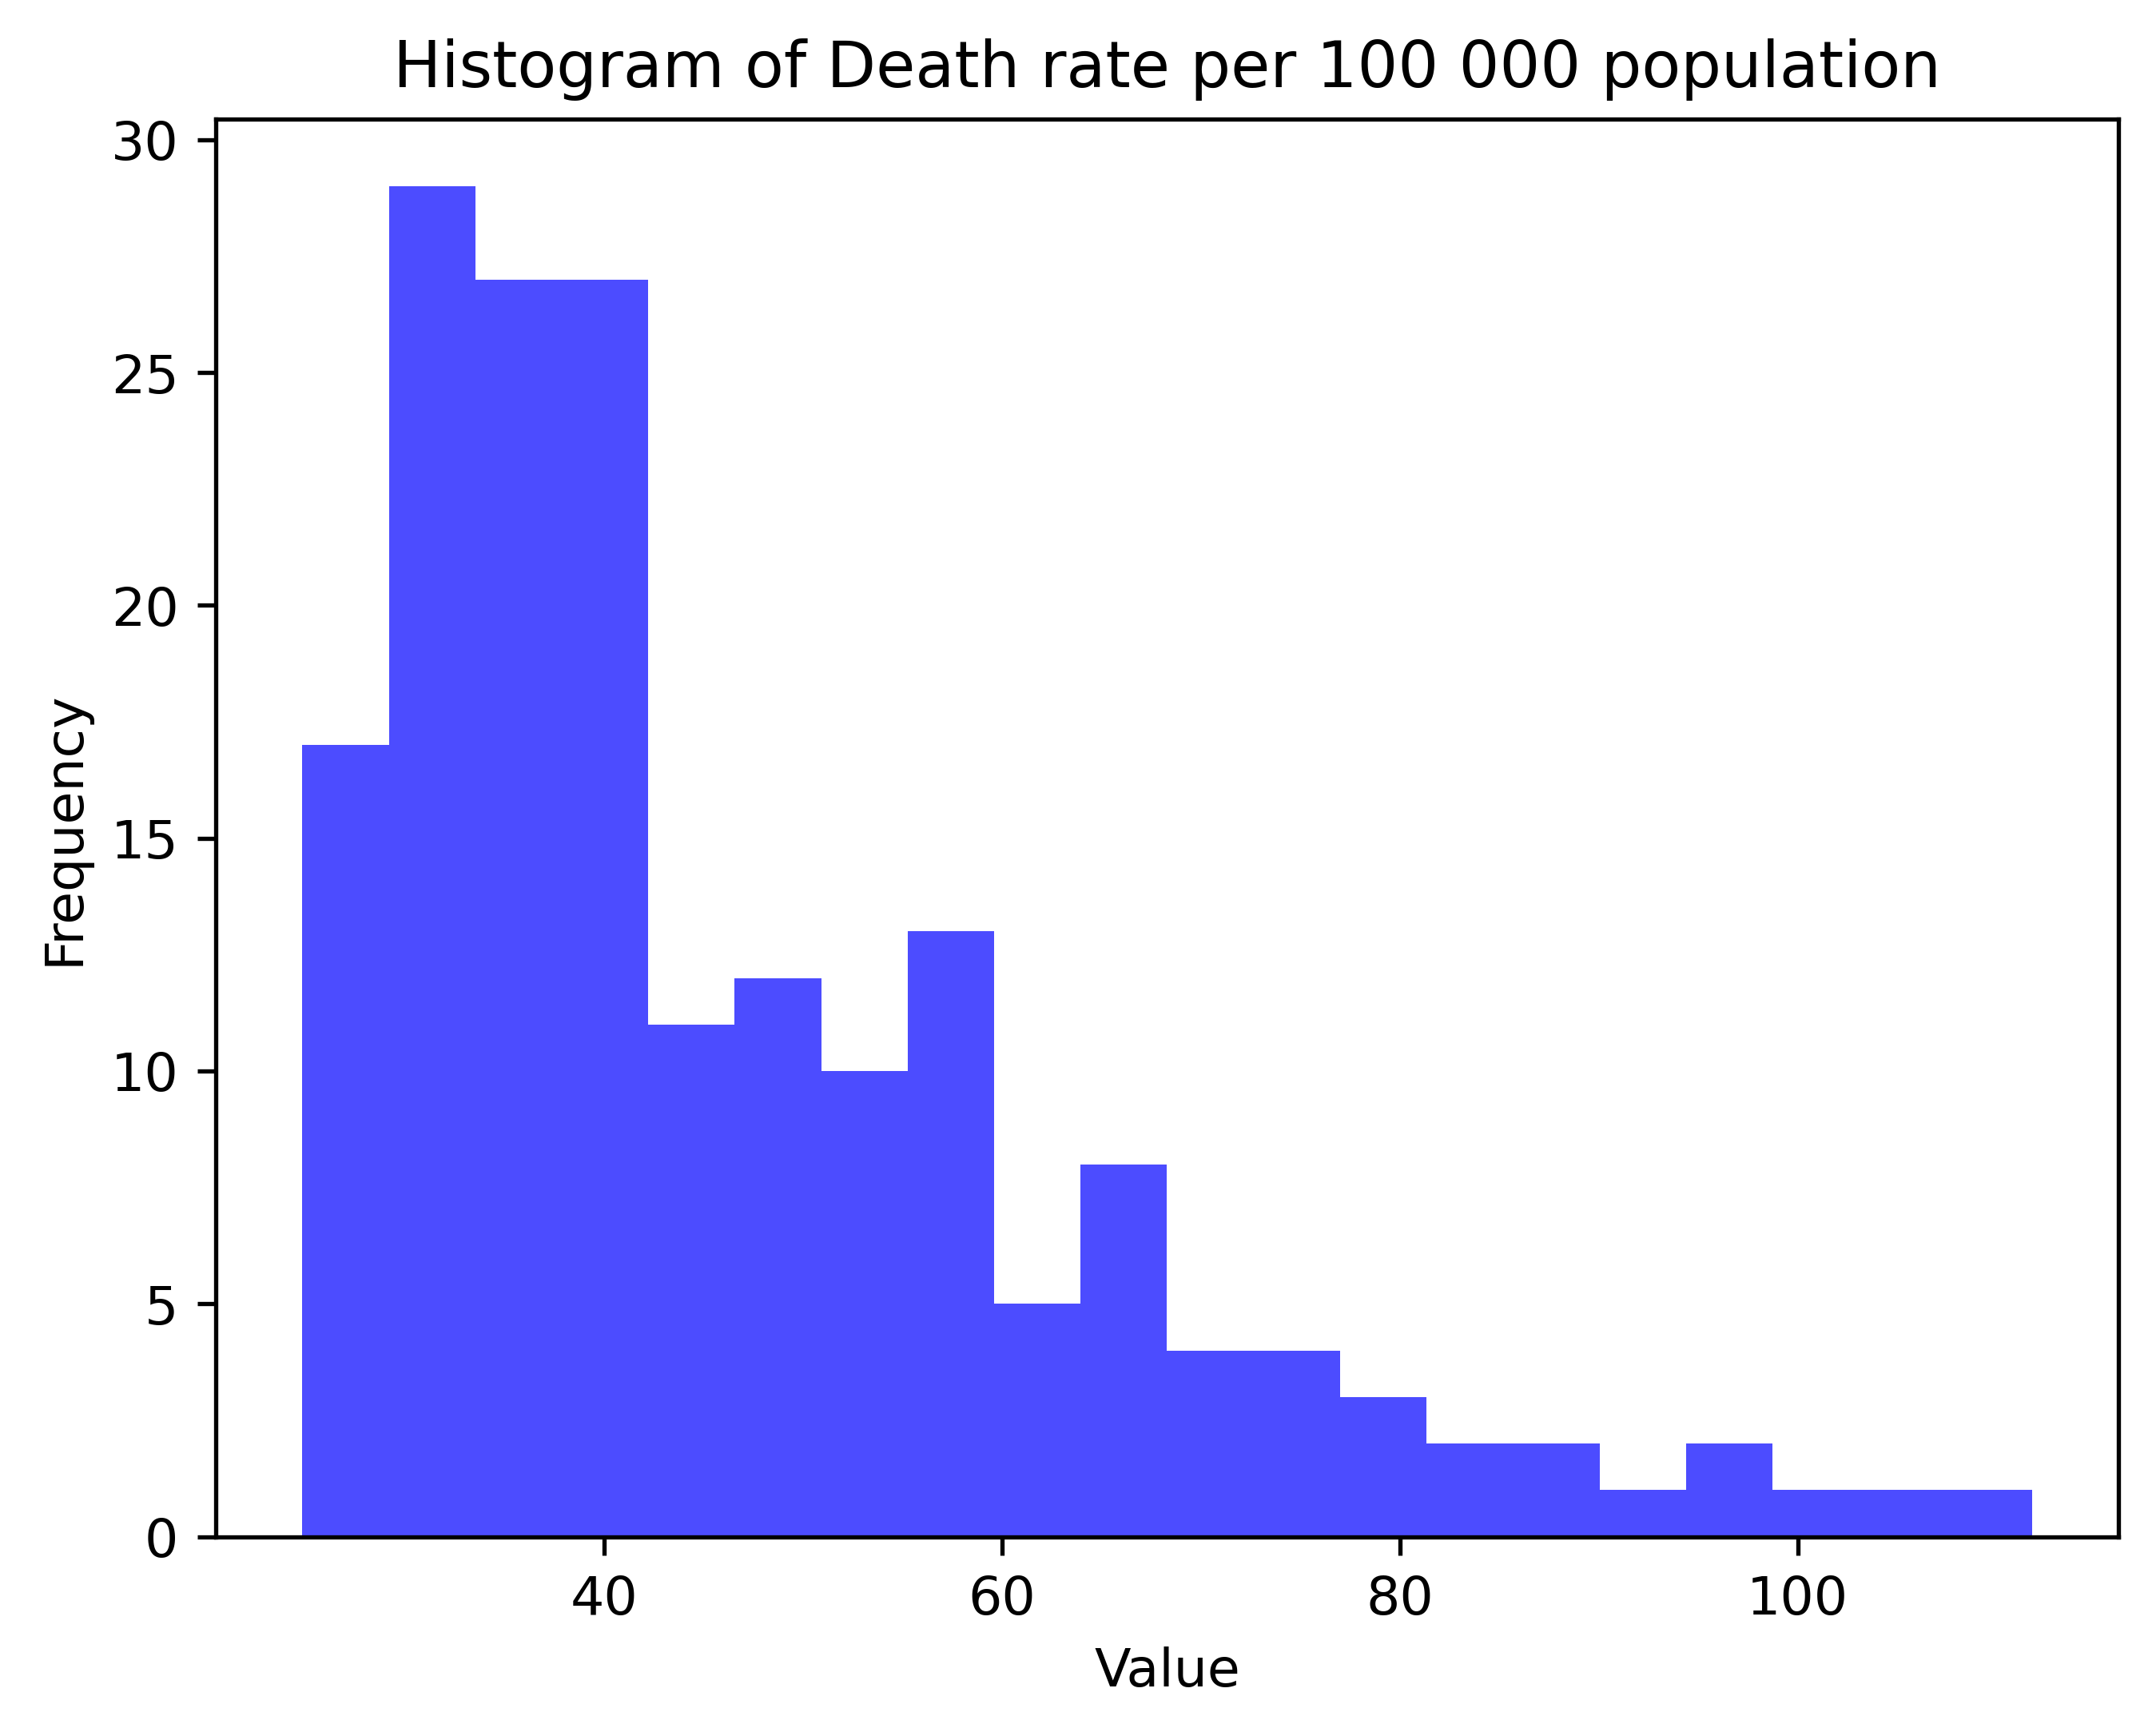

Mann-Whitney U-test for Men and Women on Death rate per 100 000 population:
Statistic: 1681.0
p-value: 0.5339657379759071
Conclusion: There is no significant difference between Men and Women.


In [20]:
test_distribution_and_compare_sexes(df1, 'Death rate per 100 000 population', 'Sex', alpha=0.05)


# Noncommunicable diseases

In [21]:
df2 = pd.read_excel('data/Noncommunicable diseases.xlsx')
df2 = df2[(df2['Year'] > 1959) & (df2['Year'] < 2020)]
df2 = df2.sort_values(by="Year", ascending=True)
df2.head(10)

,Region Code,Region Name,Country Code,Country Name,Year,Sex,Age group code,Age group,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population
27,EU,Europe,CHE,Switzerland,1960,All,Age_all,[All],41630.0,79.913234,680.373170,781.358509
28,EU,Europe,CHE,Switzerland,1960,Male,Age_all,[All],20818.0,77.012430,797.914662,806.524097
29,EU,Europe,CHE,Switzerland,1960,Female,Age_all,[All],20812.0,83.042056,590.731582,757.709251
30,EU,Europe,CHE,Switzerland,1961,All,Age_all,[All],41604.0,81.570073,661.317901,765.567496
31,EU,Europe,CHE,Switzerland,1961,Male,Age_all,[All],21238.0,78.884225,791.807880,806.026794
32,EU,Europe,CHE,Switzerland,1961,Female,Age_all,[All],20366.0,84.572900,562.575749,727.487051
33,EU,Europe,CHE,Switzerland,1962,All,Age_all,[All],44504.0,80.732880,692.182300,798.449891
34,EU,Europe,CHE,Switzerland,1962,Male,Age_all,[All],22502.0,78.102114,825.575080,831.467317
35,EU,Europe,CHE,Switzerland,1962,Female,Age_all,[All],22002.0,83.613286,591.899228,767.288579
38,EU,Europe,CHE,Switzerland,1963,Female,Age_all,[All],22370.0,82.962468,588.320299,764.603343


In [22]:
#to see if there are any missing values and see what data types we have
print(df2.info())
#no NAs we good

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 27 to 196
Data columns (total 12 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Region Code                                                  180 non-null    object 
 1   Region Name                                                  180 non-null    object 
 2   Country Code                                                 180 non-null    object 
 3   Country Name                                                 180 non-null    object 
 4   Year                                                         180 non-null    int64  
 5   Sex                                                          180 non-null    object 
 6   Age group code                                               180 non-null    object 
 7   Age group                                                    180 non-null    ob

In [23]:
#to get rid of uneccessary stuff
columns_to_remove = ['Region Code', 'Region Name','Country Code','Age group code','Age group', ]
df2 = df2.drop(columns=columns_to_remove)
columns_to_remove1 = ['Year']
df2stat = df2.drop(columns=columns_to_remove1)
grouped_stats2 = df2stat.groupby('Sex').describe()
#grouped_stats2.to_excel('grouped_stats noncomm.xlsx', sheet_name='Statistics')

Distributional analysis and tests to see if there are significant differences between of numeric variables for genders.

Shapiro-Wilk test p-value for Number: 1.297214547456608e-15
Shapiro-Wilk test p-value for log-transformed Number: 2.1885766040164595e-14
Log-transformed Number is also not normally distributed.


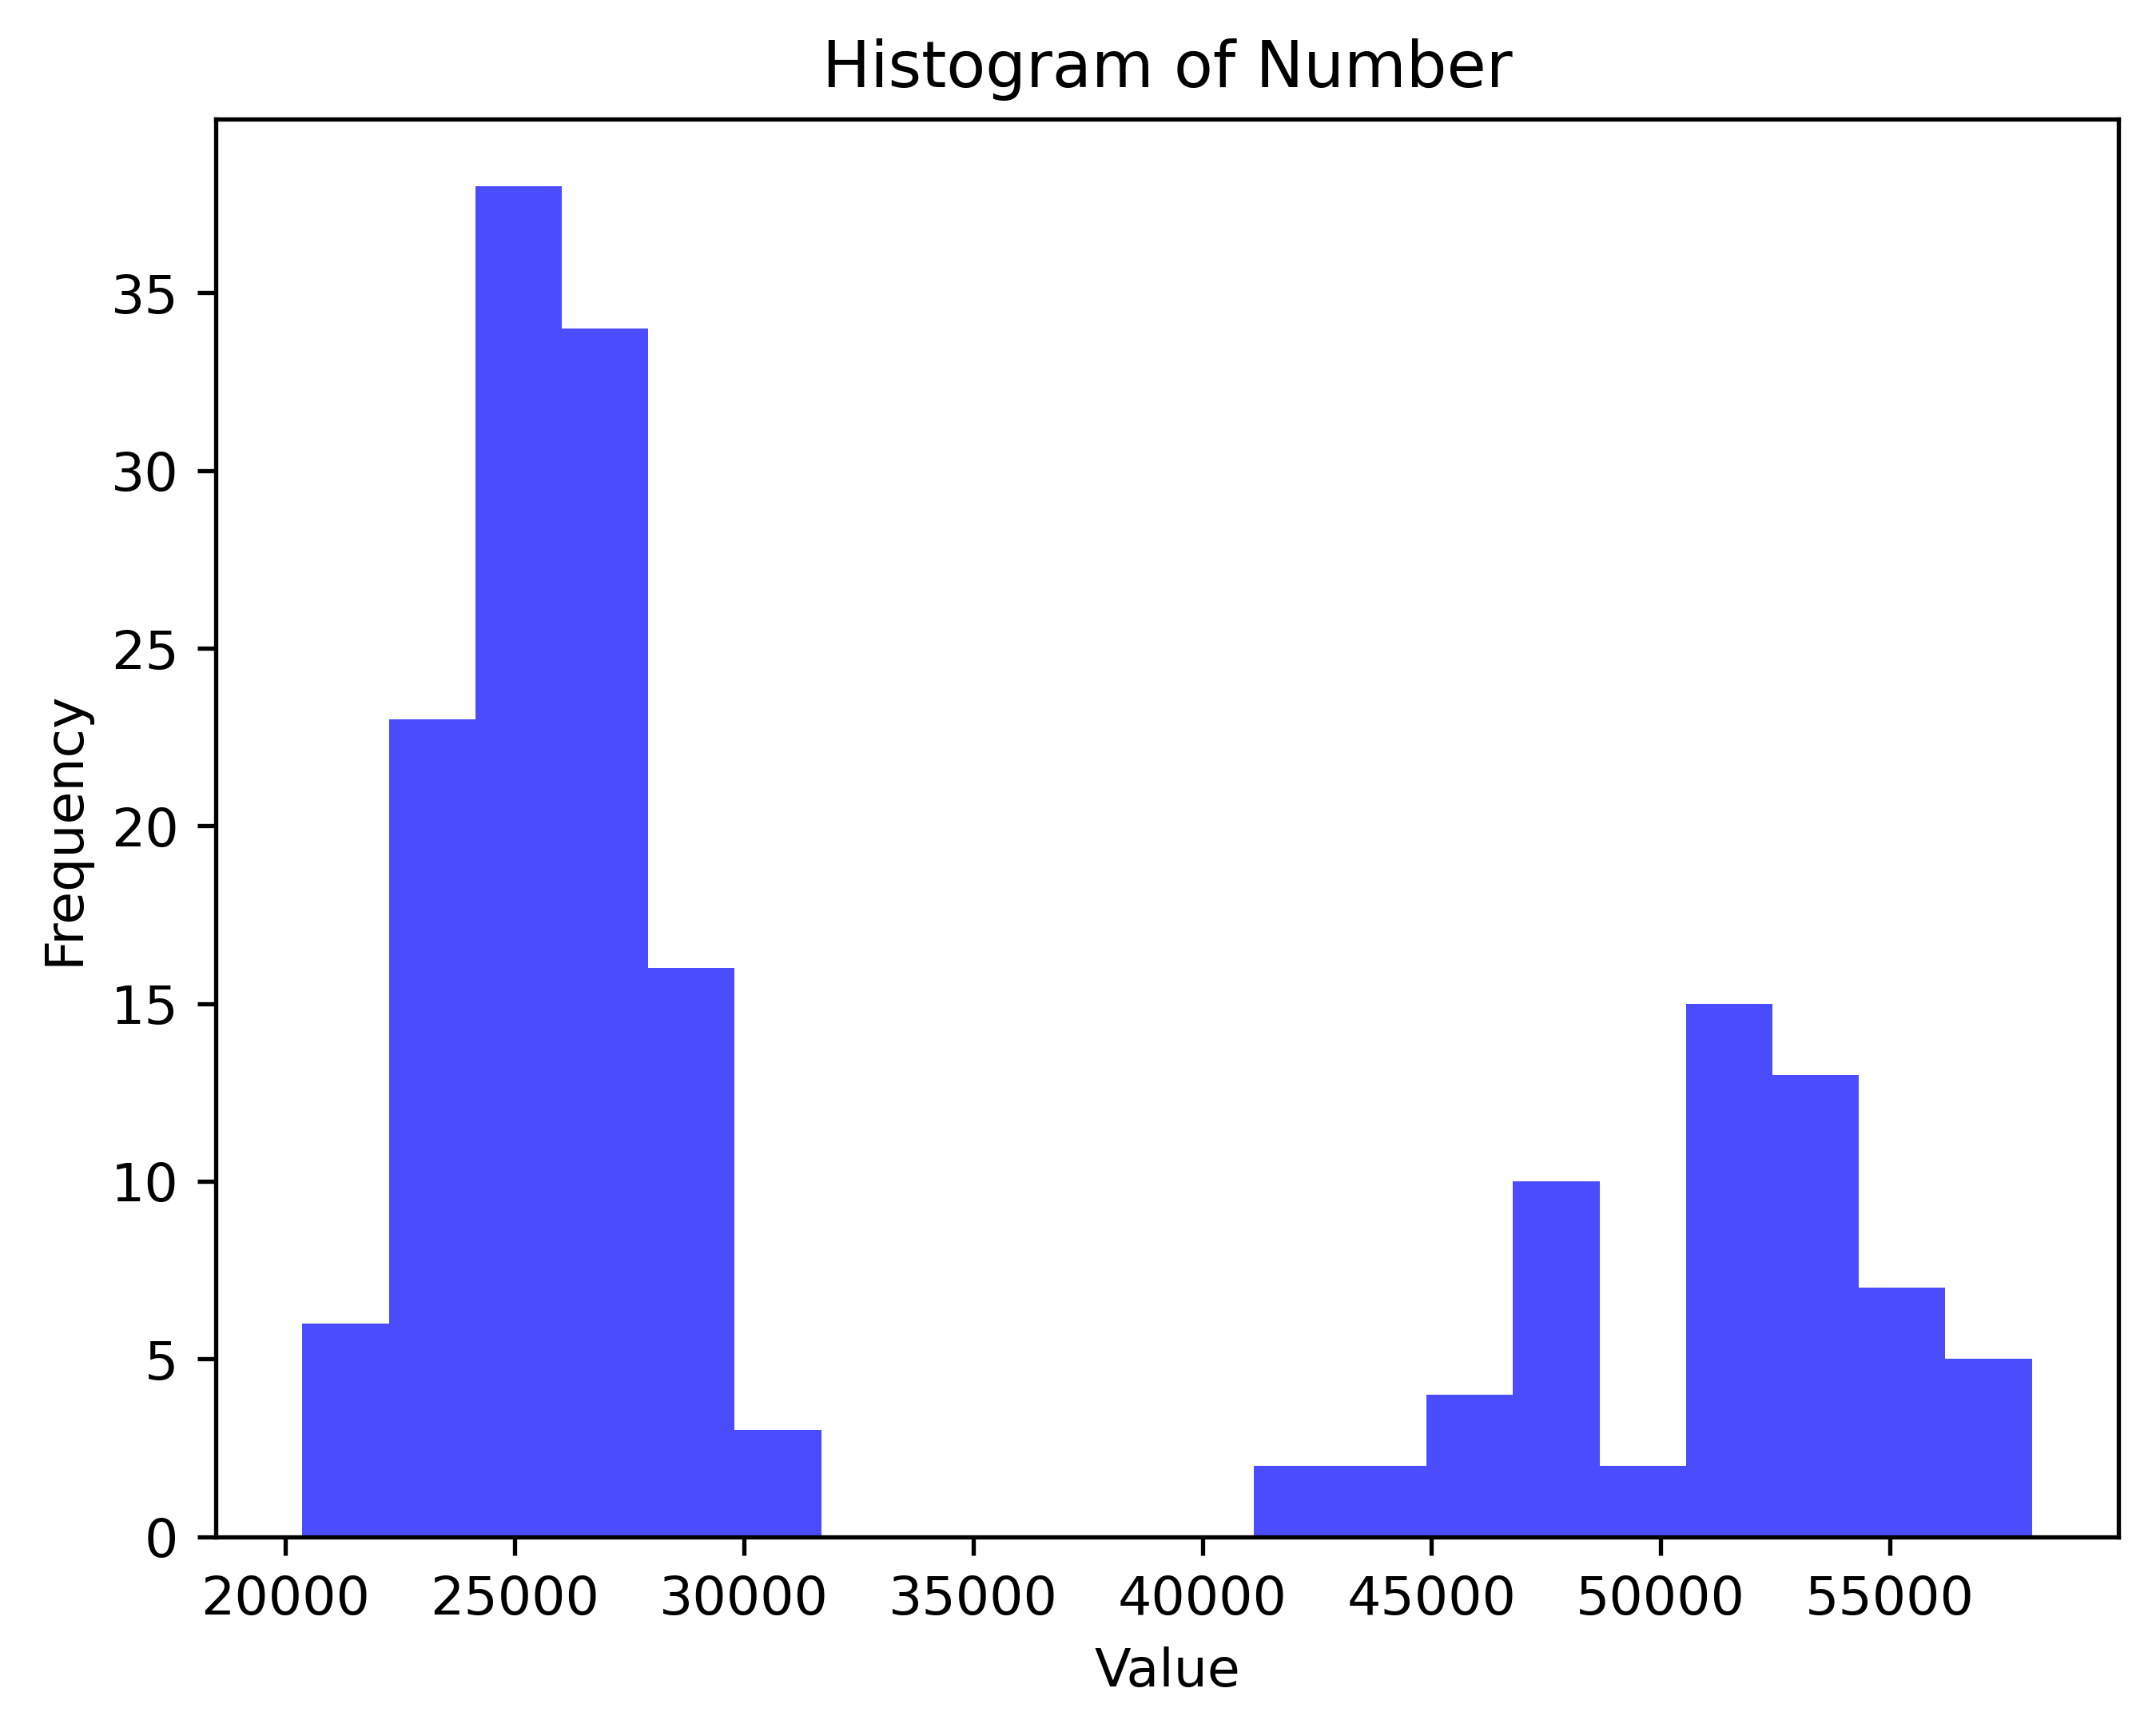

Mann-Whitney U-test for Men and Women on Number:
Statistic: 1594.0
p-value: 0.2807681883057561
Conclusion: There is no significant difference between Men and Women.


In [24]:
test_distribution_and_compare_sexes(df2, 'Number', 'Sex', alpha=0.05)

Shapiro-Wilk test p-value for Percentage of cause-specific deaths out of total deaths: 1.4277152331487741e-06
Shapiro-Wilk test p-value for log-transformed Percentage of cause-specific deaths out of total deaths: 3.122007683487027e-07
Log-transformed Percentage of cause-specific deaths out of total deaths is also not normally distributed.


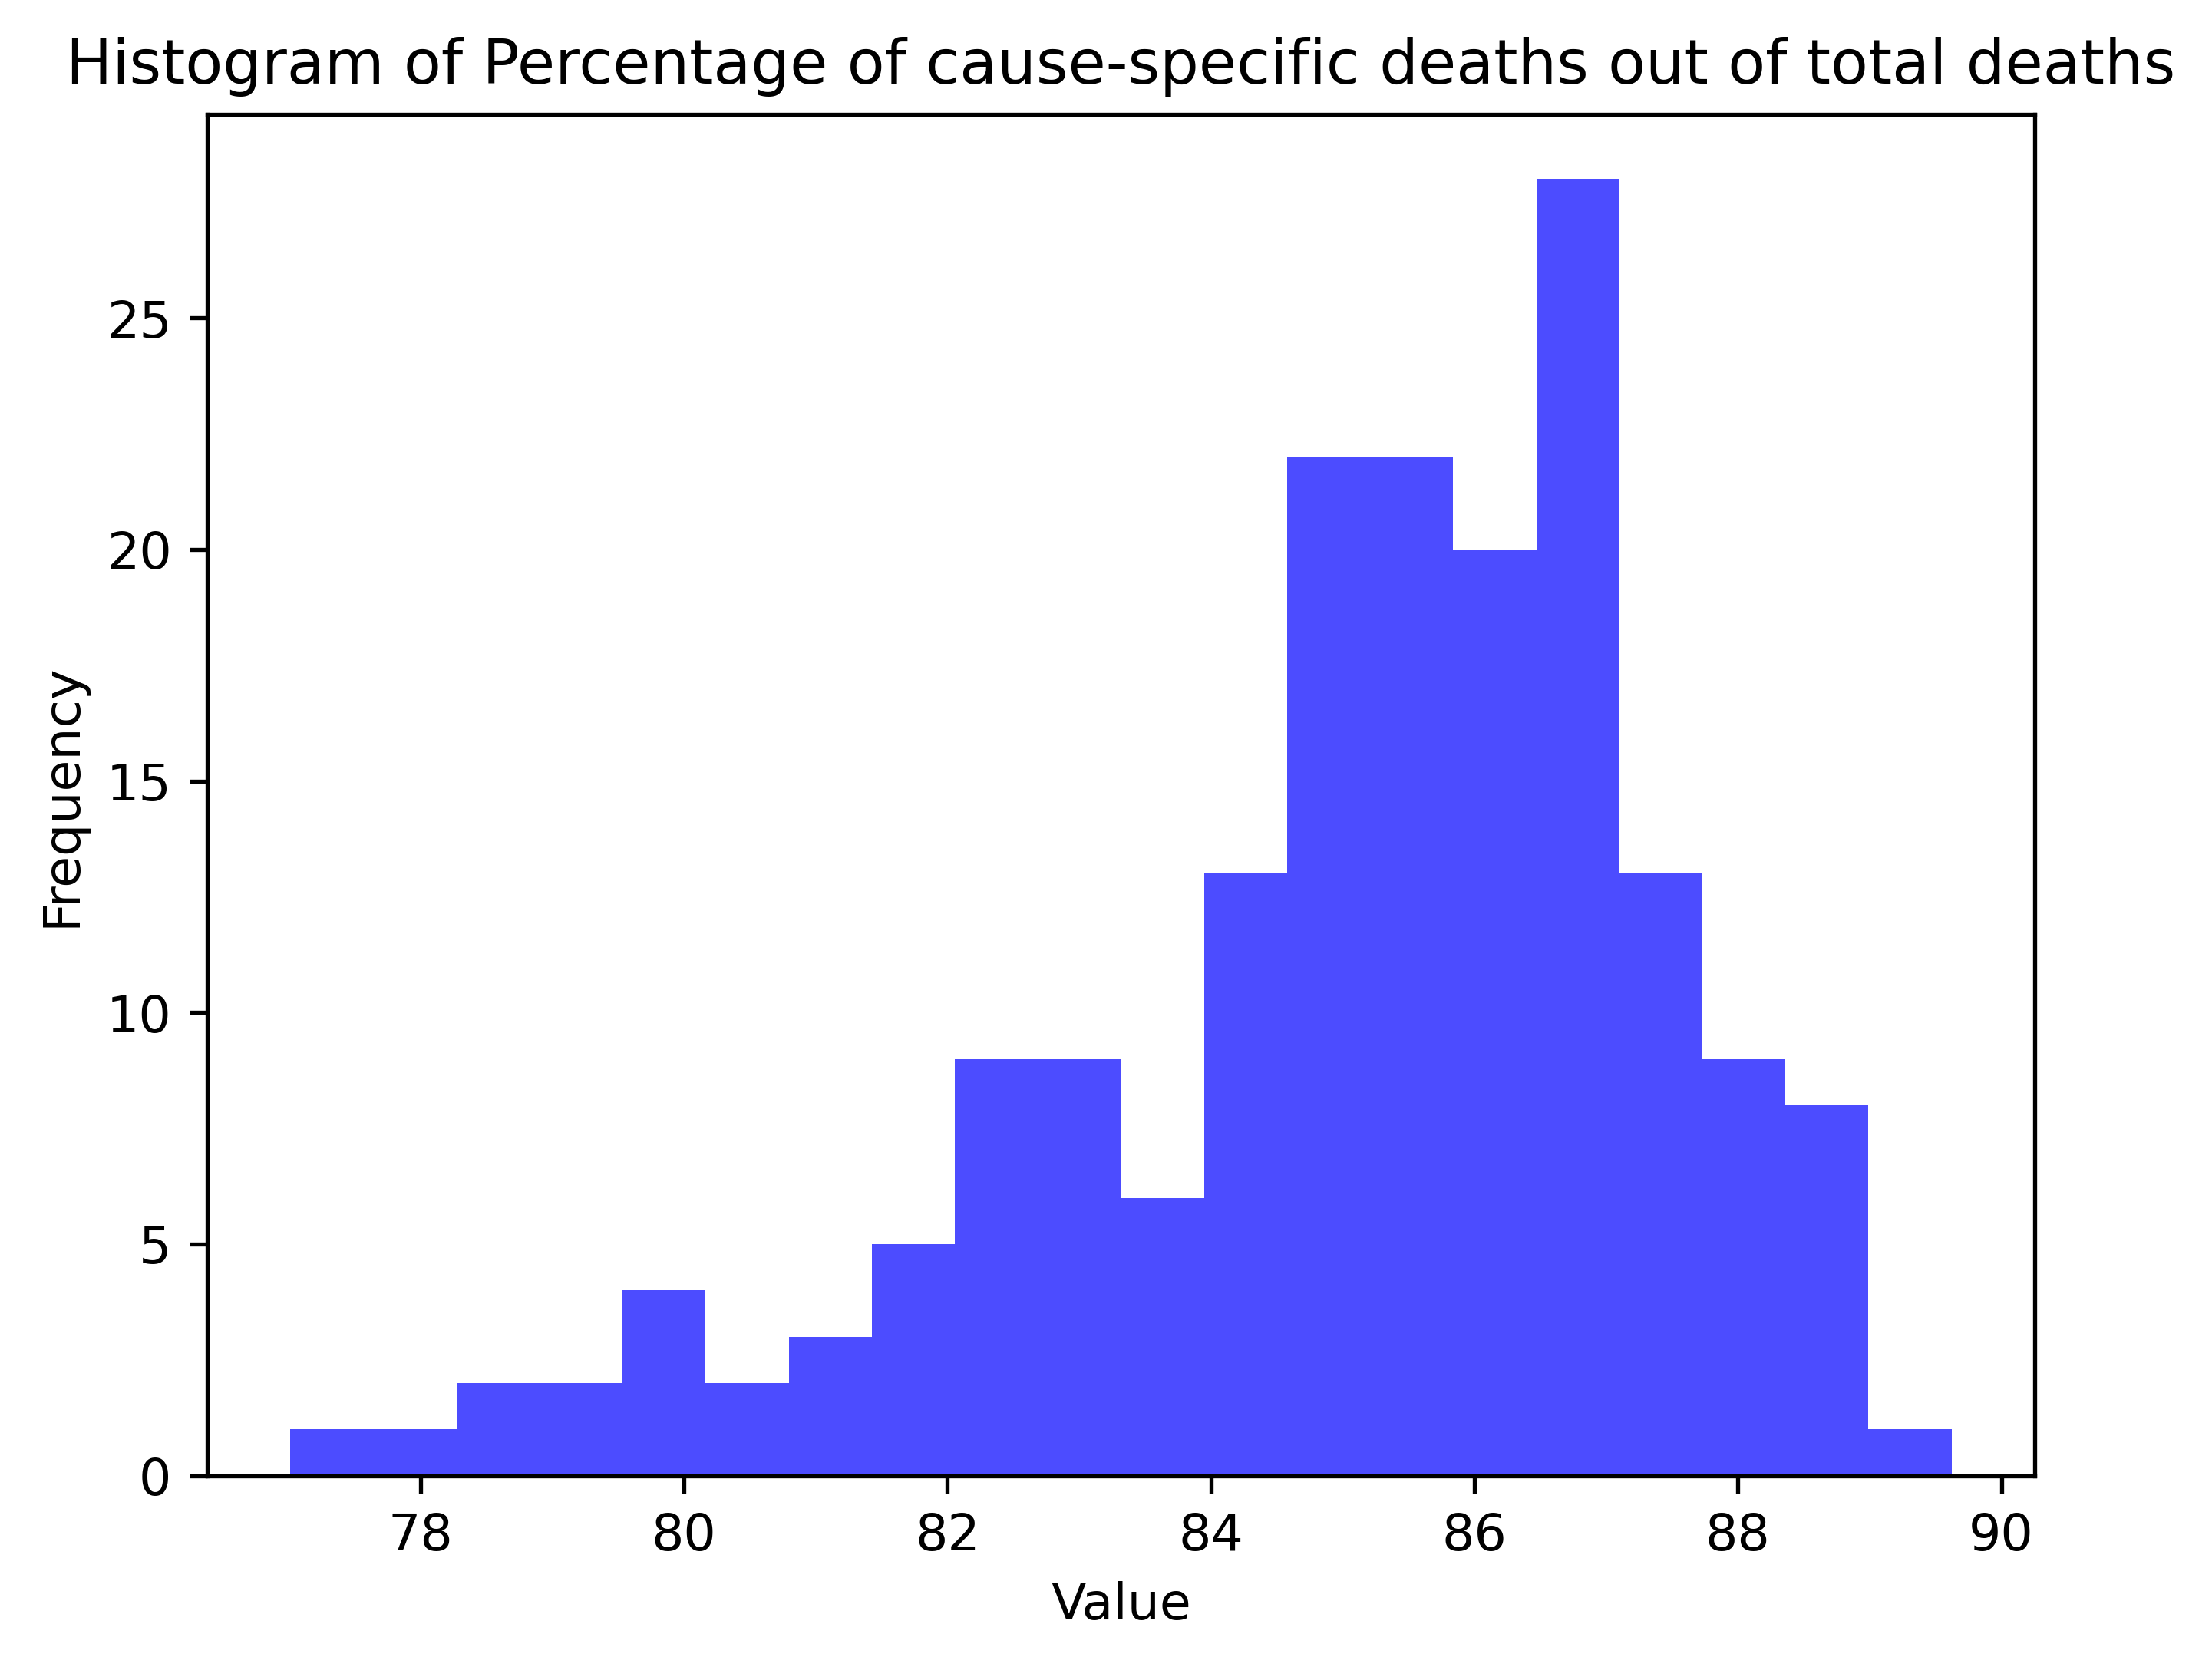

Mann-Whitney U-test for Men and Women on Percentage of cause-specific deaths out of total deaths:
Statistic: 367.0
p-value: 5.5334103385233365e-14
Conclusion: There is a significant difference between Men and Women.


In [25]:
test_distribution_and_compare_sexes(df2, 'Percentage of cause-specific deaths out of total deaths', 'Sex', alpha=0.05)

Shapiro-Wilk test p-value for Age-standardized death rate per 100 000 standard population: 6.9220532168401405e-06
Shapiro-Wilk test p-value for log-transformed Age-standardized death rate per 100 000 standard population: 0.0005155204562470317
Log-transformed Age-standardized death rate per 100 000 standard population is also not normally distributed.


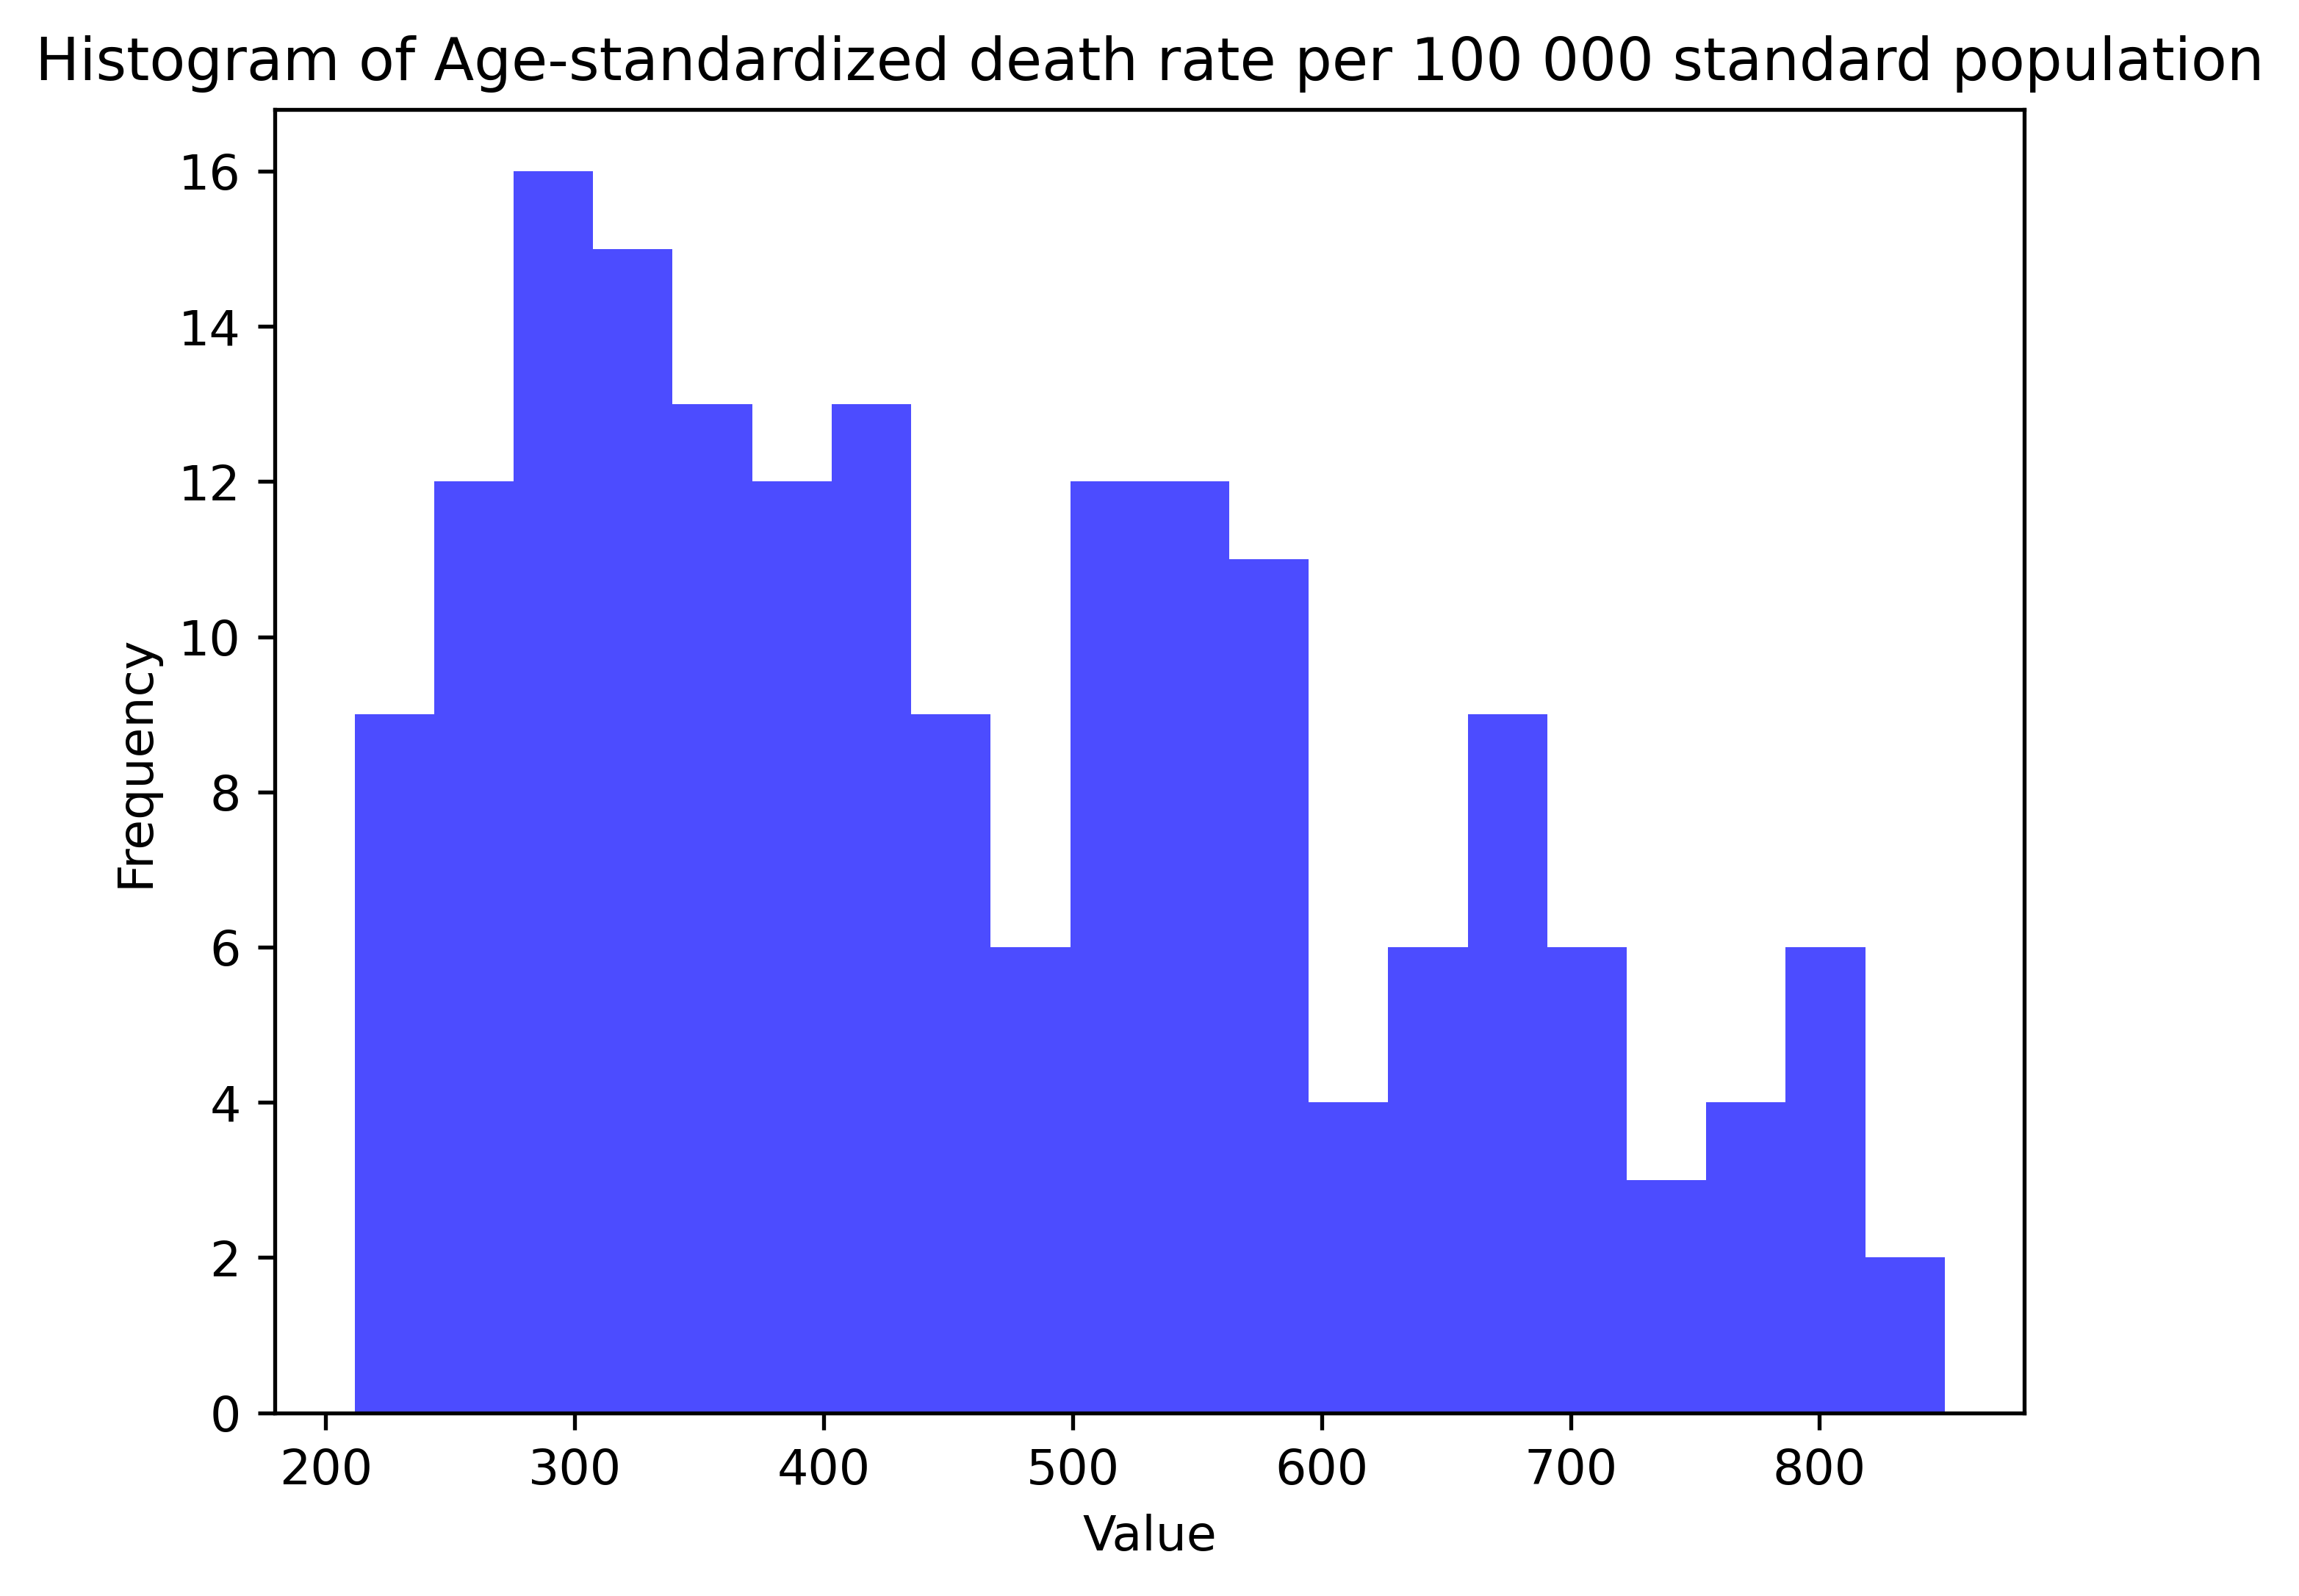

Mann-Whitney U-test for Men and Women on Age-standardized death rate per 100 000 standard population:
Statistic: 3004.0
p-value: 2.671439663630276e-10
Conclusion: There is a significant difference between Men and Women.


In [26]:
test_distribution_and_compare_sexes(df2, 'Age-standardized death rate per 100 000 standard population', 'Sex', alpha=0.05)

In [27]:
test_distribution_and_compare_sexes(df2, 'Death rate per 100 000 population', 'Sex', alpha=0.05)

Shapiro-Wilk test p-value for Death rate per 100 000 population: 0.2848713994026184
Death rate per 100 000 population is normally distributed.
T-test for Men and Women:
T-statistic: 2.6232129948394425
p-value: 0.009860459695880234
Conclusion: There is a significant difference between Men and Women.


## Malignant neoplasms

In [28]:
dfm = pd.read_excel('data/malignant neoplasms.xlsx')
dfm = dfm[(dfm['Year'] > 1959) & (dfm['Year'] < 2020)]
dfm = dfm.sort_values(by="Year", ascending=True)
dfm.head(10)

,Region Code,Region Name,Country Code,Country Name,Year,Sex,Age group code,Age group,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population
27,EU,Europe,CHE,Switzerland,1960,All,Age_all,[All],10062.0,19.315084,157.999534,188.854896
28,EU,Europe,CHE,Switzerland,1960,Male,Age_all,[All],5311.0,19.647085,191.839851,205.757012
29,EU,Europe,CHE,Switzerland,1960,Female,Age_all,[All],4751.0,18.956987,133.427527,172.971202
30,EU,Europe,CHE,Switzerland,1961,All,Age_all,[All],10362.0,20.316054,159.361353,190.674223
31,EU,Europe,CHE,Switzerland,1961,Male,Age_all,[All],5582.0,20.733202,197.588060,211.848647
32,EU,Europe,CHE,Switzerland,1961,Female,Age_all,[All],4780.0,19.849674,131.878766,170.744776
33,EU,Europe,CHE,Switzerland,1962,All,Age_all,[All],10535.0,19.111111,158.448422,189.009293
34,EU,Europe,CHE,Switzerland,1962,Male,Age_all,[All],5615.0,19.489084,194.731971,207.478846
35,EU,Europe,CHE,Switzerland,1962,Female,Age_all,[All],4920.0,18.697271,132.233164,171.578030
38,EU,Europe,CHE,Switzerland,1963,Female,Age_all,[All],4865.0,18.042575,128.149583,166.284992


In [29]:
#to get rid of uneccessary stuff
columns_to_remove = ['Region Code', 'Region Name','Country Code','Age group code','Age group', ]
dfm = dfm.drop(columns=columns_to_remove)
columns_to_remove1 = ['Year']
df2stat = dfm.drop(columns=columns_to_remove1)
grouped_stats2 = df2stat.groupby('Sex').describe()
#grouped_stats2.to_excel('grouped_stats malignant.xlsx', sheet_name='Statistics')

Shapiro-Wilk test p-value for Percentage of cause-specific deaths out of total deaths: 0.0010920854983851314
Shapiro-Wilk test p-value for log-transformed Percentage of cause-specific deaths out of total deaths: 0.0030510053038597107
Log-transformed Percentage of cause-specific deaths out of total deaths is also not normally distributed.


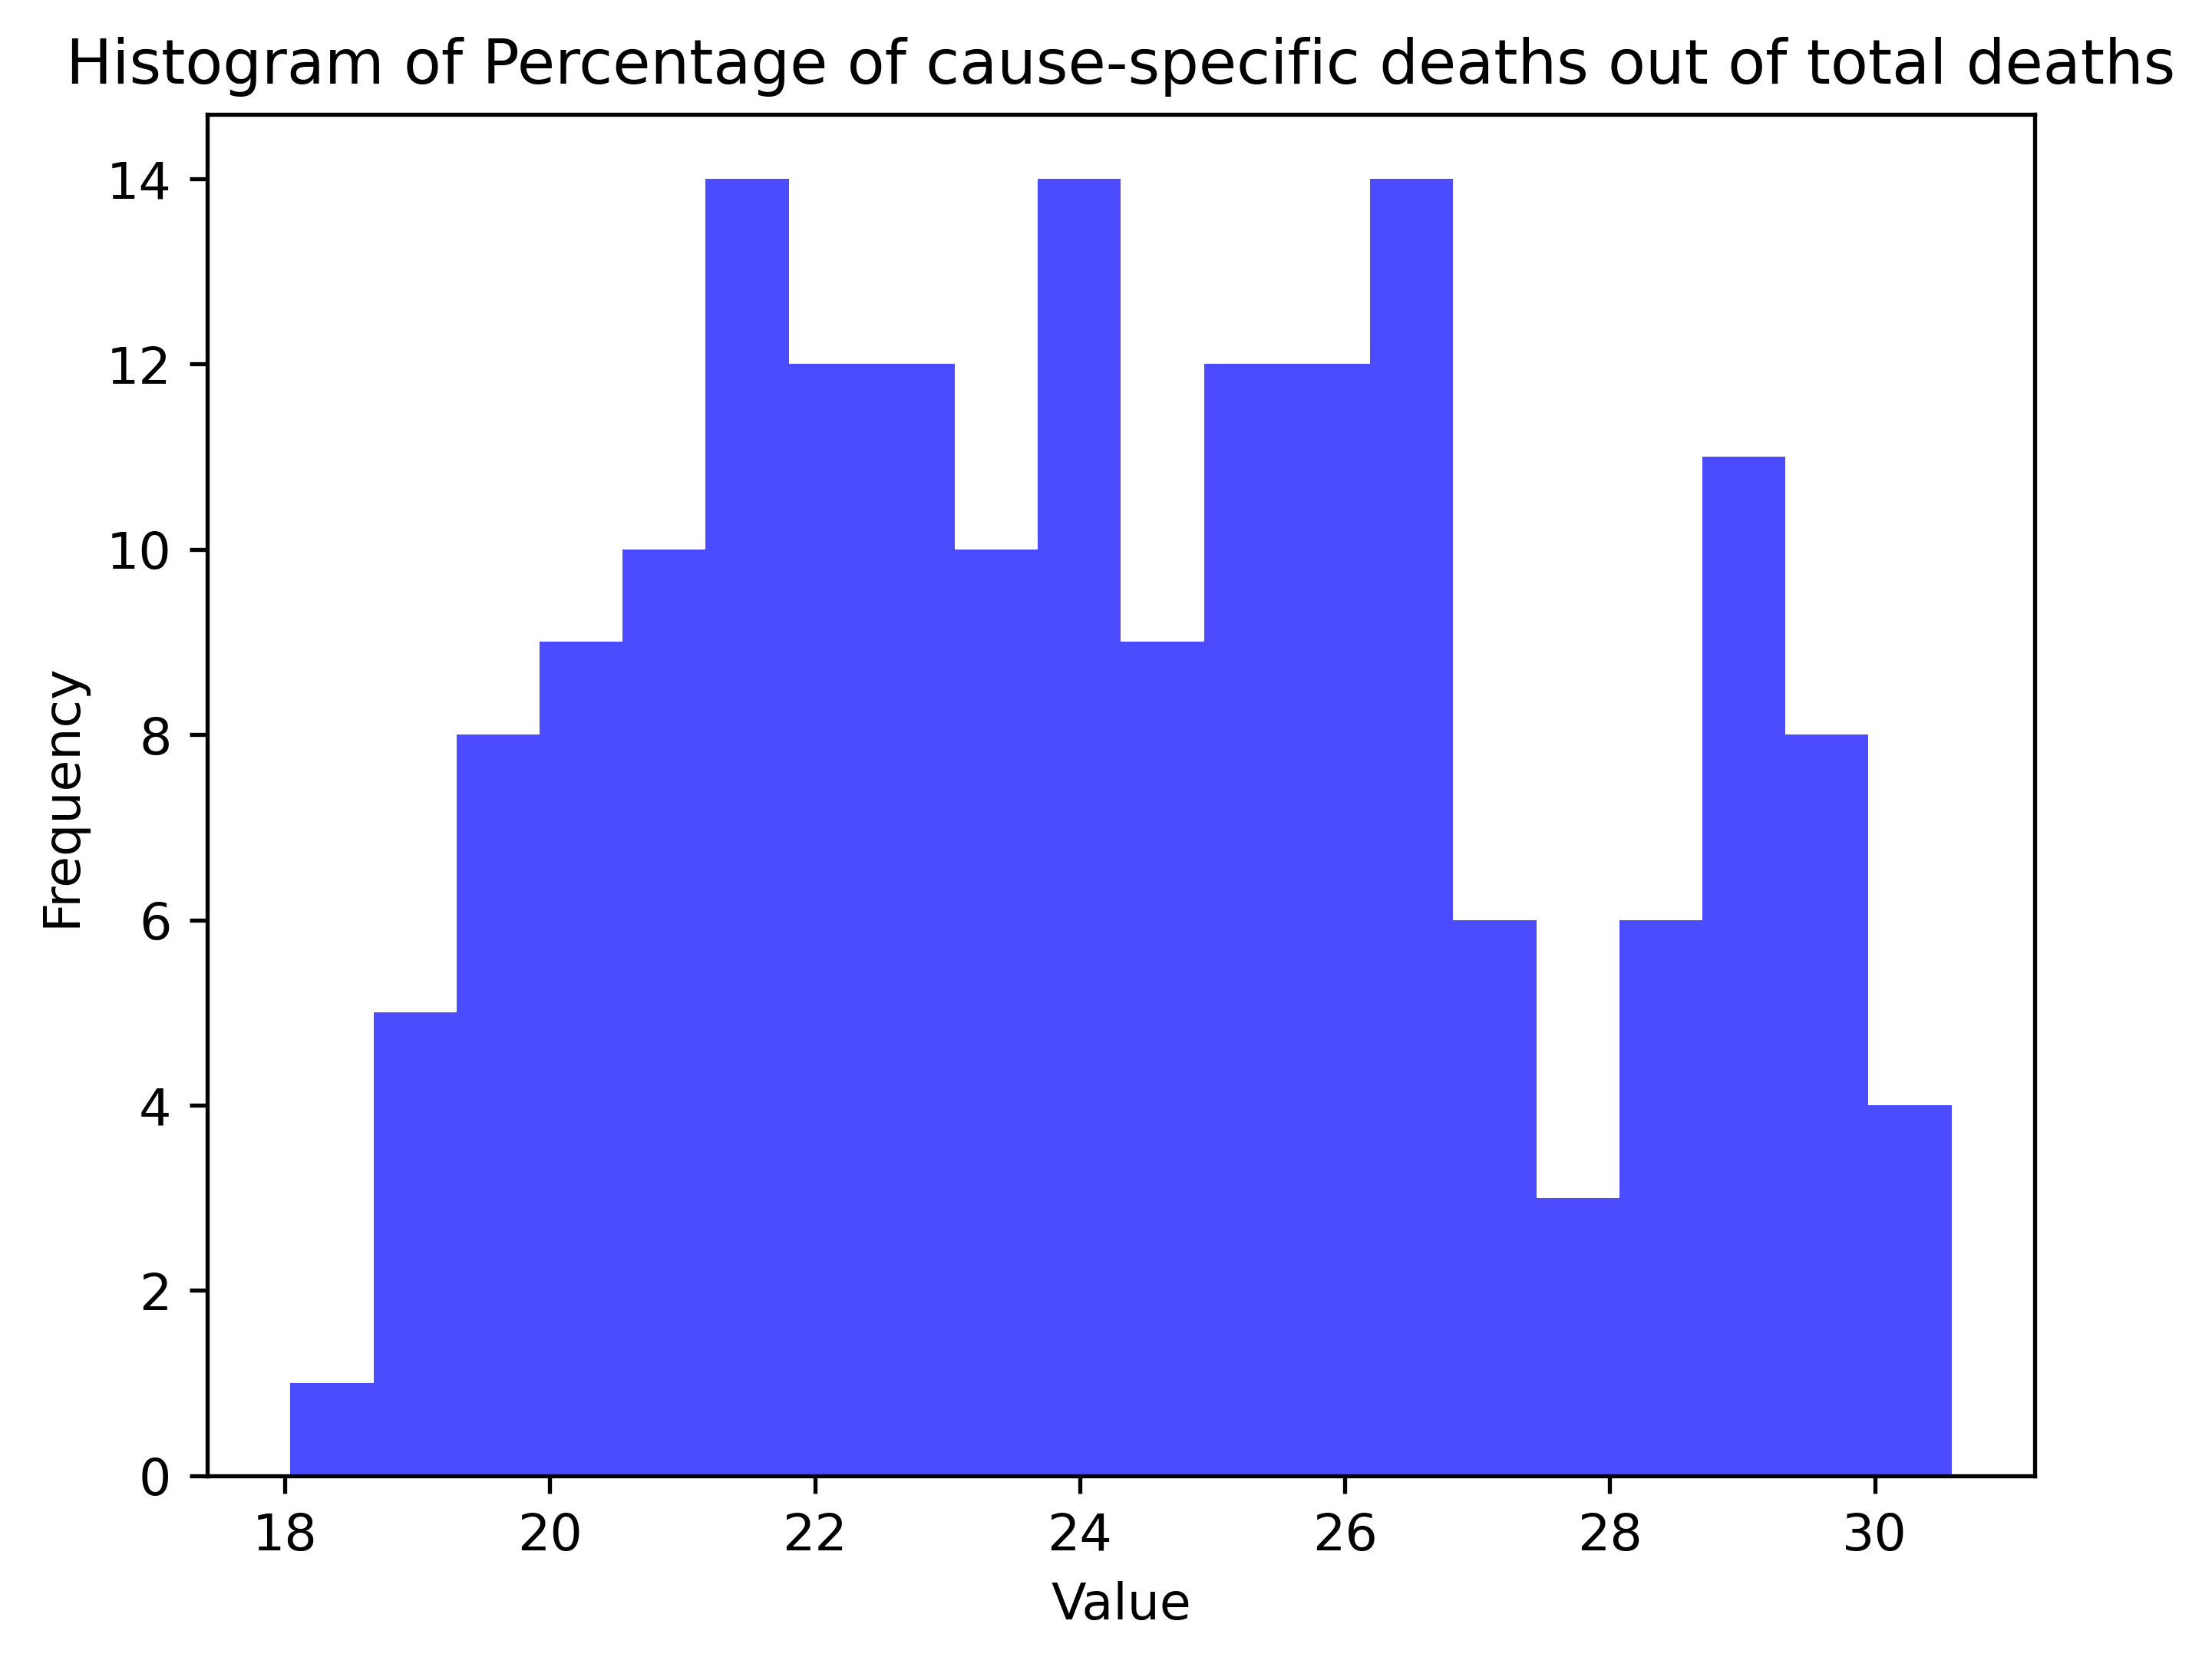

Mann-Whitney U-test for Men and Women on Percentage of cause-specific deaths out of total deaths:
Statistic: 3074.0
p-value: 2.32282245376132e-11
Conclusion: There is a significant difference between Men and Women.


In [30]:
test_distribution_and_compare_sexes(dfm, 'Percentage of cause-specific deaths out of total deaths', 'Sex', alpha=0.05)

Shapiro-Wilk test p-value for Death rate per 100 000 population: 1.4480040590569843e-05
Shapiro-Wilk test p-value for log-transformed Death rate per 100 000 population: 0.0003469482180662453
Log-transformed Death rate per 100 000 population is also not normally distributed.


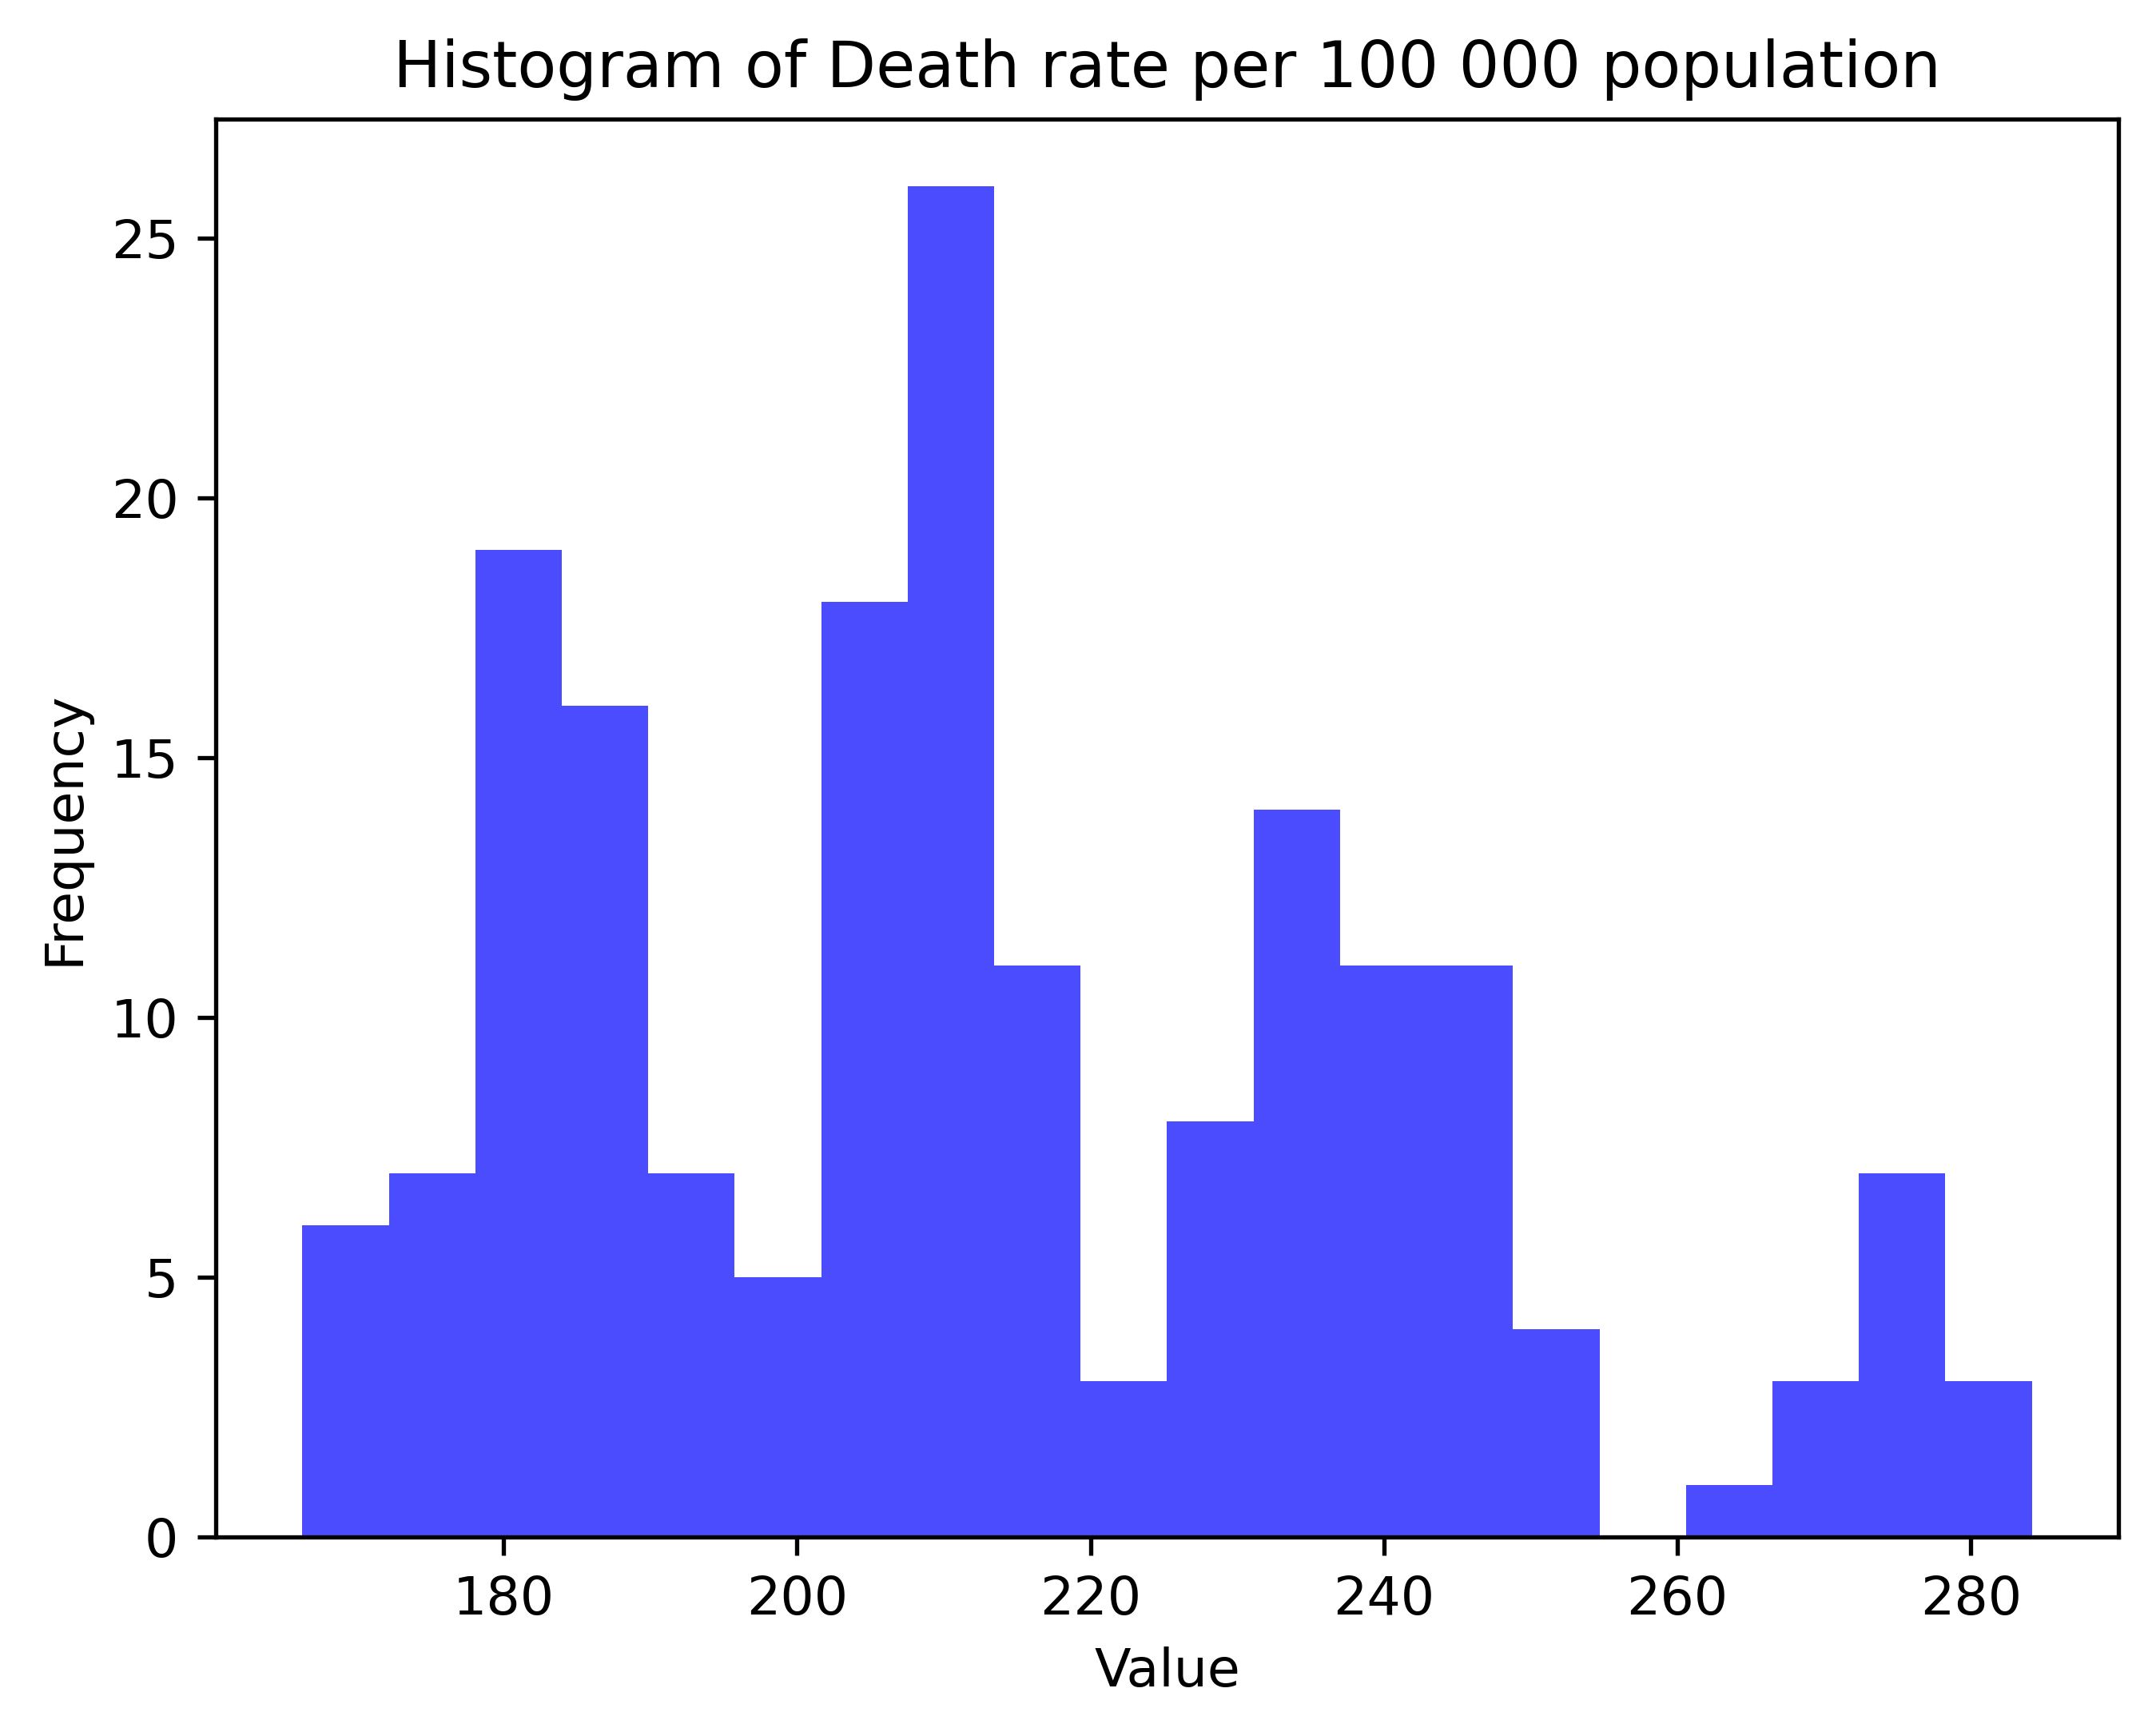

Mann-Whitney U-test for Men and Women on Death rate per 100 000 population:
Statistic: 3557.0
p-value: 2.9922994138284244e-20
Conclusion: There is a significant difference between Men and Women.


In [31]:
test_distribution_and_compare_sexes(dfm, 'Death rate per 100 000 population', 'Sex', alpha=0.05)

# Injuries

In [32]:
df3 = pd.read_excel('data/Injuries.xlsx')
df3 = df3[(df3['Year'] > 1959) & (df3['Year'] < 2020)]
df3 = df3.sort_values(by="Year", ascending=True)
df3.head(10)

,Region Code,Region Name,Country Code,Country Name,Year,Sex,Age group code,Age group,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population,_11
27,EU,Europe,CHE,Switzerland,1960,All,Age_all,[All],4277.0,8.210159,76.362150,80.275531,NaN
28,EU,Europe,CHE,Switzerland,1960,Male,Age_all,[All],2966.0,10.972181,113.171085,114.907795,NaN
29,EU,Europe,CHE,Switzerland,1960,Female,Age_all,[All],1311.0,5.231027,42.393929,47.730003,NaN
30,EU,Europe,CHE,Switzerland,1961,All,Age_all,[All],4525.0,8.871853,78.974963,83.265862,NaN
31,EU,Europe,CHE,Switzerland,1961,Male,Age_all,[All],3103.0,11.525462,115.966939,117.765380,NaN
32,EU,Europe,CHE,Switzerland,1961,Female,Age_all,[All],1422.0,5.905070,44.656823,50.794785,NaN
33,EU,Europe,CHE,Switzerland,1962,All,Age_all,[All],4722.0,8.565986,80.431469,84.717787,NaN
34,EU,Europe,CHE,Switzerland,1962,Male,Age_all,[All],3219.0,11.172816,117.500345,118.944685,NaN
35,EU,Europe,CHE,Switzerland,1962,Female,Age_all,[All],1503.0,5.711788,45.983133,52.414996,NaN
38,EU,Europe,CHE,Switzerland,1963,Female,Age_all,[All],1535.0,5.692776,45.792082,52.466076,NaN


In [33]:
#to see if there are any missing values and see what data types we have
print(df3.info())
#NA column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 27 to 196
Data columns (total 13 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Region Code                                                  180 non-null    object 
 1   Region Name                                                  180 non-null    object 
 2   Country Code                                                 180 non-null    object 
 3   Country Name                                                 180 non-null    object 
 4   Year                                                         180 non-null    int64  
 5   Sex                                                          180 non-null    object 
 6   Age group code                                               180 non-null    object 
 7   Age group                                                    180 non-null    ob

In [34]:
#to get rid of uneccessary stuff
columns_to_remove = ['Region Code', 'Region Name','Country Code','Age group code','Age group', '_11' ]
df3 = df3.drop(columns=columns_to_remove)
columns_to_remove1 = ['Year']
df3stat = df3.drop(columns=columns_to_remove1)
grouped_stats3 = df3stat.groupby('Sex').describe()
#grouped_stats3.to_excel('grouped_stats injuries.xlsx', sheet_name='Statistics')

Distributional analysis and tests to see if there are significant differences between of numeric variables for genders.

Shapiro-Wilk test p-value for Number: 6.321704937306549e-09
Shapiro-Wilk test p-value for log-transformed Number: 1.160292413260322e-07
Log-transformed Number is also not normally distributed.


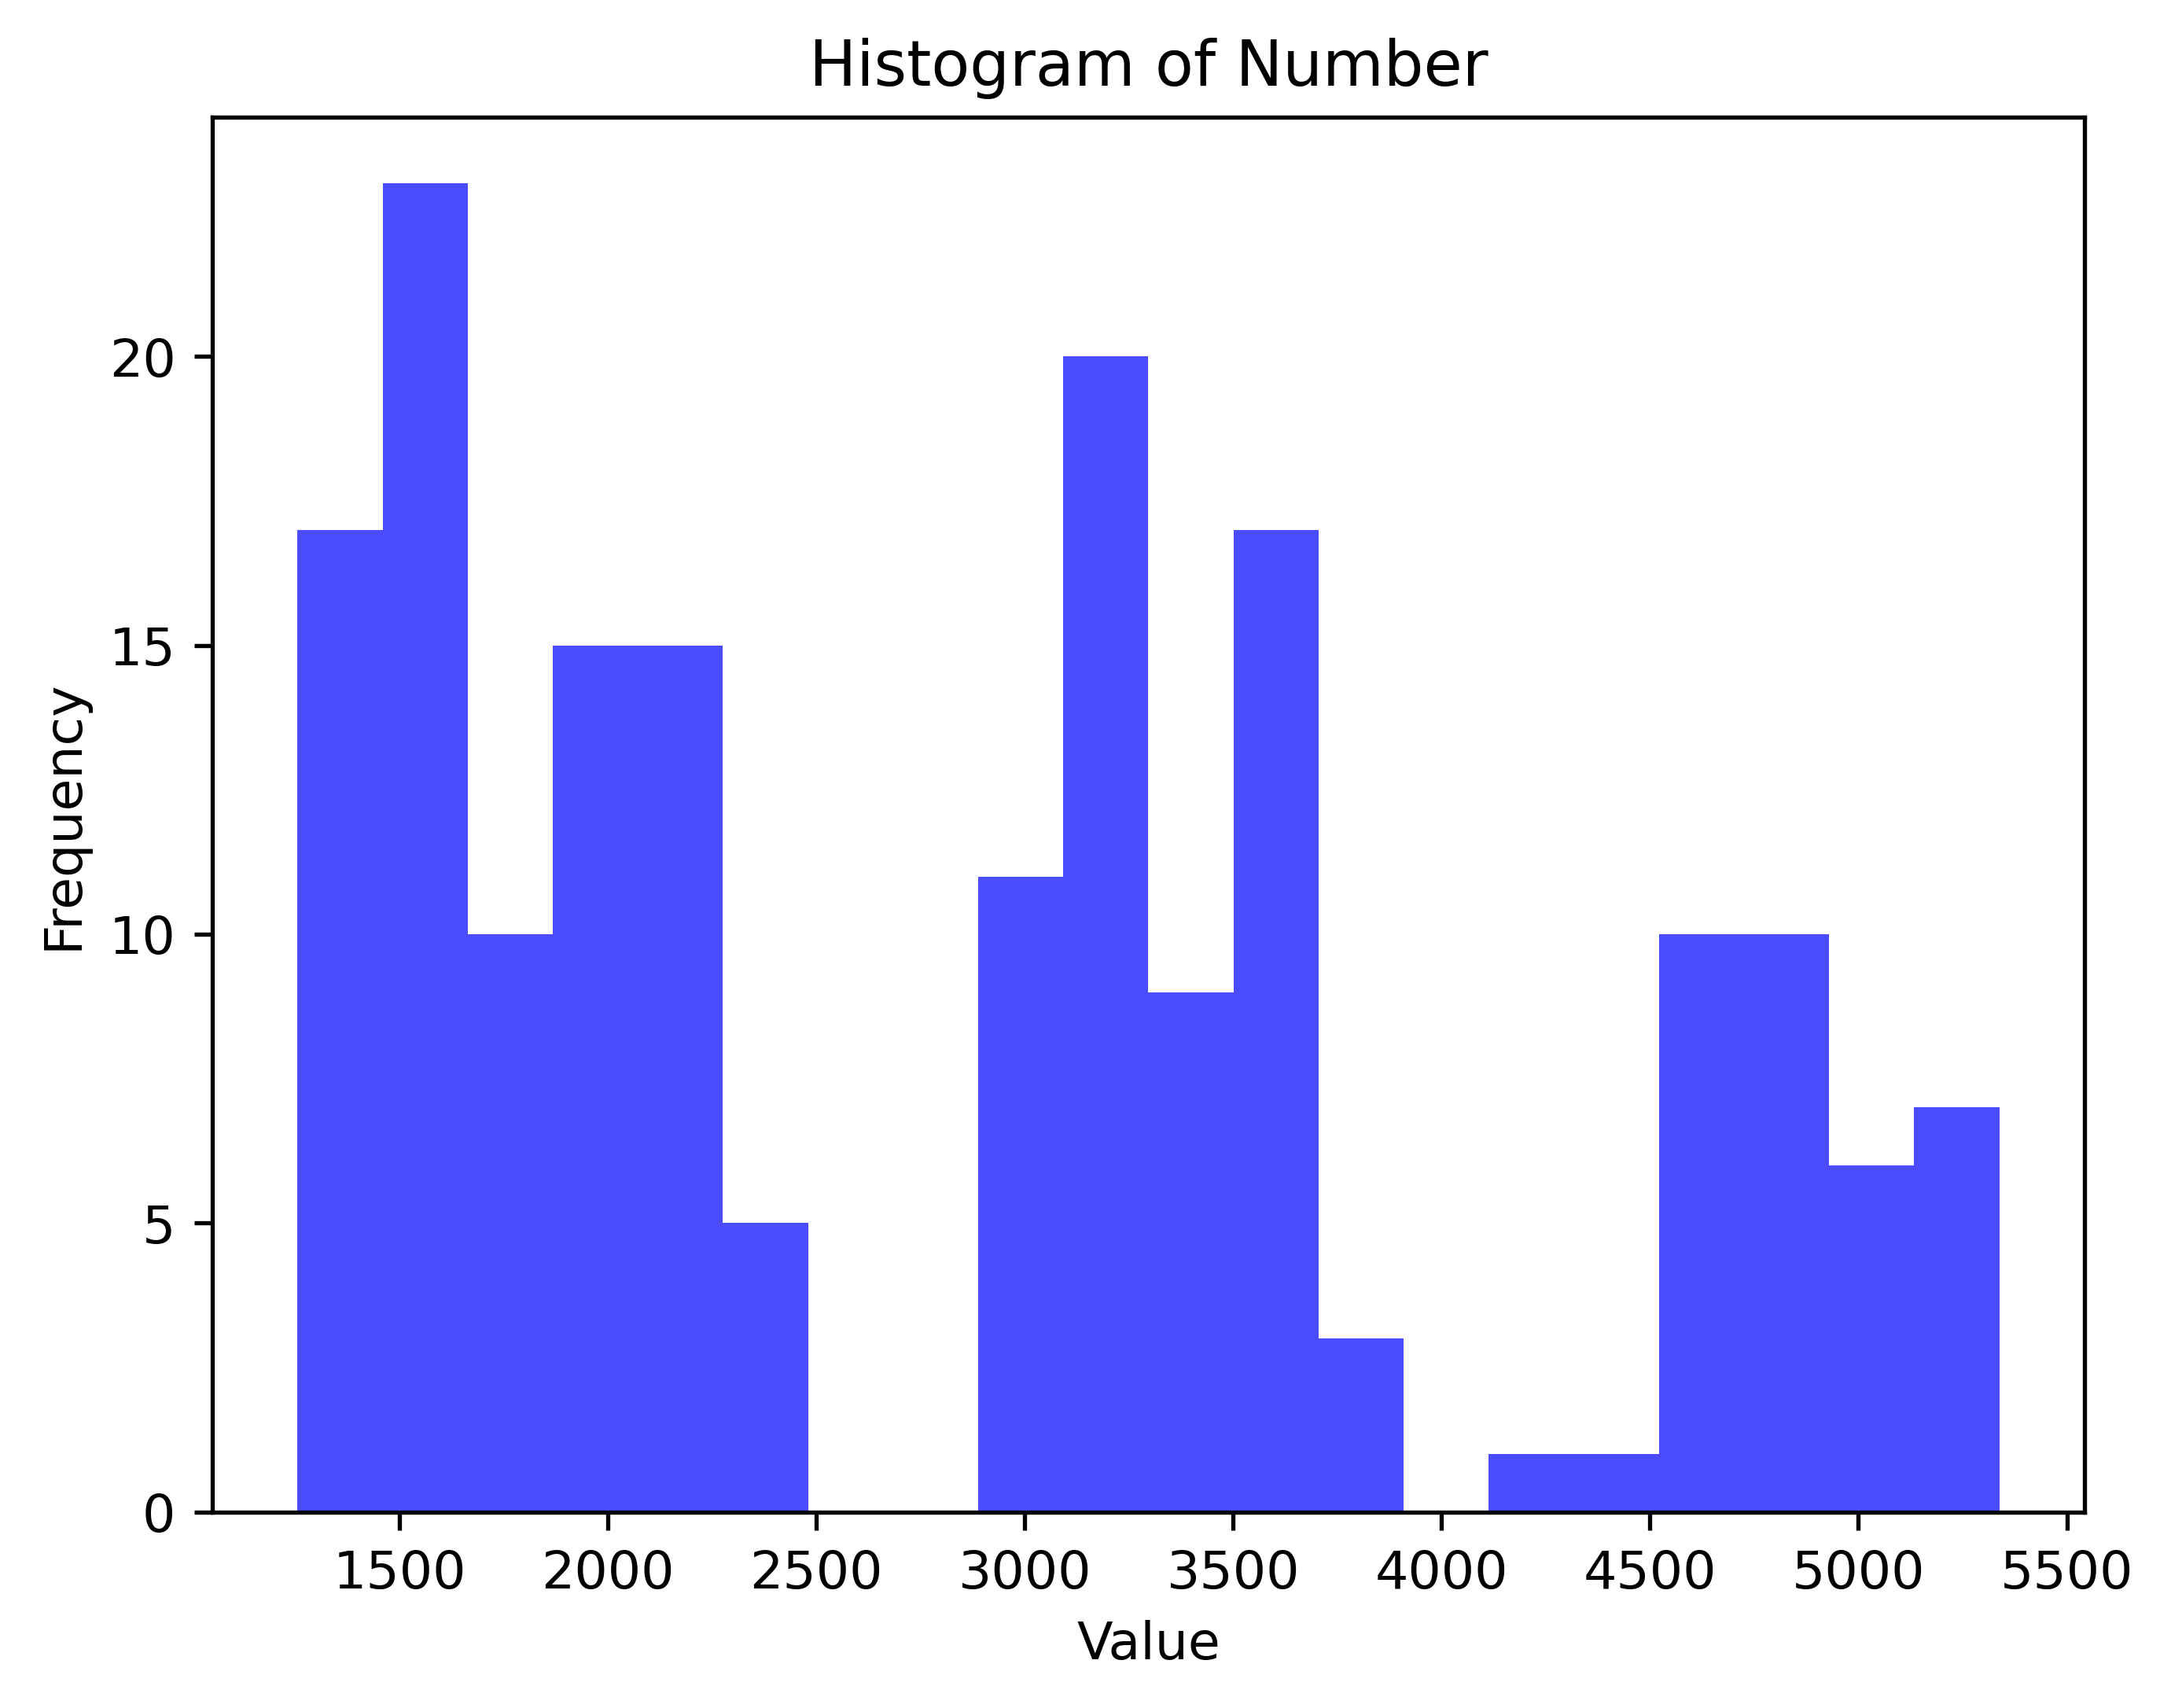

Mann-Whitney U-test for Men and Women on Number:
Statistic: 3592.0
p-value: 5.302821211046542e-21
Conclusion: There is a significant difference between Men and Women.


In [35]:
test_distribution_and_compare_sexes(df3, 'Number', 'Sex', alpha=0.05)

MultiModal distribution

Shapiro-Wilk test p-value for Percentage of cause-specific deaths out of total deaths: 9.148829121841118e-06
Shapiro-Wilk test p-value for log-transformed Percentage of cause-specific deaths out of total deaths: 0.0002910490147769451
Log-transformed Percentage of cause-specific deaths out of total deaths is also not normally distributed.


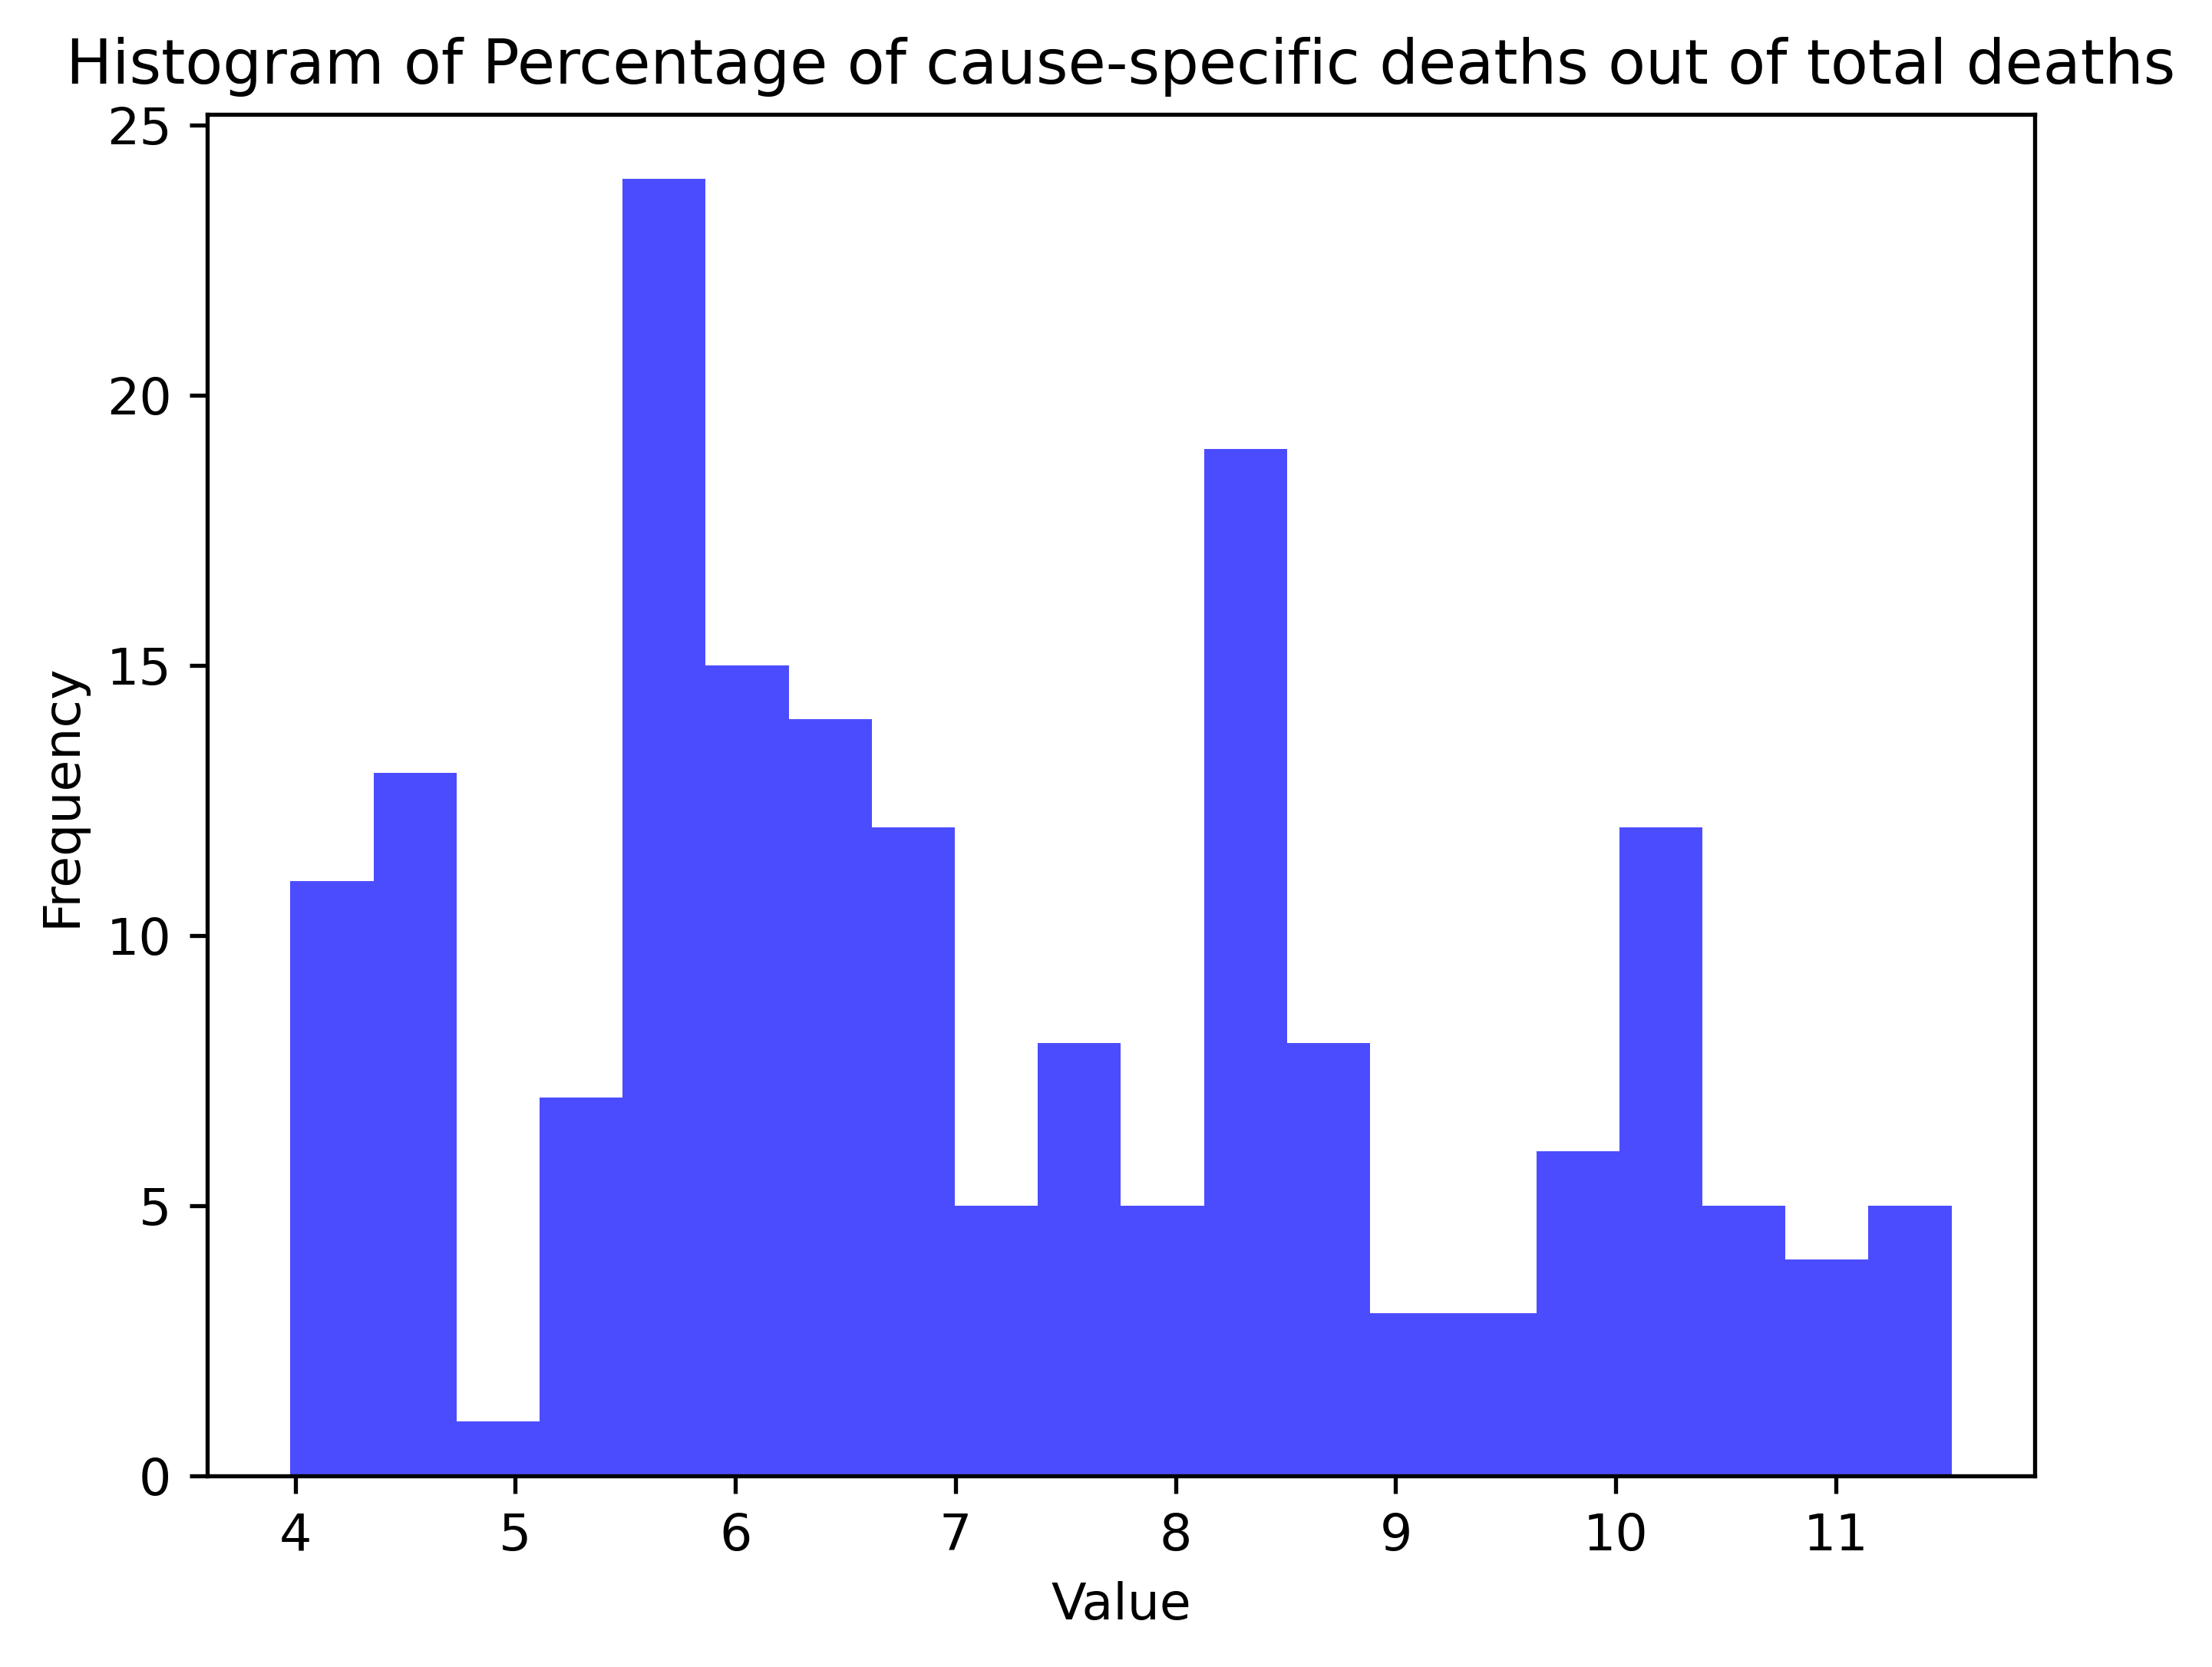

Mann-Whitney U-test for Men and Women on Percentage of cause-specific deaths out of total deaths:
Statistic: 3537.0
p-value: 7.92082238749499e-20
Conclusion: There is a significant difference between Men and Women.


In [36]:
test_distribution_and_compare_sexes(df3, 'Percentage of cause-specific deaths out of total deaths', 'Sex', alpha=0.05)

Shapiro-Wilk test p-value for Age-standardized death rate per 100 000 standard population: 8.786327043708297e-08
Shapiro-Wilk test p-value for log-transformed Age-standardized death rate per 100 000 standard population: 0.0005106668686494231
Log-transformed Age-standardized death rate per 100 000 standard population is also not normally distributed.


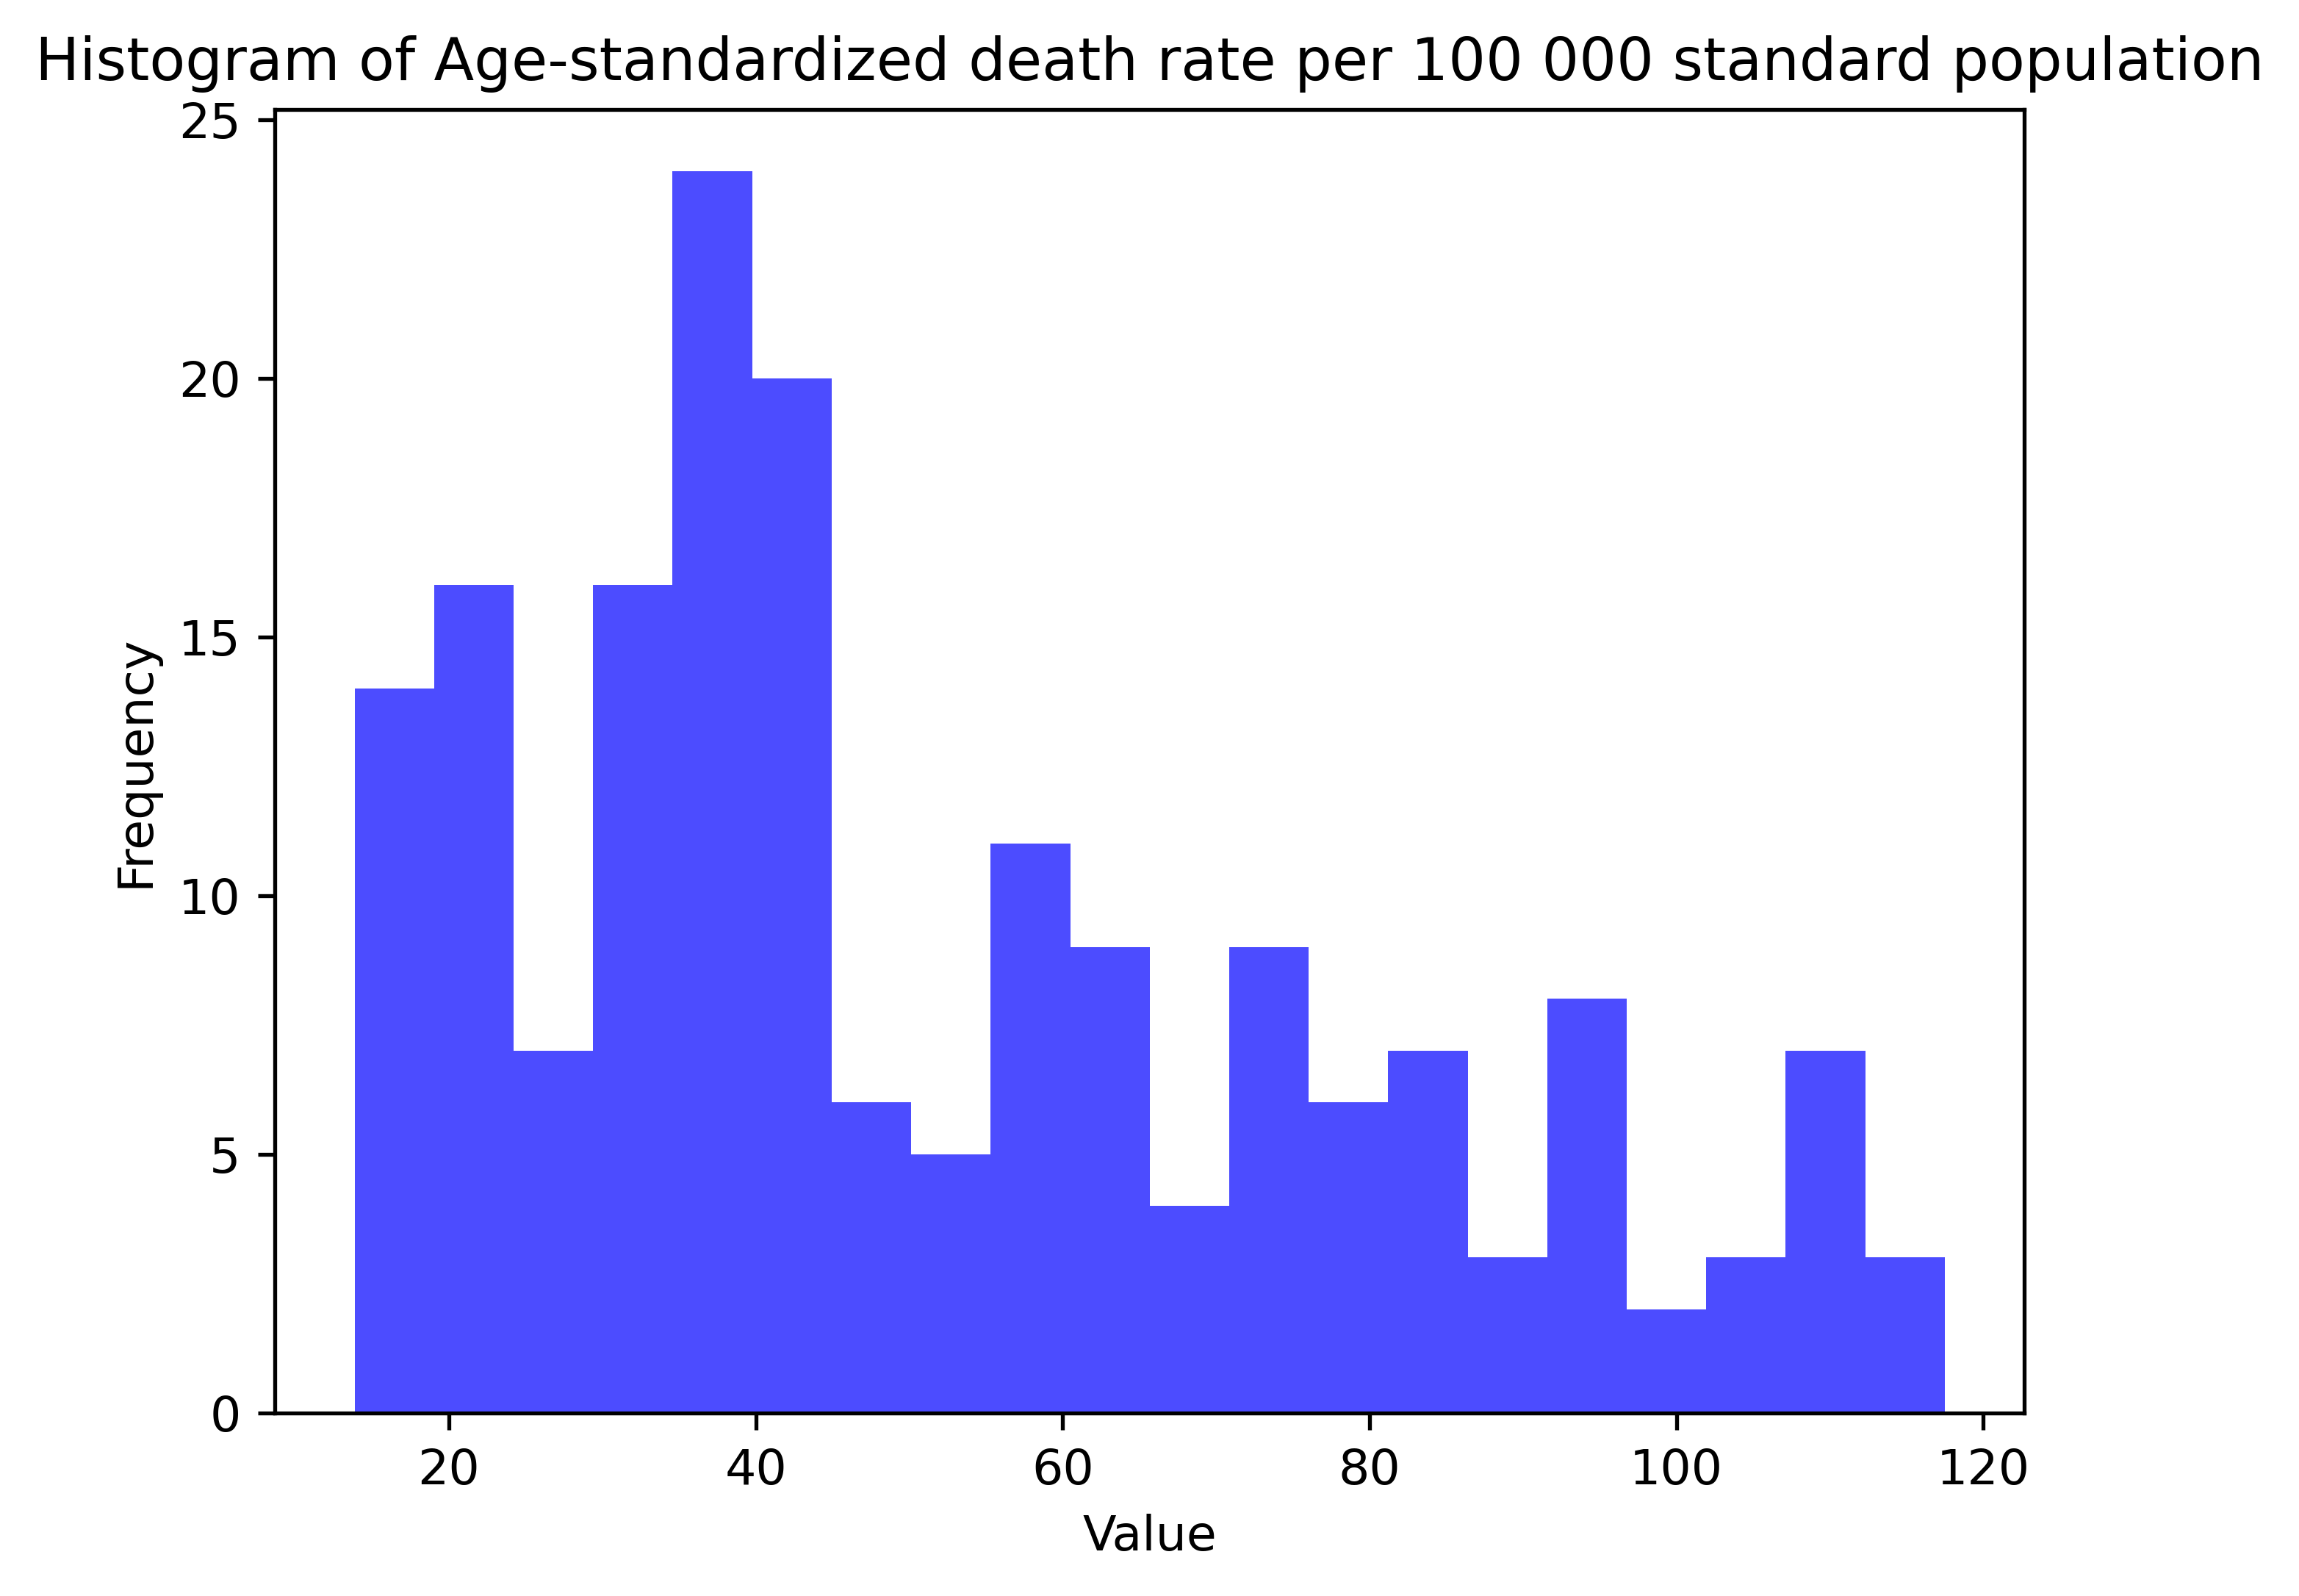

Mann-Whitney U-test for Men and Women on Age-standardized death rate per 100 000 standard population:
Statistic: 3254.0
p-value: 2.367716051244256e-14
Conclusion: There is a significant difference between Men and Women.


In [37]:
test_distribution_and_compare_sexes(df3, 'Age-standardized death rate per 100 000 standard population', 'Sex', alpha=0.05)

Shapiro-Wilk test p-value for Death rate per 100 000 population: 1.4435007855695403e-08
Shapiro-Wilk test p-value for log-transformed Death rate per 100 000 population: 1.160285682999529e-05
Log-transformed Death rate per 100 000 population is also not normally distributed.


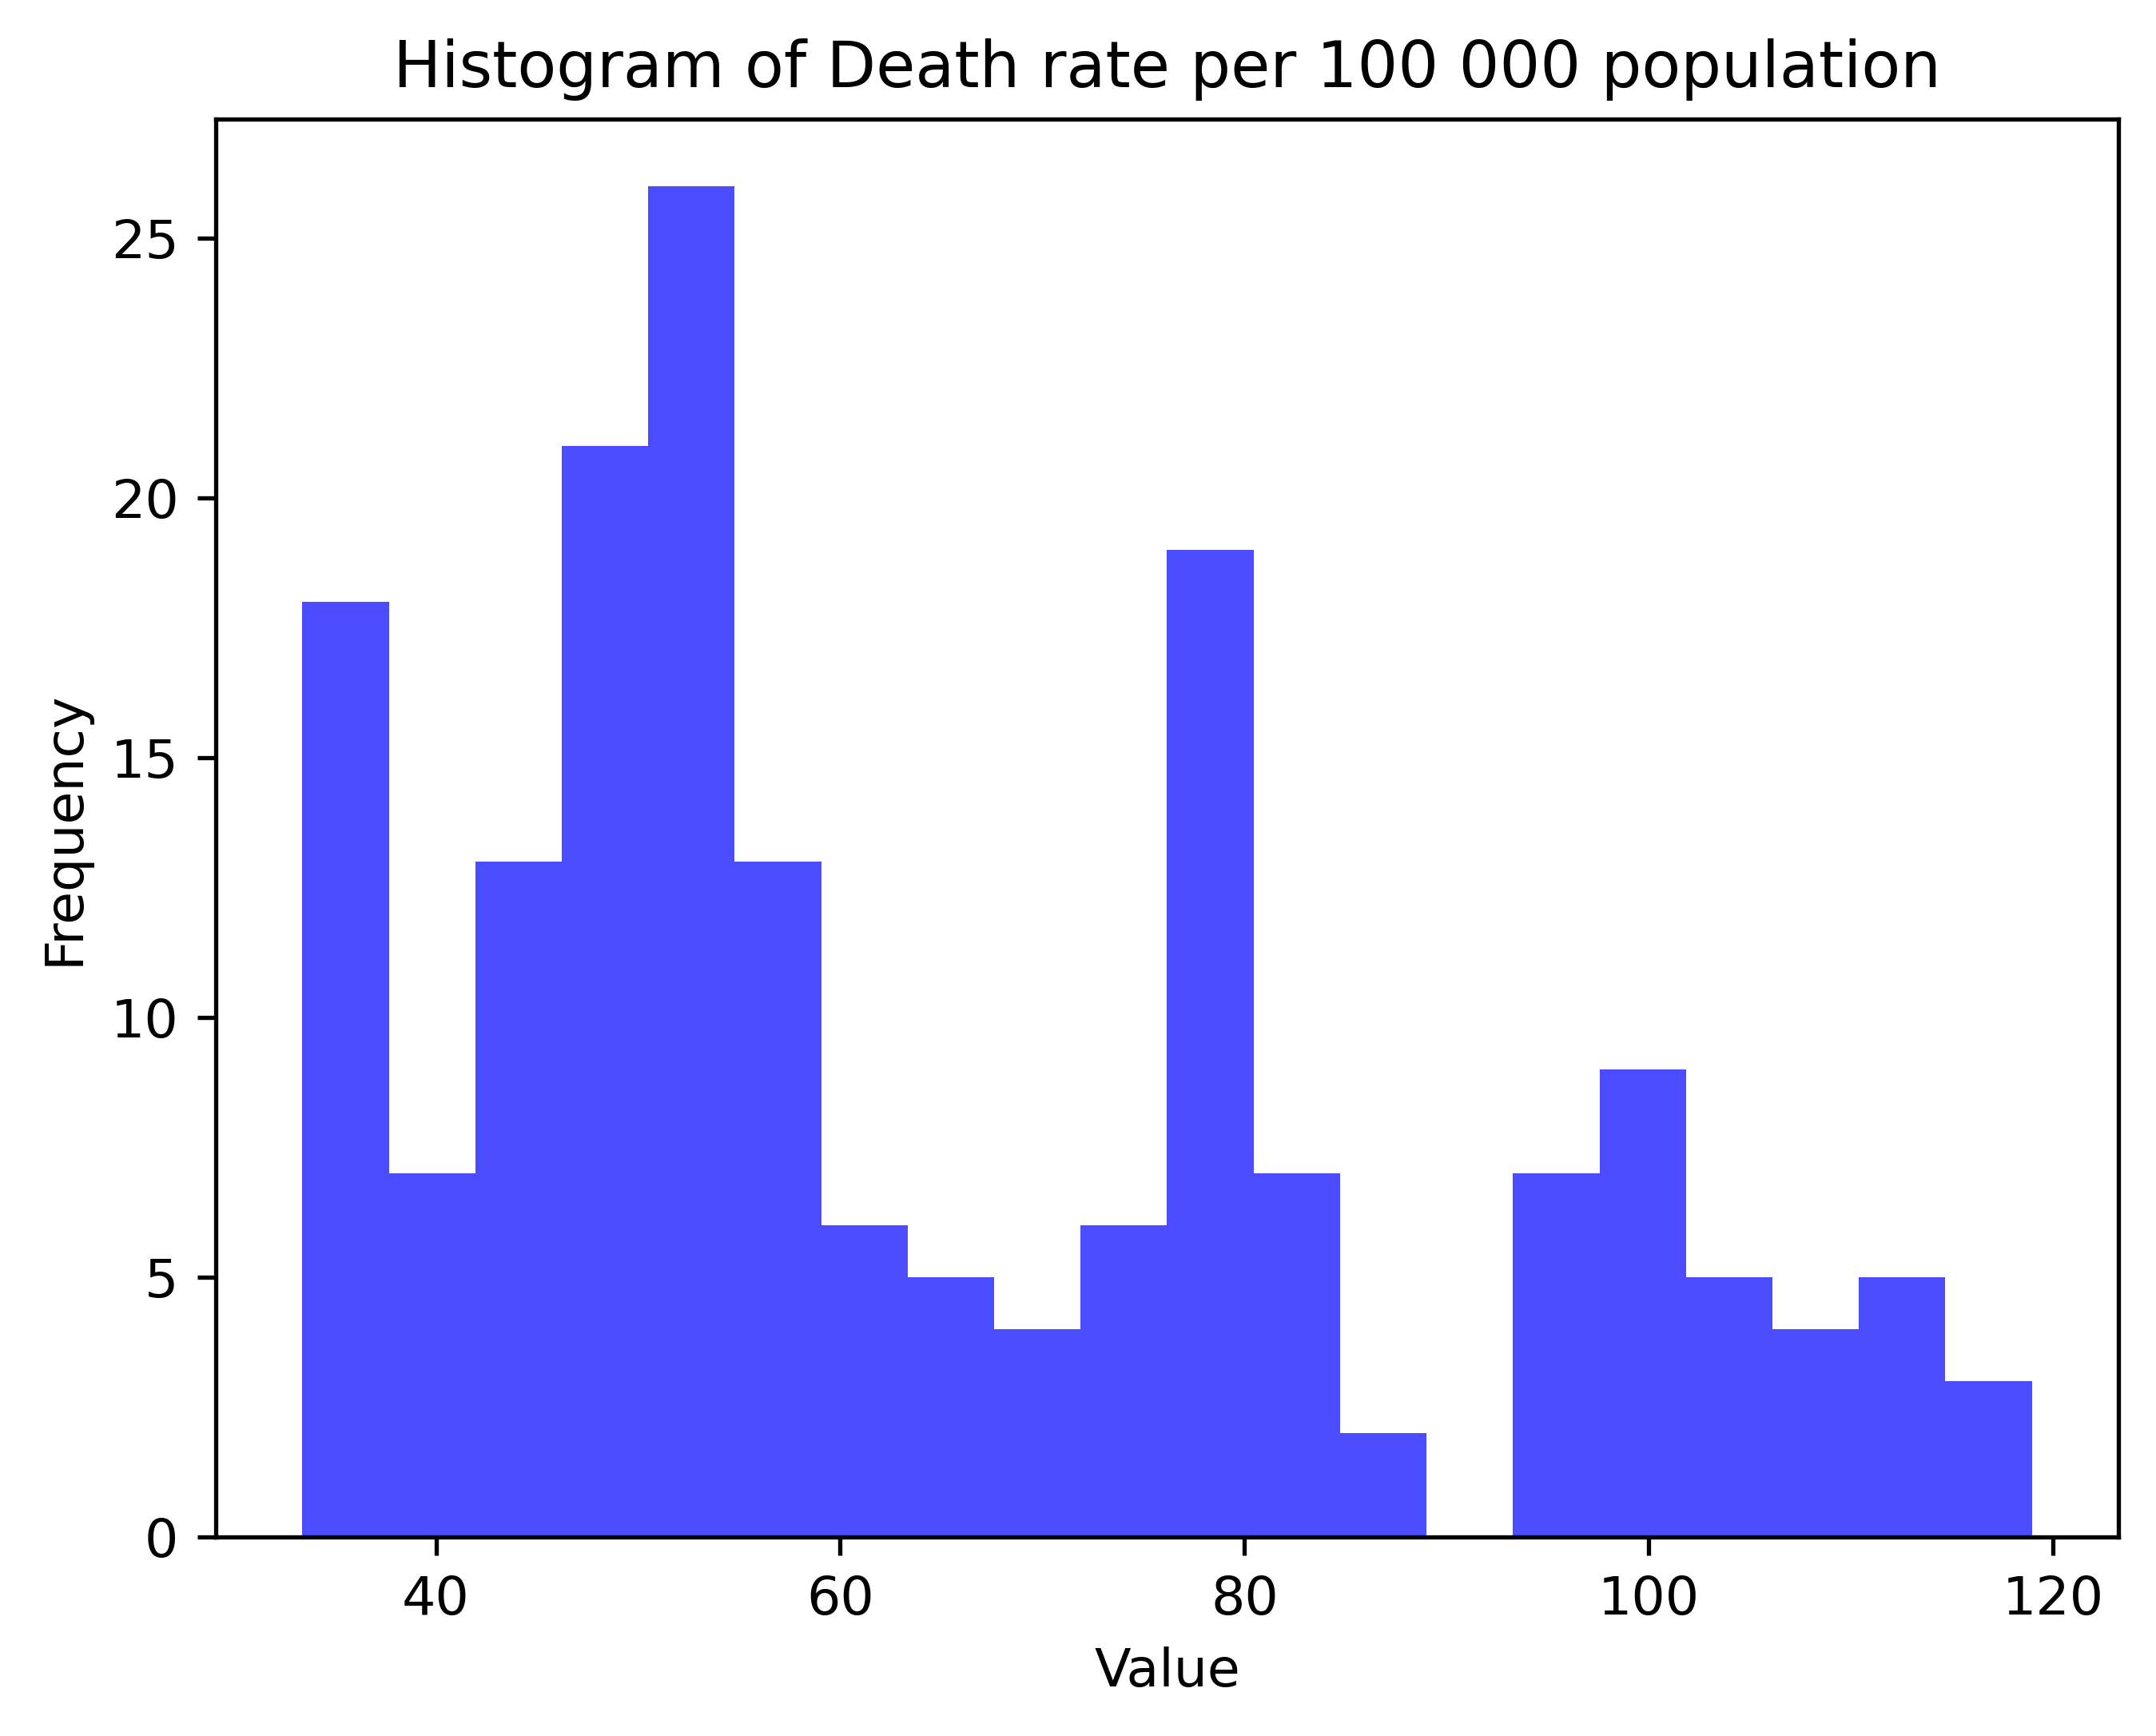

Mann-Whitney U-test for Men and Women on Death rate per 100 000 population:
Statistic: 3324.0
p-value: 1.2821248746109598e-15
Conclusion: There is a significant difference between Men and Women.


In [38]:
test_distribution_and_compare_sexes(df3, 'Death rate per 100 000 population', 'Sex', alpha=0.05)

# Ill-defined diseases

In [39]:
df4 = pd.read_excel('data/ill-defined diseases.xlsx')
df4 = df4[(df['Year'] > 1959) & (df4['Year'] < 2020)]
df4 = df4.sort_values(by="Year", ascending=True)
df4.head(10)

,Region Code,Region Name,Country Code,Country Name,Year,Sex,Age group code,Age group,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population
27,EU,Europe,CHE,Switzerland,1960,All,Age_all,[All],784.0,1.504972,14.961876,14.714991
28,EU,Europe,CHE,Switzerland,1960,Male,Age_all,[All],363.0,1.342853,16.549742,14.063226
29,EU,Europe,CHE,Switzerland,1960,Female,Age_all,[All],421.0,1.679834,13.742478,15.327484
30,EU,Europe,CHE,Switzerland,1961,All,Age_all,[All],818.0,1.603796,15.028508,15.052260
31,EU,Europe,CHE,Switzerland,1961,Male,Age_all,[All],385.0,1.430004,17.331216,14.611560
32,EU,Europe,CHE,Switzerland,1961,Female,Age_all,[All],433.0,1.798098,13.309449,15.467048
33,EU,Europe,CHE,Switzerland,1962,All,Age_all,[All],961.0,1.743311,17.013480,17.241379
34,EU,Europe,CHE,Switzerland,1962,Male,Age_all,[All],428.0,1.485544,18.309833,15.814950
35,EU,Europe,CHE,Switzerland,1962,Female,Age_all,[All],533.0,2.025538,15.785377,18.587620
38,EU,Europe,CHE,Switzerland,1963,Female,Age_all,[All],469.0,1.739356,13.374364,16.030352


In [40]:
#to see if there are any missing values and see what data types we have
print(df4.info())
#NA column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 27 to 196
Data columns (total 12 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Region Code                                                  180 non-null    object 
 1   Region Name                                                  180 non-null    object 
 2   Country Code                                                 180 non-null    object 
 3   Country Name                                                 180 non-null    object 
 4   Year                                                         180 non-null    int64  
 5   Sex                                                          180 non-null    object 
 6   Age group code                                               180 non-null    object 
 7   Age group                                                    180 non-null    ob

In [41]:
#to get rid of uneccessary stuff
columns_to_remove = ['Region Code', 'Region Name','Country Code','Age group code','Age group']
df4 = df4.drop(columns=columns_to_remove)
columns_to_remove1 = ['Year']
df4stat = df4.drop(columns=columns_to_remove1)
grouped_stats4 = df4stat.groupby('Sex').describe()
# grouped_stats4.to_excel('grouped_stats Ill-defined.xlsx', sheet_name='Statistics')

Distributional analysis and tests to see if there are significant differences between of numeric variables for genders.

Shapiro-Wilk test p-value for Number: 2.2280721104911416e-12
Shapiro-Wilk test p-value for log-transformed Number: 0.0005558307748287916
Log-transformed Number is also not normally distributed.


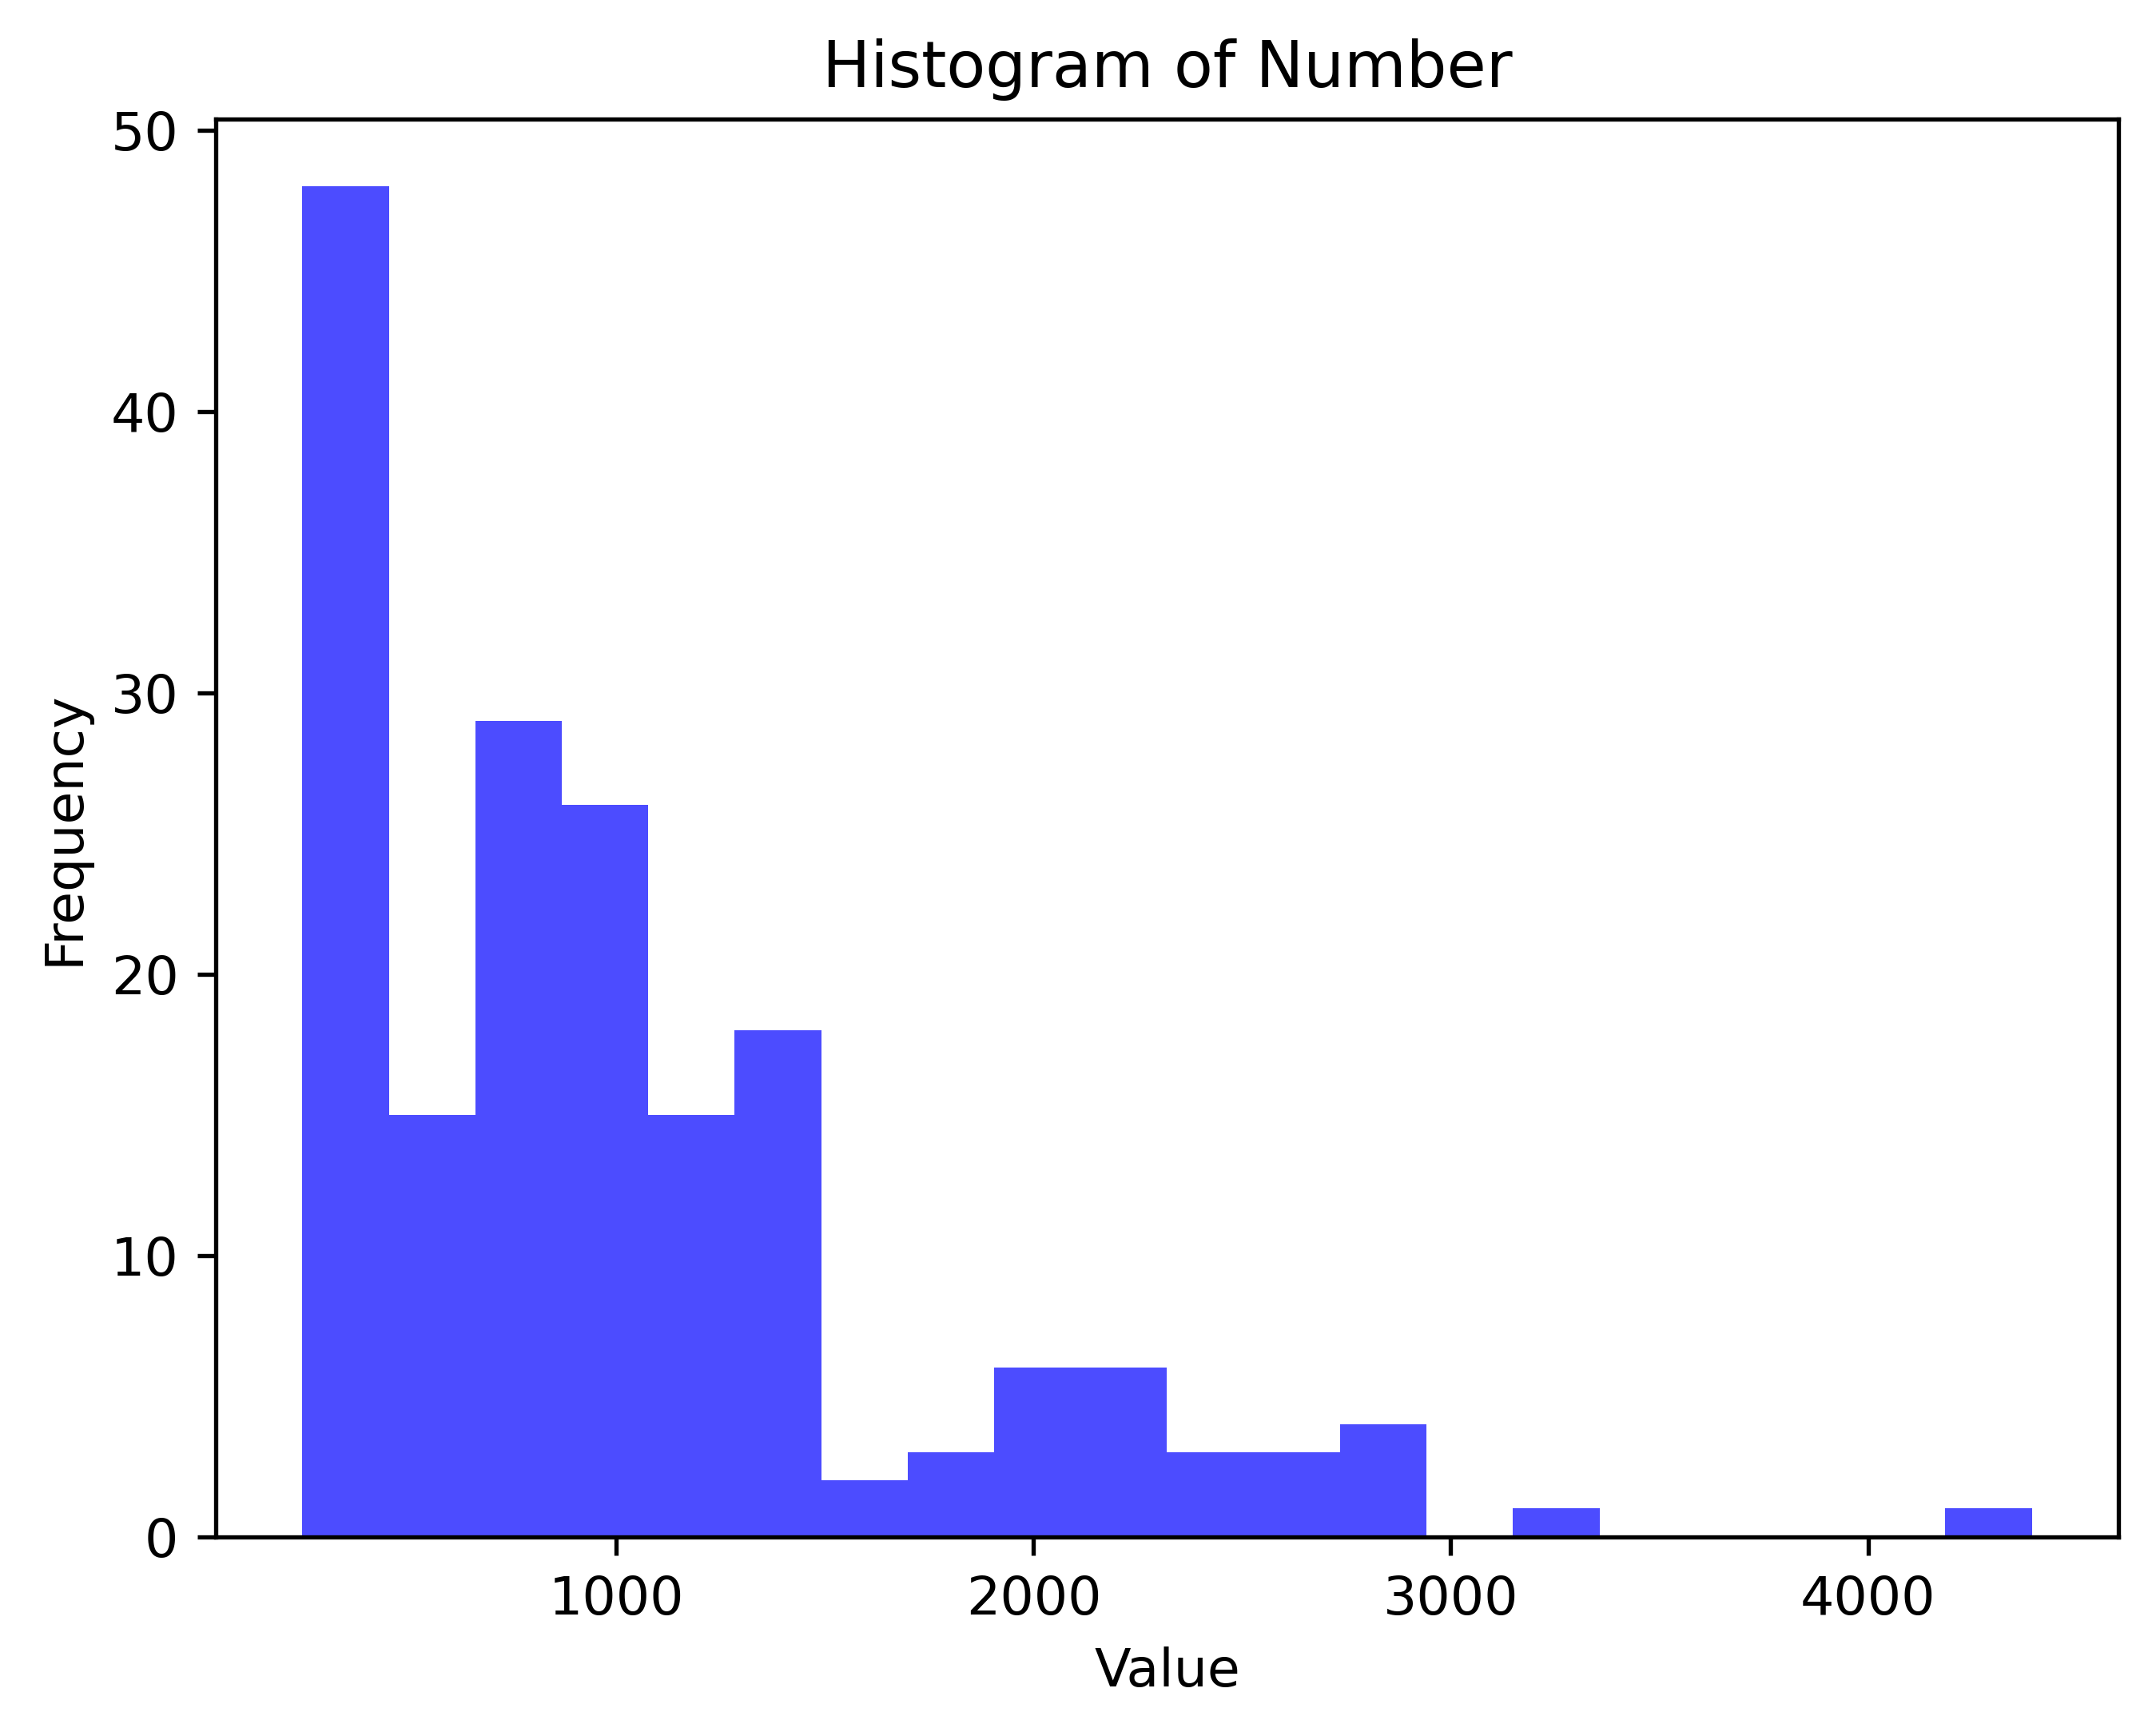

Mann-Whitney U-test for Men and Women on Number:
Statistic: 1689.5
p-value: 0.563694737125233
Conclusion: There is no significant difference between Men and Women.


In [42]:
test_distribution_and_compare_sexes(df4, 'Number', 'Sex', alpha=0.05)

Shapiro-Wilk test p-value for Percentage of cause-specific deaths out of total deaths: 8.908093707127307e-10
Shapiro-Wilk test p-value for log-transformed Percentage of cause-specific deaths out of total deaths: 7.416775247293117e-07
Log-transformed Percentage of cause-specific deaths out of total deaths is also not normally distributed.


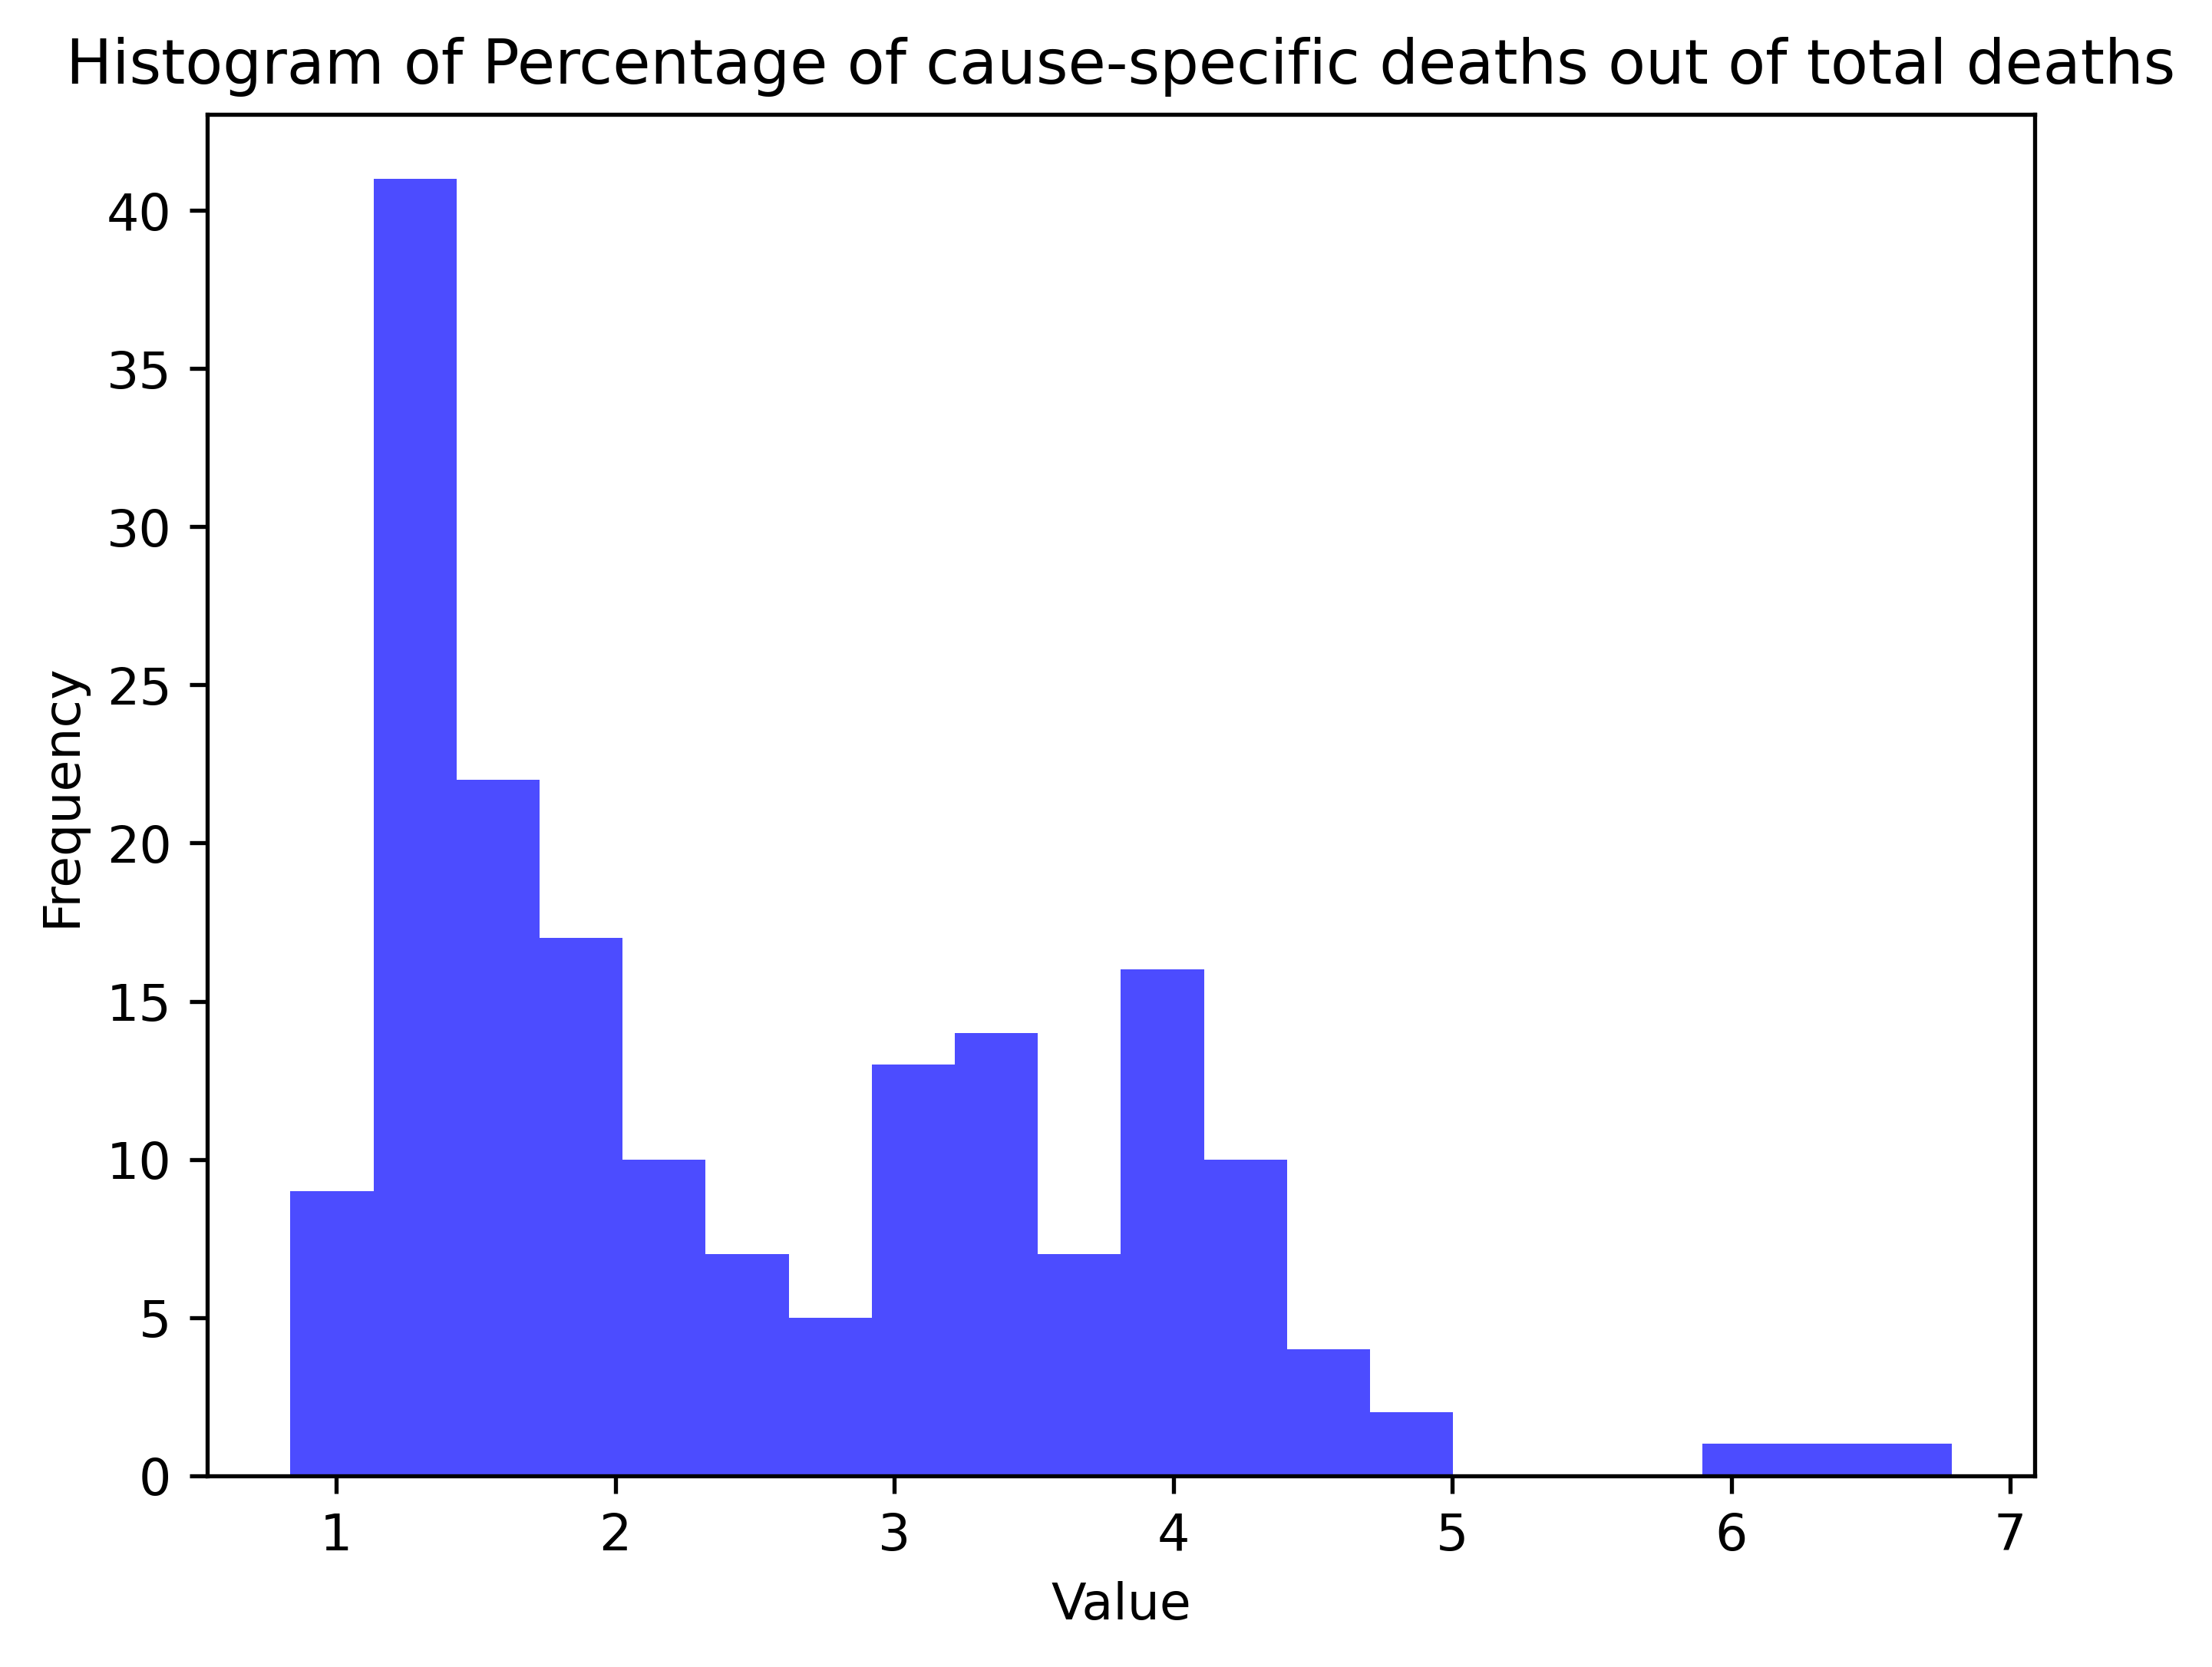

Mann-Whitney U-test for Men and Women on Percentage of cause-specific deaths out of total deaths:
Statistic: 1647.0
p-value: 0.42346899223630996
Conclusion: There is no significant difference between Men and Women.


In [43]:
test_distribution_and_compare_sexes(df4, 'Percentage of cause-specific deaths out of total deaths', 'Sex', alpha=0.05)

Shapiro-Wilk test p-value for Age-standardized death rate per 100 000 standard population: 0.000445022014901042
Shapiro-Wilk test p-value for log-transformed Age-standardized death rate per 100 000 standard population: 0.5974940657615662
Log-transformed Age-standardized death rate per 100 000 standard population is approximately normally distributed.


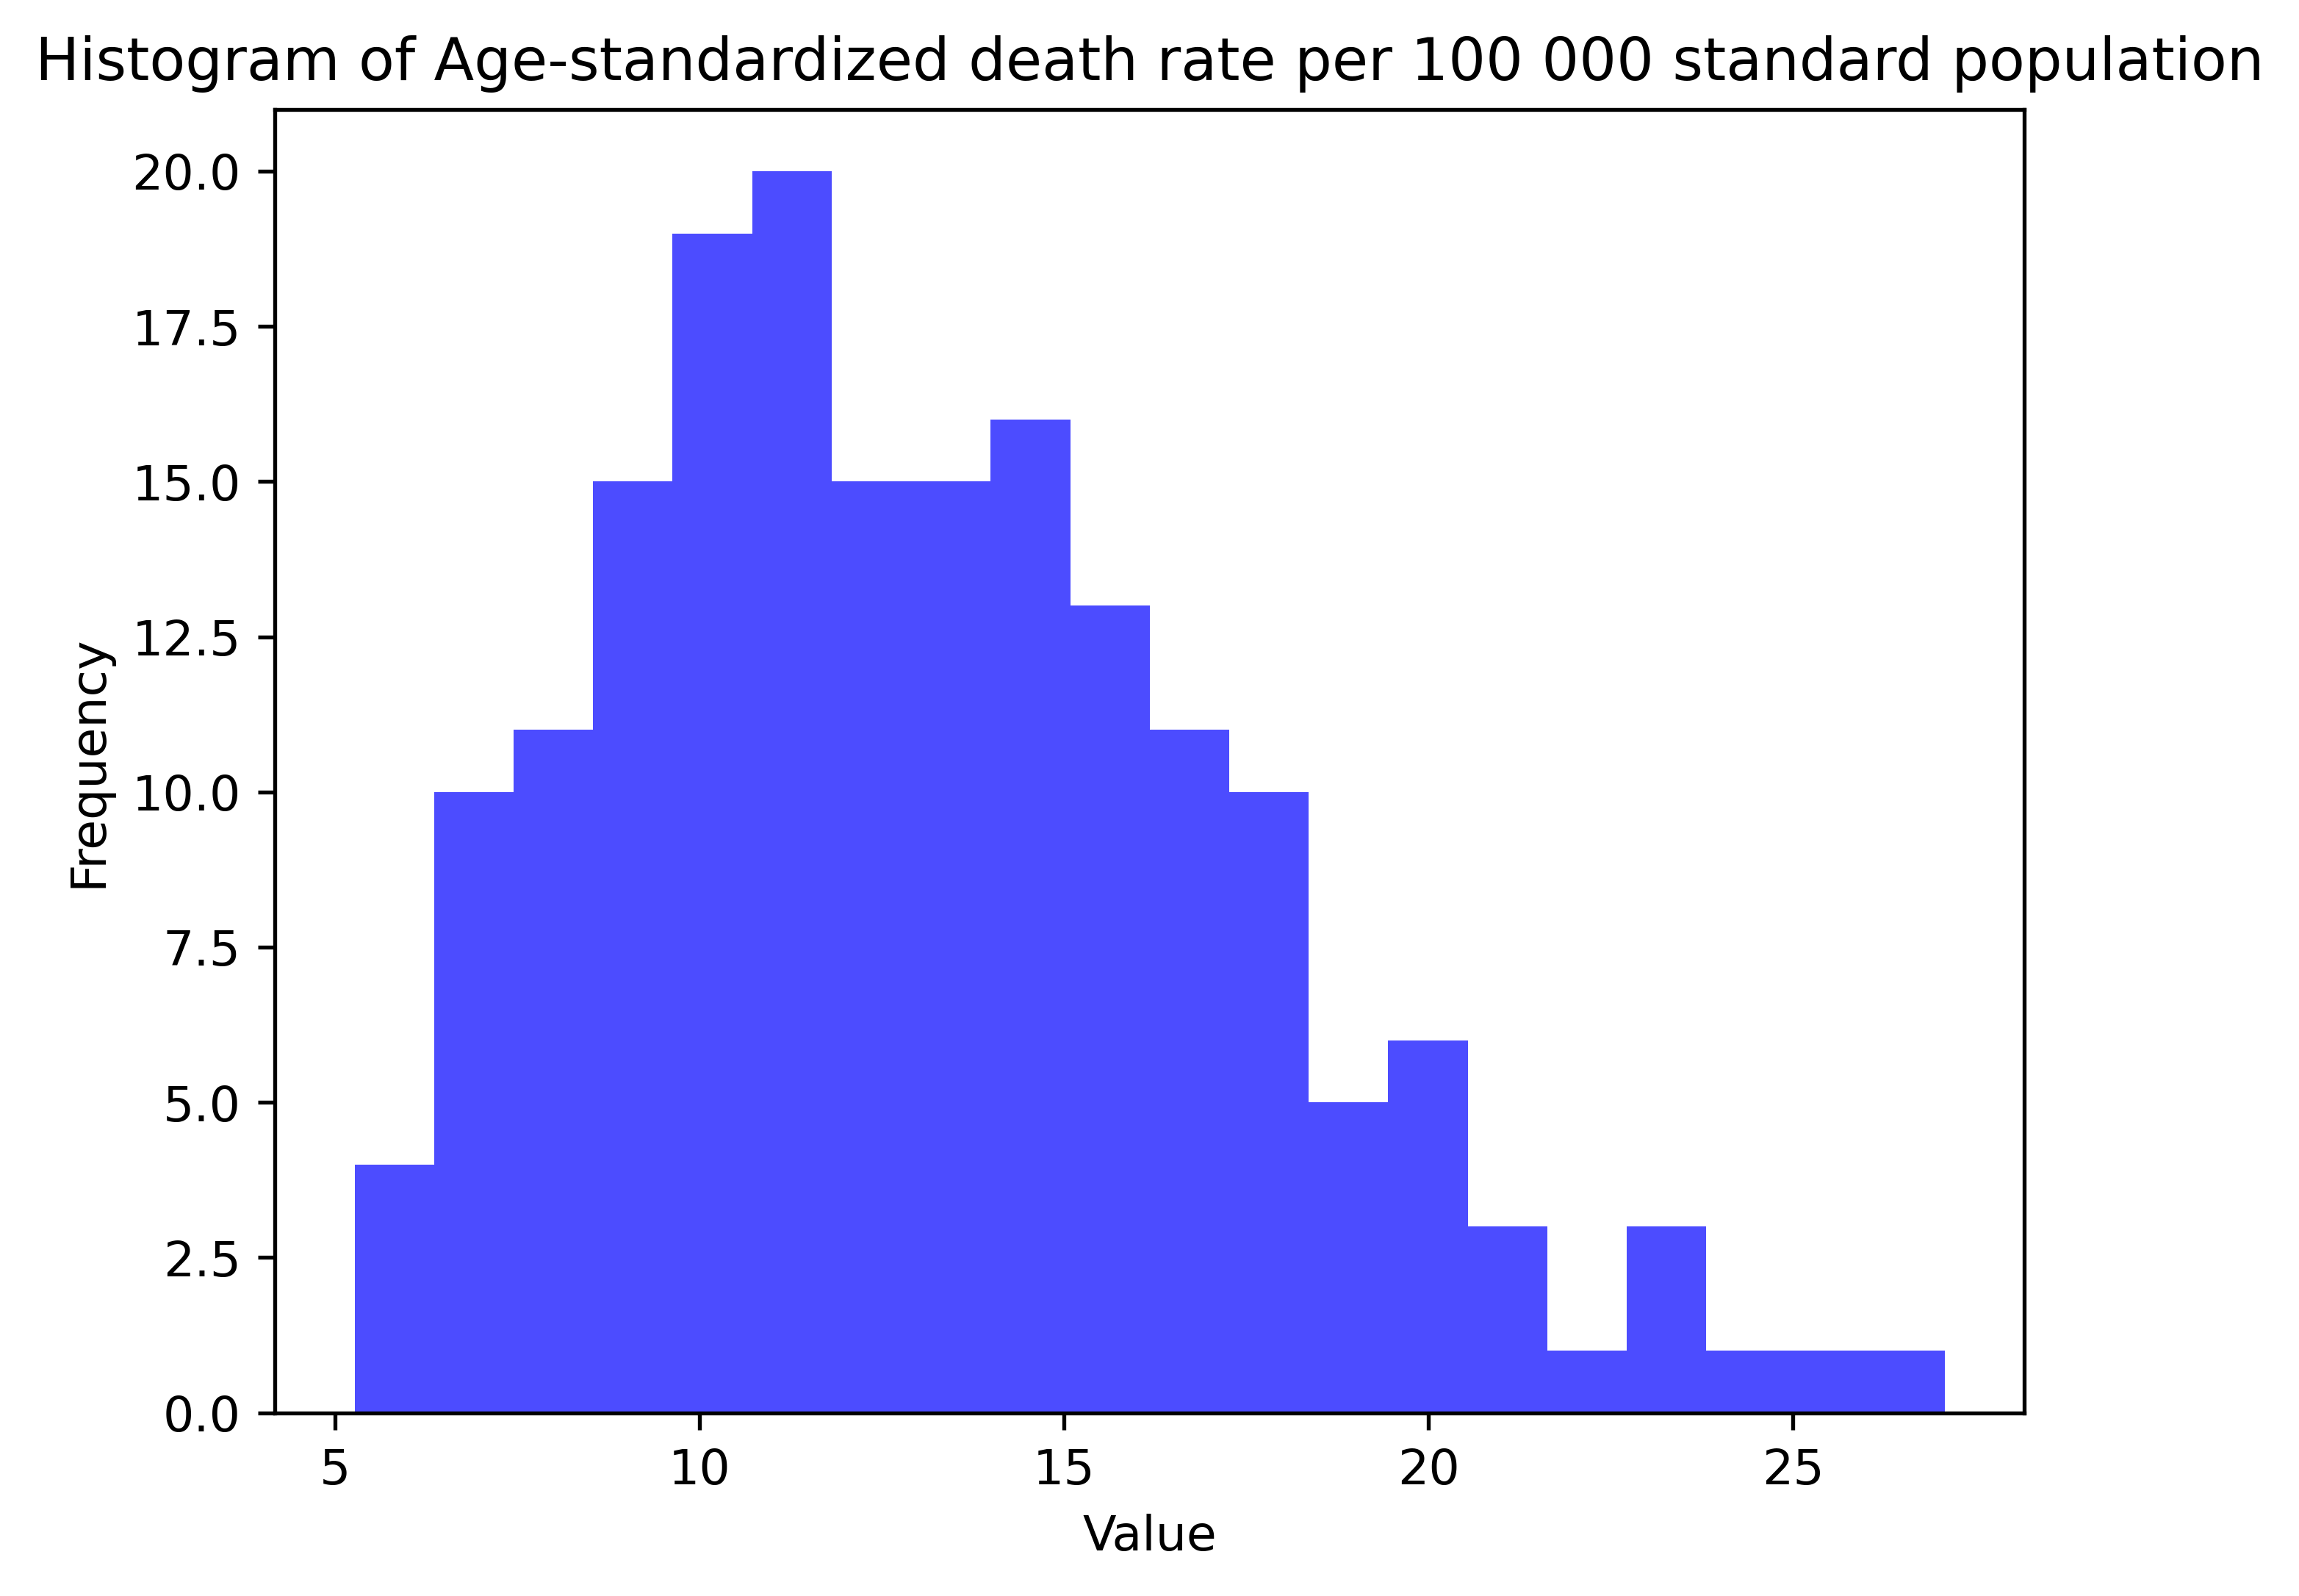

T-test for Men and Women on log-transformed data:
T-statistic: 9.336190737792283
p-value: 7.467969868637632e-16
Conclusion: There is a significant difference between Men and Women on log-transformed data.


In [44]:
test_distribution_and_compare_sexes(df4, 'Age-standardized death rate per 100 000 standard population', 'Sex', alpha=0.05)


Shapiro-Wilk test p-value for Death rate per 100 000 population: 1.6049080286961726e-08
Shapiro-Wilk test p-value for log-transformed Death rate per 100 000 population: 5.174365014681825e-06
Log-transformed Death rate per 100 000 population is also not normally distributed.


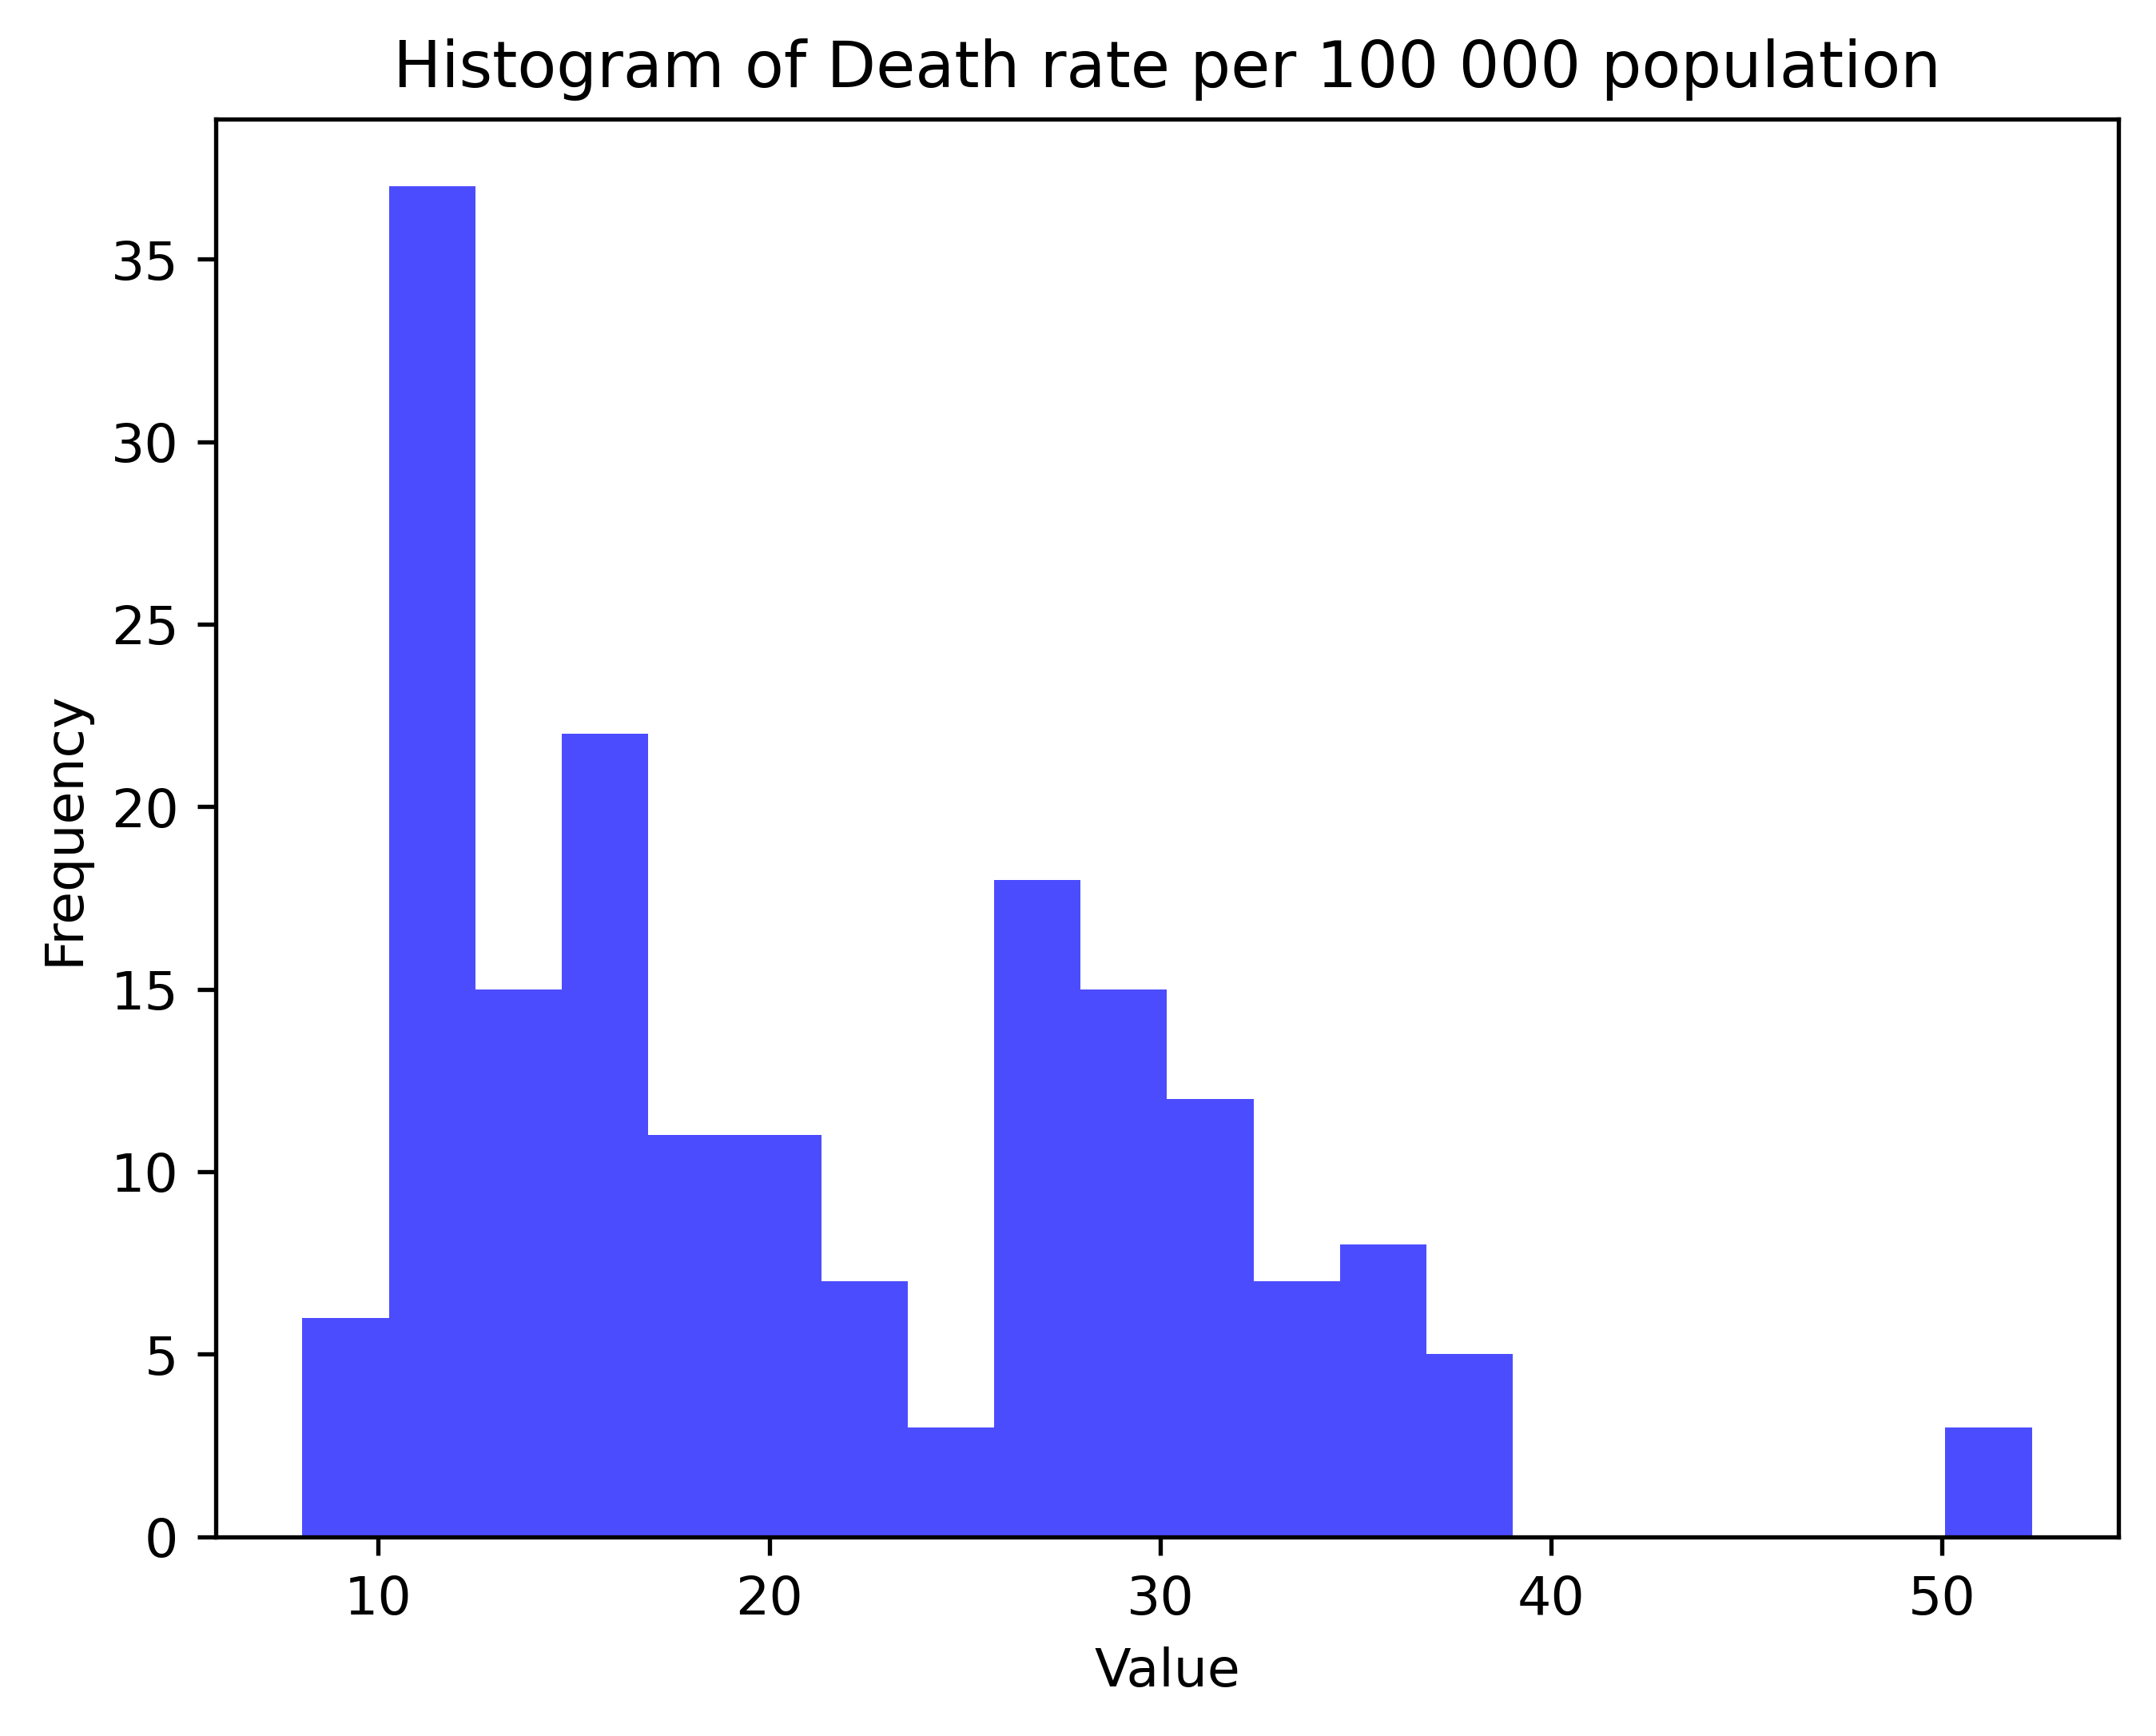

Mann-Whitney U-test for Men and Women on Death rate per 100 000 population:
Statistic: 1824.0
p-value: 0.9018354821522864
Conclusion: There is no significant difference between Men and Women.


In [45]:
test_distribution_and_compare_sexes(df4, 'Death rate per 100 000 population', 'Sex', alpha=0.05)


### End of Notebook